# Unsupervised Learning in Python

Run the hidden code cell below to import the data used in this course.

In [1]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats 

# Import the course datasets 
grains = pd.read_csv('datasets/grains.csv')
fish = pd.read_csv('datasets/fish.csv', header=None)
wine = pd.read_csv('datasets/wine.csv')
eurovision = pd.read_csv('datasets/eurovision-2016.csv')
stocks = pd.read_csv('datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
digits = pd.read_csv('datasets/lcd-digits.csv', header=None)

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- You work for an agricultural research center. Your manager wants you to group seed varieties based on different measurements contained in the `grains` DataFrame. They also want to know how your clustering solution compares to the seed types listed in the dataset (the `variety_number` and `variety` columns). Try to use all of the relevant techniques you learned in Unsupervised Learning in Python!
- In the `fish` DataFrame, each row represents an individual fish. Standardize the features and cluster the fish by their measurements. You can then compare your cluster labels with the actual fish species (first column).
- In the `wine` DataFrame, there are three `class_labels` in this dataset. Transform the features to get the most accurate clustering.
- In the `eurovision` DataFrame, perform hierarchical clustering of the voting countries using `complete` linkage and plot the resulting dendrogram.

## Part 1 - Clustering for Dataset Exploration

### How many clusters?

You are given an array `points` of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

matplotlib.pyplot has already been imported as plt. In the IPython Shell:

- Create an array called xs that contains the values of points[:,0] - that is, column 0 of points.
- Create an array called ys that contains the values of points[:,1] - that is, column 1 of points.
- Make a scatter plot by passing xs and ys to the plt.scatter() function.
- Call the plt.show() function to show your plot.

How many clusters do you see?

In [2]:
points = np.array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [-1.2107308 , -0.34924109],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [-1.8356219 , -0.04839732],
       [ 0.08415721, -0.71564326],
       [-1.48970175, -0.19299604],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [-2.0521341 , -0.02129125],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 1.10390926,  1.02481182],
       [-1.59227759, -0.17374038],
       [-1.47344152, -0.02202853],
       [-1.35514704,  0.22971067],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [ 1.04335676,  0.82345905],
       [-0.07961882, -0.85677394],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [-1.43590032, -0.56384446],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [-1.5137129 , -0.83914323],
       [ 0.9138436 ,  1.51126532],
       [-1.97233903, -0.41155375],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [-1.87663382,  0.14745773],
       [ 0.90612186,  0.91084011],
       [-1.37481454,  0.28428395],
       [-1.80564029, -0.96710574],
       [ 0.34307757, -0.79999275],
       [ 0.70380566,  1.00025804],
       [-1.68489862, -0.30564595],
       [ 1.31473221,  0.98614978],
       [ 0.26151216, -0.26069251],
       [ 0.9193121 ,  0.82371485],
       [-1.21795929, -0.20219674],
       [-0.17722723, -1.02665245],
       [ 0.64824862, -0.66822881],
       [ 0.41206786, -0.28783784],
       [ 1.01568202,  1.13481667],
       [ 0.67900254, -0.91489502],
       [-1.05182747, -0.01062376],
       [ 0.61306599,  1.78210384],
       [-1.50219748, -0.52308922],
       [-1.72717293, -0.46173916],
       [-1.60995631, -0.1821007 ],
       [-1.09111021, -0.0781398 ],
       [-0.01046978, -0.80913034],
       [ 0.32782303, -0.80734754],
       [ 1.22038503,  1.1959793 ],
       [-1.33328681, -0.30001937],
       [ 0.87959517,  1.11566491],
       [-1.14829098, -0.30400762],
       [-0.58019755, -1.19996018],
       [-0.01161159, -0.78468854],
       [ 0.17359724, -0.63398145],
       [ 1.32738556,  0.67759969],
       [-1.93467327,  0.30572472],
       [-1.57761893, -0.27726365],
       [ 0.47639   ,  1.21422648],
       [-1.65237509, -0.6803981 ],
       [-0.12609976, -1.04327457],
       [-1.89607082, -0.70085502],
       [ 0.57466899,  0.74878369],
       [-0.16660312, -0.83110295],
       [ 0.8013355 ,  1.22244435],
       [ 1.18455426,  1.4346467 ],
       [ 1.08864428,  0.64667112],
       [-1.61158505,  0.22805725],
       [-1.57512205, -0.09612576],
       [ 0.0721357 , -0.69640328],
       [-1.40054298,  0.16390598],
       [ 1.09607713,  1.16804691],
       [-2.54346204, -0.23089822],
       [-1.34544875,  0.25151126],
       [-1.35478629, -0.19103317],
       [ 0.18368113, -1.15827725],
       [-1.31368677, -0.376357  ],
       [ 0.09990129,  1.22500491],
       [ 1.17225574,  1.30835143],
       [ 0.0865397 , -0.79714371],
       [-0.21053923, -1.13421511],
       [ 0.26496024, -0.94760742],
       [-0.2557591 , -1.06266022],
       [-0.26039757, -0.74774225],
       [-1.91787359,  0.16434571],
       [ 0.93021139,  0.49436331],
       [ 0.44770467, -0.72877918],
       [-1.63802869, -0.58925528],
       [-1.95712763, -0.10125137],
       [ 0.9270337 ,  0.88251423],
       [ 1.25660093,  0.60828073],
       [-1.72818632,  0.08416887],
       [ 0.3499788 , -0.30490298],
       [-1.51696082, -0.50913109],
       [ 0.18763605, -0.55424924],
       [ 0.89609809,  0.83551508],
       [-1.54968857, -0.17114782],
       [ 1.2157457 ,  1.23317728],
       [ 0.20307745, -1.03784906],
       [ 0.84589086,  1.03615273],
       [ 0.53237919,  1.47362884],
       [-0.05319044, -1.36150553],
       [ 1.38819743,  1.11729915],
       [ 1.00696304,  1.0367721 ],
       [ 0.56681869, -1.09637176],
       [ 0.86888296,  1.05248874],
       [-1.16286609, -0.55875245],
       [ 0.27717768, -0.83844015],
       [ 0.16563267, -0.80306607],
       [ 0.38263303, -0.42683241],
       [ 1.14519807,  0.89659026],
       [ 0.81455857,  0.67533667],
       [-1.8603152 , -0.09537561],
       [ 0.965641  ,  0.90295579],
       [-1.49897451, -0.33254044],
       [-0.1335489 , -0.80727582],
       [ 0.12541527, -1.13354906],
       [ 1.06062436,  1.28816358],
       [-1.49154578, -0.2024641 ],
       [ 1.16189032,  1.28819877],
       [ 0.54282033,  0.75203524],
       [ 0.89221065,  0.99211624],
       [-1.49932011, -0.32430667],
       [ 0.3166647 , -1.34482915],
       [ 0.13972469, -1.22097448],
       [-1.5499724 , -0.10782584],
       [ 1.23846858,  1.37668804],
       [ 1.25558954,  0.72026098],
       [ 0.25558689, -1.28529763],
       [ 0.45168933, -0.55952093],
       [ 1.06202057,  1.03404604],
       [ 0.67451908, -0.54970299],
       [ 0.22759676, -1.02729468],
       [-1.45835281, -0.04951074],
       [ 0.23273501, -0.70849262],
       [ 1.59679589,  1.11395076],
       [ 0.80476105,  0.544627  ],
       [ 1.15492521,  1.04352191],
       [ 0.59632776, -1.19142897],
       [ 0.02839068, -0.43829366],
       [ 1.13451584,  0.5632633 ],
       [ 0.21576204, -1.04445753],
       [ 1.41048987,  1.02830719],
       [ 1.12289302,  0.58029441],
       [ 0.25200688, -0.82588436],
       [-1.28566081, -0.07390909],
       [ 1.52849815,  1.11822469],
       [-0.23907858, -0.70541972],
       [-0.25792784, -0.81825035],
       [ 0.59367818, -0.45239915],
       [ 0.07931909, -0.29233213],
       [-1.27256815,  0.11630577],
       [ 0.66930129,  1.00731481],
       [ 0.34791546, -1.20822877],
       [-2.11283993, -0.66897935],
       [-1.6293824 , -0.32718222],
       [-1.53819139, -0.01501972],
       [-0.11988545, -0.6036339 ],
       [-1.54418956, -0.30389844],
       [ 0.30026614, -0.77723173],
       [ 0.00935449, -0.53888192],
       [-1.33424393, -0.11560431],
       [ 0.47504489,  0.78421384],
       [ 0.59313264,  1.232239  ],
       [ 0.41370369, -1.35205857],
       [ 0.55840948,  0.78831053],
       [ 0.49855018, -0.789949  ],
       [ 0.35675809, -0.81038693],
       [-1.86197825, -0.59071305],
       [-1.61977671, -0.16076687],
       [ 0.80779295, -0.73311294],
       [ 1.62745775,  0.62787163],
       [-1.56993593, -0.08467567],
       [ 1.02558561,  0.89383302],
       [ 0.24293461, -0.6088253 ],
       [ 1.23130242,  1.00262186],
       [-1.9651013 , -0.15886289],
       [ 0.42795032, -0.70384432],
       [-1.58306818, -0.19431923],
       [-1.57195922,  0.01413469],
       [-0.98145373,  0.06132285],
       [-1.48637844, -0.5746531 ],
       [ 0.98745828,  0.69188053],
       [ 1.28619721,  1.28128821],
       [ 0.85850596,  0.95541481],
       [ 0.19028286, -0.82112942],
       [ 0.26561046, -0.04255239],
       [-1.61897897,  0.00862372],
       [ 0.24070183, -0.52664209],
       [ 1.15220993,  0.43916694],
       [-1.21967812, -0.2580313 ],
       [ 0.33412533, -0.86117761],
       [ 0.17131003, -0.75638965],
       [-1.19828397, -0.73744665],
       [-0.12245932, -0.45648879],
       [ 1.51200698,  0.88825741],
       [ 1.10338866,  0.92347479],
       [ 1.30972095,  0.59066989],
       [ 0.19964876,  1.14855889],
       [ 0.81460515,  0.84538972],
       [-1.6422739 , -0.42296206],
       [ 0.01224351, -0.21247816],
       [ 0.33709102, -0.74618065],
       [ 0.47301054,  0.72712075],
       [ 0.34706626,  1.23033757],
       [-0.00393279, -0.97209694],
       [-1.64303119,  0.05276337],
       [ 1.44649625,  1.14217033],
       [-1.93030087, -0.40026146],
       [-2.37296135, -0.72633645],
       [ 0.45860122, -1.06048953],
       [ 0.4896361 , -1.18928313],
       [-1.02335902, -0.17520578],
       [-1.32761107, -0.93963549],
       [-1.50987909, -0.09473658],
       [ 0.02723057, -0.79870549],
       [ 1.0169412 ,  1.26461701],
       [ 0.47733527, -0.9898471 ],
       [-1.27784224, -0.547416  ],
       [ 0.49898802, -0.6237259 ],
       [ 1.06004731,  0.86870008],
       [ 1.00207501,  1.38293512],
       [ 1.31161394,  0.62833956],
       [ 1.13428443,  1.18346542],
       [ 1.27671346,  0.96632878],
       [-0.63342885, -0.97768251],
       [ 0.12698779, -0.93142317],
       [-1.34510812, -0.23754226],
       [-0.53162278, -1.25153594],
       [ 0.21959934, -0.90269938],
       [-1.78997479, -0.12115748],
       [ 1.23197473, -0.07453764],
       [ 1.4163536 ,  1.21551752],
       [-1.90280976, -0.1638976 ],
       [-0.22440081, -0.75454248],
       [ 0.59559412,  0.92414553],
       [ 1.21930773,  1.08175284],
       [-1.99427535, -0.37587799],
       [-1.27818474, -0.52454551],
       [ 0.62352689, -1.01430108],
       [ 0.14024251, -0.428266  ],
       [-0.16145713, -1.16359731],
       [-1.74795865, -0.06033101],
       [-1.16659791,  0.0902393 ],
       [ 0.41110408, -0.8084249 ],
       [ 1.14757168,  0.77804528],
       [-1.65590748, -0.40105446],
       [-1.15306865,  0.00858699],
       [ 0.60892121,  0.68974833],
       [-0.08434138, -0.97615256],
       [ 0.19170053, -0.42331438],
       [ 0.29663162, -1.13357399],
       [-1.36893628, -0.25052124],
       [-0.08037807, -0.56784155],
       [ 0.35695011, -1.15064408],
       [ 0.02482179, -0.63594828],
       [-1.49075558, -0.2482507 ],
       [-1.408588  ,  0.25635431],
       [-1.98274626, -0.54584475]])

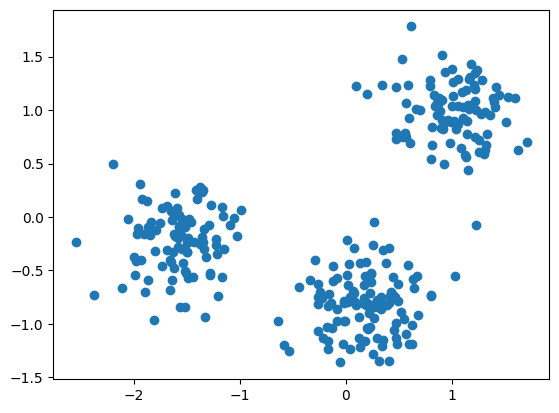

In [3]:
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs, ys)
plt.show()

### Clustering 2D points

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

You are given the array `points` from the previous exercise, and also an array `new_points`.

In [4]:
new_points = np.array([[ 4.00233332e-01, -1.26544471e+00],
       [ 8.03230370e-01,  1.28260167e+00],
       [-1.39507552e+00,  5.57292921e-02],
       [-3.41192677e-01, -1.07661994e+00],
       [ 1.54781747e+00,  1.40250049e+00],
       [ 2.45032018e-01, -4.83442328e-01],
       [ 1.20706886e+00,  8.88752605e-01],
       [ 1.25132628e+00,  1.15555395e+00],
       [ 1.81004415e+00,  9.65530731e-01],
       [-1.66963401e+00, -3.08103509e-01],
       [-7.17482105e-02, -9.37939700e-01],
       [ 6.82631927e-01,  1.10258160e+00],
       [ 1.09039598e+00,  1.43899529e+00],
       [-1.67645414e+00, -5.04557049e-01],
       [-1.84447804e+00,  4.52539544e-02],
       [ 1.24234851e+00,  1.02088661e+00],
       [-1.86147041e+00,  6.38645811e-03],
       [-1.46044943e+00,  1.53252383e-01],
       [ 4.98981817e-01,  8.98006058e-01],
       [ 9.83962244e-01,  1.04369375e+00],
       [-1.83136742e+00, -1.63632835e-01],
       [ 1.30622617e+00,  1.07658717e+00],
       [ 3.53420328e-01, -7.51320218e-01],
       [ 1.13957970e+00,  1.54503860e+00],
       [ 2.93995694e-01, -1.26135005e+00],
       [-1.14558225e+00, -3.78709636e-02],
       [ 1.18716105e+00,  6.00240663e-01],
       [-2.23211946e+00,  2.30475094e-01],
       [-1.28320430e+00, -3.93314568e-01],
       [ 4.94296696e-01, -8.83972009e-01],
       [ 6.31834930e-02, -9.11952228e-01],
       [ 9.35759539e-01,  8.66820685e-01],
       [ 1.58014721e+00,  1.03788392e+00],
       [ 1.06304960e+00,  1.02706082e+00],
       [-1.39732536e+00, -5.05162249e-01],
       [-1.09935240e-01, -9.08113619e-01],
       [ 1.17346758e+00,  9.47501092e-01],
       [ 9.20084511e-01,  1.45767672e+00],
       [ 5.82658956e-01, -9.00086832e-01],
       [ 9.52772328e-01,  8.99042386e-01],
       [-1.37266956e+00, -3.17878215e-02],
       [ 2.12706760e-02, -7.07614194e-01],
       [ 3.27049052e-01, -5.55998107e-01],
       [-1.71590267e+00,  2.15222266e-01],
       [ 5.12516209e-01, -7.60128245e-01],
       [ 1.13023469e+00,  7.22451122e-01],
       [-1.43074310e+00, -3.42787511e-01],
       [-1.82724625e+00,  1.17657775e-01],
       [ 1.41801350e+00,  1.11455080e+00],
       [ 1.26897304e+00,  1.41925971e+00],
       [ 8.04076494e-01,  1.63988557e+00],
       [ 8.34567752e-01,  1.09956689e+00],
       [-1.24714732e+00, -2.23522320e-01],
       [-1.29422537e+00,  8.18770024e-02],
       [-2.27378316e-01, -4.13331387e-01],
       [ 2.18830387e-01, -4.68183120e-01],
       [-1.22593414e+00,  2.55599147e-01],
       [-1.31294033e+00, -4.28892070e-01],
       [-1.33532382e+00,  6.52053776e-01],
       [-3.01100233e-01, -1.25156451e+00],
       [ 2.02778356e-01, -9.05277445e-01],
       [ 1.01357784e+00,  1.12378981e+00],
       [ 8.18324394e-01,  8.60841257e-01],
       [ 1.26181556e+00,  1.46613744e+00],
       [ 4.64867724e-01, -7.97212459e-01],
       [ 3.60908898e-01,  8.44106720e-01],
       [-2.15098310e+00, -3.69583937e-01],
       [ 1.05005281e+00,  8.74181364e-01],
       [ 1.06580074e-01, -7.49268153e-01],
       [-1.73945723e+00,  2.52183577e-01],
       [-1.12017687e-01, -6.52469788e-01],
       [ 5.16618951e-01, -6.41267582e-01],
       [ 3.26621787e-01, -8.80608015e-01],
       [ 1.09017759e+00,  1.10952558e+00],
       [ 3.64459576e-01, -6.94215622e-01],
       [-1.90779318e+00,  1.87383674e-01],
       [-1.95601829e+00,  1.39959126e-01],
       [ 3.18541701e-01, -4.05271704e-01],
       [ 7.36512699e-01,  1.76416255e+00],
       [-1.44175162e+00, -5.72320429e-02],
       [ 3.21757168e-01, -5.34283821e-01],
       [-1.37317305e+00,  4.64484644e-02],
       [ 6.87225910e-02, -1.10522944e+00],
       [ 9.59314218e-01,  6.52316210e-01],
       [-1.62641919e+00, -5.62423280e-01],
       [ 1.06788305e+00,  7.29260482e-01],
       [-1.79643547e+00, -9.88307418e-01],
       [-9.88628377e-02, -6.81198092e-02],
       [-1.05135700e-01,  1.17022143e+00],
       [ 8.79964699e-01,  1.25340317e+00],
       [ 9.80753407e-01,  1.15486539e+00],
       [-8.33224966e-02, -9.24844368e-01],
       [ 8.48759673e-01,  1.09397425e+00],
       [ 1.32941649e+00,  1.13734563e+00],
       [ 3.23788068e-01, -7.49732451e-01],
       [-1.52610970e+00, -2.49016929e-01],
       [-1.48598116e+00, -2.68828608e-01],
       [-1.80479553e+00,  1.87052700e-01],
       [-2.01907347e+00, -4.49511651e-01],
       [ 2.87202402e-01, -6.55487415e-01],
       [ 8.22295102e-01,  1.38443234e+00],
       [-3.56997036e-02, -8.01825807e-01],
       [-1.66955440e+00, -1.38258505e-01],
       [-1.78226821e+00,  2.93353033e-01],
       [ 7.25837138e-01, -6.23374024e-01],
       [ 3.88432593e-01, -7.61283497e-01],
       [ 1.49002783e+00,  7.95678671e-01],
       [ 6.55423228e-04, -7.40580702e-01],
       [-1.34533116e+00, -4.75629937e-01],
       [-8.03845106e-01, -3.09943013e-01],
       [-2.49041295e-01, -1.00662418e+00],
       [-1.41095118e+00, -7.06744127e-02],
       [-1.75119594e+00, -3.00491336e-01],
       [-1.27942724e+00,  1.73774600e-01],
       [ 3.35028183e-01,  6.24761151e-01],
       [ 1.16819649e+00,  1.18902251e+00],
       [ 7.15210457e-01,  9.26077419e-01],
       [ 1.30057278e+00,  9.16349565e-01],
       [-1.21697008e+00,  1.10039477e-01],
       [-1.70707935e+00, -5.99659536e-02],
       [ 1.20730655e+00,  1.05480463e+00],
       [ 1.86896009e-01, -9.58047234e-01],
       [ 8.03463471e-01,  3.86133140e-01],
       [-1.73486790e+00, -1.49831913e-01],
       [ 1.31261499e+00,  1.11802982e+00],
       [ 4.04993148e-01, -5.10900347e-01],
       [-1.93267968e+00,  2.20764694e-01],
       [ 6.56004799e-01,  9.61887161e-01],
       [-1.40588215e+00,  1.17134403e-01],
       [-1.74306264e+00, -7.47473959e-02],
       [ 5.43745412e-01,  1.47209224e+00],
       [-1.97331669e+00, -2.27124493e-01],
       [ 1.53901171e+00,  1.36049081e+00],
       [-1.48323452e+00, -4.90302063e-01],
       [ 3.86748484e-01, -1.26173400e+00],
       [ 1.17015716e+00,  1.18549415e+00],
       [-8.05381721e-02, -3.21923627e-01],
       [-6.82273156e-02, -8.52825887e-01],
       [ 7.13500028e-01,  1.27868520e+00],
       [-1.85014378e+00, -5.03490558e-01],
       [ 6.36085266e-02, -1.41257040e+00],
       [ 1.52966062e+00,  9.66056572e-01],
       [ 1.62165714e-01, -1.37374843e+00],
       [-3.23474497e-01, -7.06620269e-01],
       [-1.51768993e+00,  1.87658302e-01],
       [ 8.88895911e-01,  7.62237161e-01],
       [ 4.83164032e-01,  8.81931869e-01],
       [-5.52997766e-02, -7.11305016e-01],
       [-1.57966441e+00, -6.29220313e-01],
       [ 5.51308645e-02, -8.47206763e-01],
       [-2.06001582e+00,  5.87697787e-02],
       [ 1.11810855e+00,  1.30254175e+00],
       [ 4.87016164e-01, -9.90143937e-01],
       [-1.65518042e+00, -1.69386383e-01],
       [-1.44349738e+00,  1.90299243e-01],
       [-1.70074547e-01, -8.26736022e-01],
       [-1.82433979e+00, -3.07814626e-01],
       [ 1.03093485e+00,  1.26457691e+00],
       [ 1.64431169e+00,  1.27773115e+00],
       [-1.47617693e+00,  2.60783872e-02],
       [ 1.00953067e+00,  1.14270181e+00],
       [-1.45285636e+00, -2.55216207e-01],
       [-1.74092917e+00, -8.34443177e-02],
       [ 1.22038299e+00,  1.28699961e+00],
       [ 9.16925397e-01,  7.32070275e-01],
       [-1.60754185e-03, -7.26375571e-01],
       [ 8.93841238e-01,  8.41146643e-01],
       [ 6.33791961e-01,  1.00915134e+00],
       [-1.47927075e+00, -6.99781936e-01],
       [ 5.44799374e-02, -1.06441970e+00],
       [-1.51935568e+00, -4.89276929e-01],
       [ 2.89939026e-01, -7.73145523e-01],
       [-9.68154061e-03, -1.13302207e+00],
       [ 1.13474639e+00,  9.71541744e-01],
       [ 5.36421406e-01, -8.47906388e-01],
       [ 1.14759864e+00,  6.89915205e-01],
       [ 5.73291902e-01,  7.90802710e-01],
       [ 2.12377397e-01, -6.07569808e-01],
       [ 5.26579548e-01, -8.15930264e-01],
       [-2.01831641e+00,  6.78650740e-02],
       [-2.35512624e-01, -1.08205132e+00],
       [ 1.59274780e-01, -6.00717261e-01],
       [ 2.28120356e-01, -1.16003549e+00],
       [-1.53658378e+00,  8.40798808e-02],
       [ 1.13954609e+00,  6.31782001e-01],
       [ 1.01119255e+00,  1.04360805e+00],
       [-1.42039867e-01, -4.81230337e-01],
       [-2.23120182e+00,  8.49162905e-02],
       [ 1.25554811e-01, -1.01794793e+00],
       [-1.72493509e+00, -6.94426177e-01],
       [-1.60434630e+00,  4.45550868e-01],
       [ 7.37153979e-01,  9.26560744e-01],
       [ 6.72905271e-01,  1.13366030e+00],
       [ 1.20066456e+00,  7.26273093e-01],
       [ 7.58747209e-02, -9.83378326e-01],
       [ 1.28783262e+00,  1.18088601e+00],
       [ 1.06521930e+00,  1.00714746e+00],
       [ 1.05871698e+00,  1.12956519e+00],
       [-1.12643410e+00,  1.66787744e-01],
       [-1.10157218e+00, -3.64137806e-01],
       [ 2.35118217e-01, -1.39769949e-01],
       [ 1.13853795e+00,  1.01018519e+00],
       [ 5.31205654e-01, -8.81990792e-01],
       [ 4.33085936e-01, -7.64059042e-01],
       [-4.48926156e-03, -1.30548411e+00],
       [-1.76348589e+00, -4.97430739e-01],
       [ 1.36485681e+00,  5.83404699e-01],
       [ 5.66923900e-01,  1.51391963e+00],
       [ 1.35736826e+00,  6.70915318e-01],
       [ 1.07173397e+00,  6.11990884e-01],
       [ 1.00106915e+00,  8.93815326e-01],
       [ 1.33091007e+00,  8.79773879e-01],
       [-1.79603740e+00, -3.53883973e-02],
       [-1.27222979e+00,  4.00156642e-01],
       [ 8.47480603e-01,  1.17032364e+00],
       [-1.50989129e+00, -7.12318330e-01],
       [-1.24953576e+00, -5.57859730e-01],
       [-1.27717973e+00, -5.99350550e-01],
       [-1.81946743e+00,  7.37057673e-01],
       [ 1.19949867e+00,  1.56969386e+00],
       [-1.25543847e+00, -2.33892826e-01],
       [-1.63052058e+00,  1.61455865e-01],
       [ 1.10611305e+00,  7.39698224e-01],
       [ 6.70193192e-01,  8.70567001e-01],
       [ 3.69670156e-01, -6.94645306e-01],
       [-1.26362293e+00, -6.99249285e-01],
       [-3.66687507e-01, -1.35310260e+00],
       [ 2.44032147e-01, -6.59470793e-01],
       [-1.27679142e+00, -4.85453412e-01],
       [ 3.77473612e-02, -6.99251605e-01],
       [-2.19148539e+00, -4.91199500e-01],
       [-2.93277777e-01, -5.89488212e-01],
       [-1.65737397e+00, -2.98337786e-01],
       [ 7.36638861e-01,  5.78037057e-01],
       [ 1.13709081e+00,  1.30119754e+00],
       [-1.44146601e+00,  3.13934680e-02],
       [ 5.92360708e-01,  1.22545114e+00],
       [ 6.51719414e-01,  4.92674894e-01],
       [ 5.94559139e-01,  8.25637315e-01],
       [-1.87900722e+00, -5.21899626e-01],
       [ 2.15225041e-01, -1.28269851e+00],
       [ 4.99145965e-01, -6.70268634e-01],
       [-1.82954176e+00, -3.39269731e-01],
       [ 7.92721403e-01,  1.33785606e+00],
       [ 9.54363372e-01,  9.80396626e-01],
       [-1.35359846e+00,  1.03976340e-01],
       [ 1.05595062e+00,  8.07031927e-01],
       [-1.94311010e+00, -1.18976964e-01],
       [-1.39604137e+00, -3.10095976e-01],
       [ 1.28977624e+00,  1.01753365e+00],
       [-1.59503139e+00, -5.40574609e-01],
       [-1.41994046e+00, -3.81032569e-01],
       [-2.35569801e-02, -1.10133702e+00],
       [-1.26038568e+00, -6.93273886e-01],
       [ 9.60215981e-01, -8.11553694e-01],
       [ 5.51803308e-01, -1.01793176e+00],
       [ 3.70185085e-01, -1.06885468e+00],
       [ 8.25529207e-01,  8.77007060e-01],
       [-1.87032595e+00,  2.87507199e-01],
       [-1.56260769e+00, -1.89196712e-01],
       [-1.26346548e+00, -7.74725237e-01],
       [-6.33800421e-02, -7.59400611e-01],
       [ 8.85298280e-01,  8.85620519e-01],
       [-1.43324686e-01, -1.16083678e+00],
       [-1.83908725e+00, -3.26655515e-01],
       [ 2.74709229e-01, -1.04546829e+00],
       [-1.45703573e+00, -2.91842036e-01],
       [-1.59048842e+00,  1.66063031e-01],
       [ 9.25549284e-01,  7.41406406e-01],
       [ 1.97245469e-01, -7.80703225e-01],
       [ 2.88401697e-01, -8.32425551e-01],
       [ 7.24141618e-01, -7.99149200e-01],
       [-1.62658639e+00, -1.80005543e-01],
       [ 5.84481588e-01,  1.13195640e+00],
       [ 1.02146732e+00,  4.59657799e-01],
       [ 8.65050554e-01,  9.57714887e-01],
       [ 3.98717766e-01, -1.24273147e+00],
       [ 8.62234892e-01,  1.10955561e+00],
       [-1.35999430e+00,  2.49942654e-02],
       [-1.19178505e+00, -3.82946323e-02],
       [ 1.29392424e+00,  1.10320509e+00],
       [ 1.25679630e+00, -7.79857582e-01],
       [ 9.38040302e-02, -5.53247258e-01],
       [-1.73512175e+00, -9.76271667e-02],
       [ 2.23153587e-01, -9.43474351e-01],
       [ 4.01989100e-01, -1.10963051e+00],
       [-1.42244158e+00,  1.81914703e-01],
       [ 3.92476267e-01, -8.78426277e-01],
       [ 1.25181875e+00,  6.93614996e-01],
       [ 1.77481317e-02, -7.20304235e-01],
       [-1.87752521e+00, -2.63870424e-01],
       [-1.58063602e+00, -5.50456344e-01],
       [-1.59589493e+00, -1.53932892e-01],
       [-1.01829770e+00,  3.88542370e-02],
       [ 1.24819659e+00,  6.60041803e-01],
       [-1.25551377e+00, -2.96172009e-02],
       [-1.41864559e+00, -3.58230179e-01],
       [ 5.25758326e-01,  8.70500543e-01],
       [ 5.55599988e-01,  1.18765072e+00],
       [ 2.81344439e-02, -6.99111314e-01]])

In [5]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[0 1 2 0 1 0 1 1 1 2 0 1 1 2 2 1 2 2 1 1 2 1 0 1 0 2 1 2 2 0 0 1 1 1 2 0 1
 1 0 1 2 0 0 2 0 1 2 2 1 1 1 1 2 2 0 0 2 2 2 0 0 1 1 1 0 1 2 1 0 2 0 0 0 1
 0 2 2 0 1 2 0 2 0 1 2 1 2 0 1 1 1 0 1 1 0 2 2 2 2 0 1 0 2 2 0 0 1 0 2 2 0
 2 2 2 1 1 1 1 2 2 1 0 1 2 1 0 2 1 2 2 1 2 1 2 0 1 0 0 1 2 0 1 0 0 2 1 1 0
 2 0 2 1 0 2 2 0 2 1 1 2 1 2 2 1 1 0 1 1 2 0 2 0 0 1 0 1 1 0 0 2 0 0 0 2 1
 1 0 2 0 2 2 1 1 1 0 1 1 1 2 2 0 1 0 0 0 2 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2
 1 1 0 2 0 0 2 0 2 0 2 1 1 2 1 1 1 2 0 0 2 1 1 2 1 2 2 1 2 2 0 2 0 0 0 1 2
 2 2 0 1 0 2 0 2 2 1 0 0 0 2 1 1 1 0 1 2 2 1 0 0 2 0 0 2 0 1 0 2 2 2 2 1 2
 2 1 1 0]


### Inspect your clustering

Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so `new_points` is an array of points and `labels` is the array of their cluster labels.

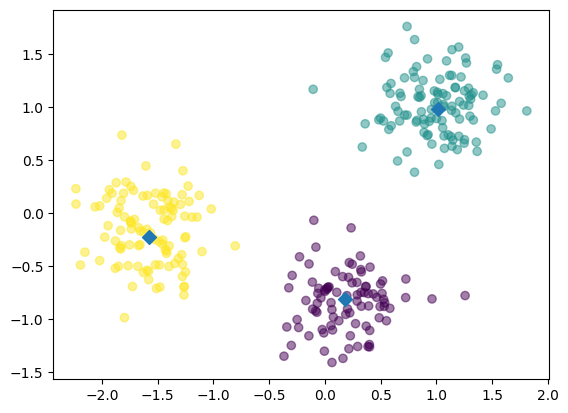

In [6]:
# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

### How many clusters of grain?

In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array `samples` containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/236/seeds).

In [7]:
samples = np.array(grains.iloc[:,:7])

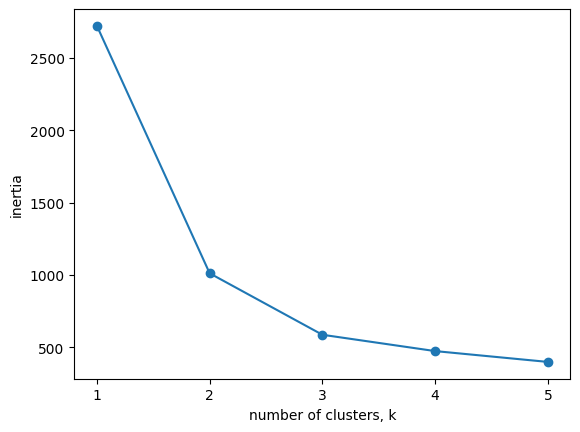

In [8]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array `samples` of grain samples, and a list `varieties` giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [9]:
varieties = grains.iloc[:,8].to_list()

In [10]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0           1          60
1                       0          57          10
2                      70          12           0


### Scaling fish data for clustering

You are given an array `samples` giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education](http://jse.amstat.org/jse_data_archive.htm).

In [11]:
samples = np.array(fish.iloc[:,-6:])

In [12]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

### Clustering the fish data

You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, `samples` is the 2D array of fish measurements. Your pipeline is available as `pipeline`, and the species of every fish sample is given by the list `species`.

In [13]:
species = fish[0].to_list()

In [14]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0     17     14
1           34     0      3      0
2            0    12      0      0
3            0     5      0      0


### Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array `movements` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.

In [15]:
movements = np.array(stocks)

In [16]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

### Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline `pipeline` containing a KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list `companies` of the company names is available.

In [17]:
companies = stocks.index.to_list()

In [18]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
52       0                            Unilever
46       0                      Sanofi-Aventis
6        0            British American Tobacco
37       0                            Novartis
25       0                   Johnson & Johnson
19       0                     GlaxoSmithKline
48       1                              Toyota
45       1                                Sony
7        1                               Canon
34       1                          Mitsubishi
21       1                               Honda
29       2                     Lookheed Martin
50       2  Taiwan Semiconductor Manufacturing
36       2                    Northrop Grumman
30       2                          MasterCard
20       2                          Home Depot
59       2                               Yahoo
2        2                              Amazon
3        2                    American express
4        2                              Boeing
8        3   

## Part 2 - Clustering for Dataset Exploration

### Hierarchical clustering of the grain data

In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.

In [19]:
samples = np.array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]])

In [20]:
varieties = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']

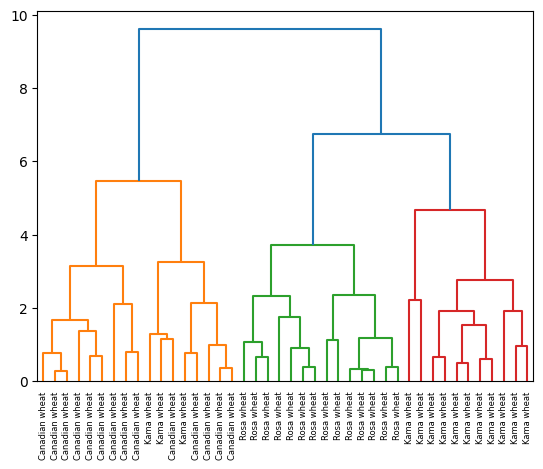

In [21]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(
    mergings,
    labels=varieties,
    leaf_rotation=90,
    leaf_font_size=6,
)
plt.show()

### Hierarchies of stocks

In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements `movements`, where the rows correspond to companies, and a list of the company names `companies`. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

`linkage` and `dendrogram` have already been imported from scipy.cluster.hierarchy, and PyPlot has been imported as plt.

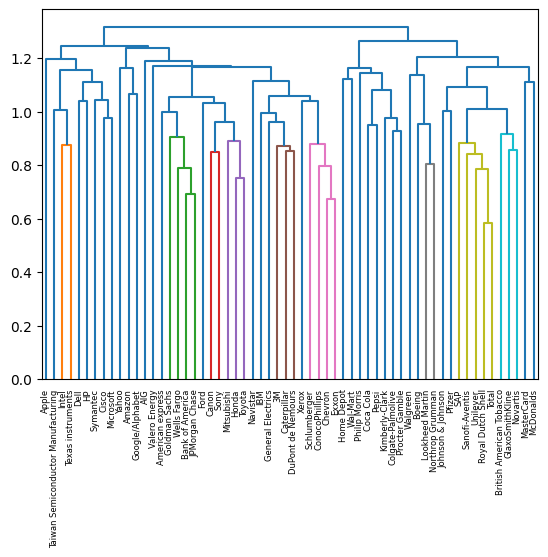

In [22]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=6,
)
plt.show()

### Different linkage, different hierarchical clustering!

In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array `samples`. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list `country_names` gives the name of each voting country. This dataset was obtained from [Eurovision](https://www.eurovision.tv/page/results).

In [23]:
samples = np.random.randint(low=0, high=13, size=(42, 26))
country_names = eurovision['From country'].unique().tolist()

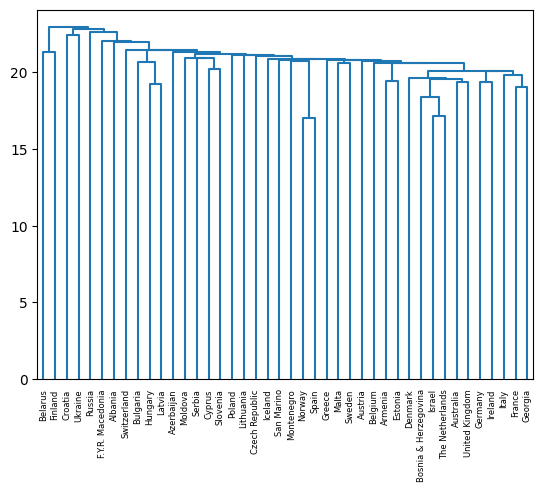

In [24]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=country_names,
    leaf_rotation=90,
    leaf_font_size=6,
)
plt.show()

### Extracting the cluster labels

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and `mergings` is the result of the linkage() function. The list `varieties` gives the variety of each grain sample.

In [25]:
# Perform the necessary imports
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           1           0
2                       0           0           1
3                       0           1           0
4                       1           0           0
5                       0           0           1
6                       0           0           1
7                       0           1           0
8                       0           1           0
9                       1           0           0
10                      1           0           0
11                      1           0           0
12                      1           0           0
13                      1           0           0
14                      1           0           0
15                      1           0           0
16                      0           0           1
17                      1           0           0
18                      0           1           0


### t-SNE visualization of grain dataset

In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array `samples` of grain samples and a list `variety_numbers` giving the variety number of each grain sample.

In [26]:
samples = np.array(grains.iloc[:,:7])
variety_numbers = grains['variety_number'].to_list()

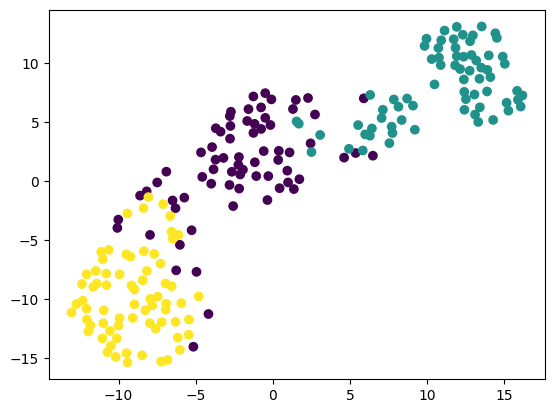

In [27]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

### A t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array `normalized_movements` (these have already been normalized for you). The list `companies` gives the name of each company. PyPlot (plt) has been imported for you.

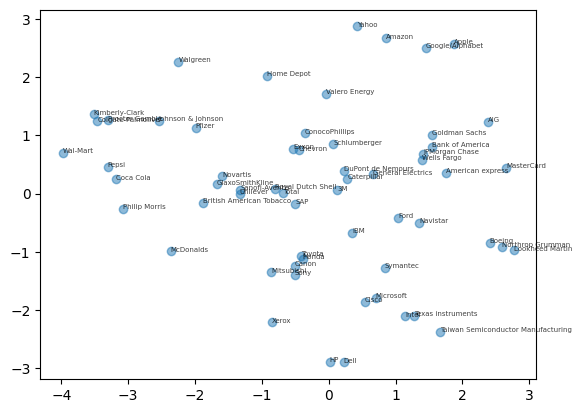

In [28]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

## Part 3 - Decorrelating Your Data and Dimension Reduction

### Correlated data in nature

You are given an array `grains` giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

In [29]:
grains = np.array(grains[['4', '3']])

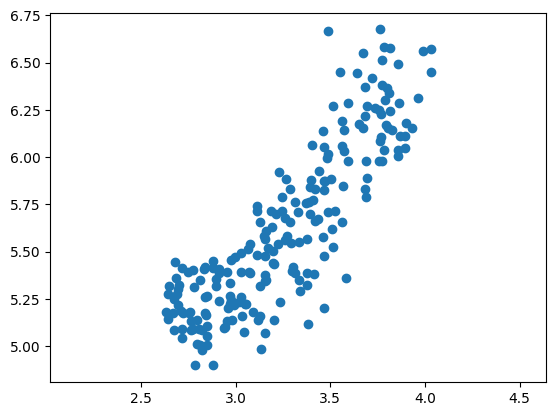

0.860414937714346


In [30]:
# Perform the necessary imports
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

### Decorrelating the grain measurements with PCA

You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

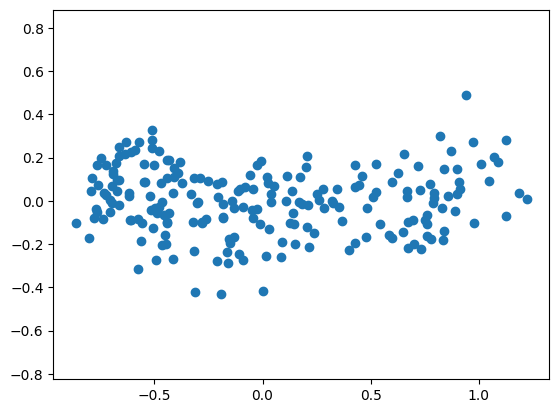

9.34949322152465e-17


In [31]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

### The first principal component

The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array `grains` gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

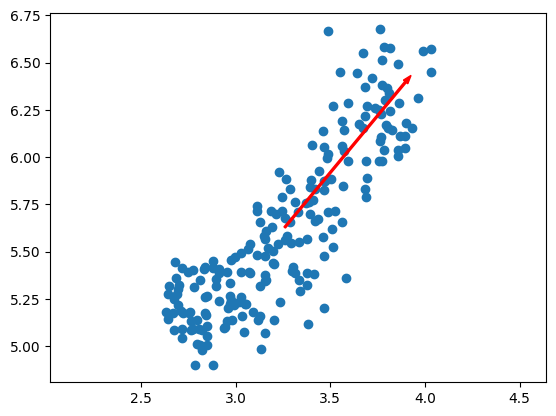

In [32]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

### Variance of the PCA features

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, `samples` is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [33]:
samples = np.array(fish.iloc[:,-6:])

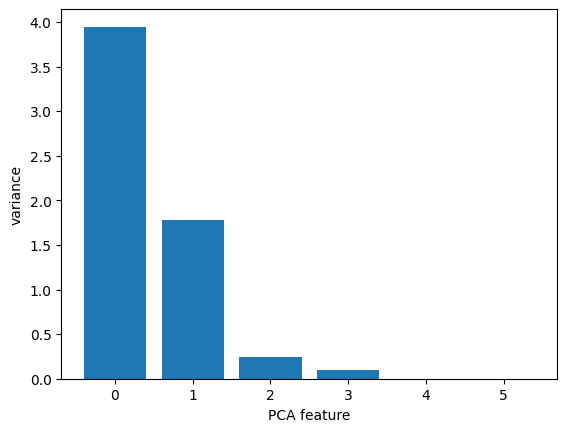

In [34]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Dimension reduction of the fish measurements

In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as `scaled_samples`.

In [35]:
scaled_samples = np.array([[-0.50109735, -0.36878558, -0.34323399, -0.23781518,  1.0032125 ,
         0.25373964],
       [-0.37434344, -0.29750241, -0.26893461, -0.14634781,  1.15869615,
         0.44376493],
       [-0.24230812, -0.30641281, -0.25242364, -0.15397009,  1.13926069,
         1.0613471 ],
       [-0.18157187, -0.09256329, -0.04603648,  0.02896467,  0.96434159,
         0.20623332],
       [-0.00464454, -0.0747425 , -0.04603648,  0.06707608,  0.8282934 ,
         1.0613471 ],
       [ 0.04816959, -0.04801131,  0.01175193,  0.12043205,  1.08095432,
         0.63379021],
       [ 0.18020491, -0.04801131,  0.01175193,  0.10518748,  1.26559115,
         1.15635974],
       [-0.11027279,  0.02327186,  0.03651839,  0.14329889,  0.78942248,
         0.25373964],
       [ 0.04816959,  0.02327186,  0.03651839,  0.15092117,  1.14897842,
         0.44376493],
       [ 0.18020491,  0.10346543,  0.09430679,  0.23476627,  1.09067205,
         0.39625861],
       [ 0.11418725,  0.09455503,  0.11907325,  0.23476627,  1.10038978,
         0.58628389],
       [ 0.18020491,  0.12128622,  0.11907325,  0.23476627,  1.12954296,
         0.20623332],
       [ 0.18020491,  0.1569278 ,  0.16035069,  0.25001083,  0.94490613,
        -0.41134885],
       [ 0.44427556,  0.18365899,  0.20162812,  0.31098909,  1.1781316 ,
         0.49127125],
       [ 0.44427556,  0.18365899,  0.20162812,  0.31098909,  1.30446206,
         1.01384078],
       [ 0.7083462 ,  0.27276296,  0.28418298,  0.39483418,  1.04208341,
         0.44376493],
       [ 0.7083462 ,  0.27276296,  0.28418298,  0.41007875,  1.04208341,
         0.30124596],
       [ 0.47068262,  0.31731494,  0.32546042,  0.41770103,  1.20728478,
         0.20623332],
       [ 0.57631088,  0.32622533,  0.32546042,  0.42532331,  0.90603522,
         0.91882813],
       [ 0.3782579 ,  0.35295652,  0.36673785,  0.48630156,  0.99349477,
         0.58628389],
       [ 0.66873561,  0.36186692,  0.36673785,  0.46343472,  1.23643797,
         0.39625861],
       [ 0.49708969,  0.37077732,  0.40801528,  0.50154612,  1.07123659,
         0.20623332],
       [ 0.65553208,  0.3975085 ,  0.44929271,  0.57014666,  0.97405931,
         1.0613471 ],
       [ 0.7083462 ,  0.4064189 ,  0.44929271,  0.56252438,  1.16841387,
         0.44376493],
       [ 0.77436387,  0.3975085 ,  0.44929271,  0.5930135 ,  1.15869615,
         0.91882813],
       [ 0.76116033,  0.4153293 ,  0.44929271,  0.57014666,  1.18784933,
         1.01384078],
       [ 0.74531609,  0.47770207,  0.53184758,  0.63874719,  1.13926069,
         0.58628389],
       [ 1.10445217,  0.48661247,  0.53184758,  0.64636947,  1.21700251,
         0.96633446],
       [ 1.50055814,  0.54898524,  0.61440245,  0.72259229,  1.5959939 ,
         1.25137238],
       [ 1.28930162,  0.68264119,  0.73823474,  0.83692651,  1.2461557 ,
         0.68129653],
       [ 1.38172635,  0.68264119,  0.73823474,  0.82930423,  1.26559115,
         0.68129653],
       [ 1.30250516,  0.78956594,  0.82078961,  0.92839389,  1.29474434,
         0.96633446],
       [ 1.43454048,  0.8964907 ,  0.94462191,  0.97412758,  1.21700251,
         0.87132181],
       [ 1.36852282,  0.94995308,  0.94462191,  1.01986127,  0.95462386,
         0.39625861],
       [-1.03452005, -1.2865564 , -1.27610397, -1.28969003, -0.24065667,
         0.53877757],
       [-0.95793956, -0.96578213, -0.93762902, -0.97717649, -0.19206803,
         0.49127125],
       [-0.93417321, -0.87667817, -0.8880961 , -0.90857596, -0.17263258,
         0.39625861],
       [-0.91040685, -0.8143054 , -0.80554124, -0.83235314, -0.26980986,
         0.68129653],
       [-0.82326354, -0.77866381, -0.78903027, -0.83235314, -0.0074312 ,
         1.5364103 ],
       [-1.14014831, -0.74302223, -0.74775283, -0.78661945,  0.03143971,
         0.87132181],
       [-0.8496706 , -0.73411183, -0.72298637, -0.76375261, -0.13376167,
         0.87132181],
       [-0.82326354, -0.70738064, -0.7064754 , -0.71801892, -0.22122122,
         0.49127125],
       [-0.74404234, -0.61827668, -0.62392054, -0.6417961 , -0.44472896,
         1.10885342],
       [-0.75724587, -0.60936628, -0.62392054, -0.67228523, -0.0754553 ,
         0.82381549],
       [-0.71763528, -0.60936628, -0.5826431 , -0.59606241, -0.02686666,
         1.0613471 ],
       [-0.77044941, -0.5648143 , -0.5826431 , -0.61892926, -0.18235031,
         0.20623332],
       [-0.71763528, -0.5559039 , -0.5826431 , -0.61892926, -0.24065667,
         1.10885342],
       [-0.69386892, -0.47571034, -0.4588108 , -0.45123907, -0.03658439,
         0.58628389],
       [-0.71499457, -0.47571034, -0.50834372, -0.48935047, -0.21150349,
         0.34875228],
       [-0.61200702, -0.46679994, -0.50008824, -0.48172819, -0.04630212,
         1.20386606],
       [-0.66482115, -0.33314399, -0.35974497, -0.39788309, -0.26009213,
         0.53877757],
       [-0.37434344, -0.29750241, -0.29370107, -0.29879344,  0.22579427,
         1.20386606],
       [-0.42187616, -0.20839845, -0.21114621, -0.19208149, -0.0074312 ,
         1.2988787 ],
       [-0.11027279,  0.19256939,  0.17686166,  0.14329889, -0.09489075,
         1.15635974],
       [-1.12245558, -1.60733067, -1.63108989, -1.70129323, -1.16384082,
        -1.50399423],
       [-1.12034301, -1.5449579 , -1.57330149, -1.64031498, -1.07638127,
        -1.36147526],
       [-1.12166336, -1.5360475 , -1.565046  , -1.64031498, -1.28045356,
        -1.40898159],
       [-1.11453346, -1.50931631, -1.53202405, -1.60982586, -0.95005081,
        -0.64888045],
       [-1.11426939, -1.48258512, -1.51551308, -1.57933673, -1.09581673,
        -1.2189563 ],
       [-1.11717416, -1.47367473, -1.5072576 , -1.56409217, -1.20271174,
        -1.26646262],
       [-1.11374125, -1.42912274, -1.46598016, -1.52598076, -1.086099  ,
        -1.45648791],
       [-1.11400532, -1.42912274, -1.46598016, -1.52598076, -1.086099  ,
        -1.88404479],
       [-1.11426939, -1.42021235, -1.44946919, -1.51835848, -1.10553446,
        -1.97905744],
       [-1.10793169, -1.41130195, -1.43295822, -1.50311391, -1.21242946,
        -1.17144998],
       [-1.10476284, -1.39348116, -1.41644724, -1.49549163, -0.97920399,
        -1.64651319],
       [-1.10793169, -1.35783957, -1.36691432, -1.47262479, -1.12496991,
        -1.78903215],
       [-1.08812639, -1.25982521, -1.259593  , -1.36591285, -0.89174444,
         0.34875228],
       [-1.08759825, -1.20636284, -1.20180459, -1.28969003, -0.96948627,
        -0.60137413],
       [-0.61200702,  0.23712137,  0.22639458,  0.12805433, -1.17355855,
        -1.50399423],
       [-0.34793638,  0.38859811,  0.36673785,  0.35672277, -1.2610181 ,
        -0.88641206],
       [-0.34793638,  0.47770207,  0.44929271,  0.43294559, -1.24158265,
        -0.74389309],
       [-0.34793638,  0.6648204 ,  0.6391689 ,  0.5091684 , -1.19299401,
        -1.31396894],
       [-0.00464454,  0.72719317,  0.69695731,  0.56252438, -0.97920399,
        -0.74389309],
       [-0.22910458,  0.77174515,  0.73823474,  0.60063578, -1.21242946,
        -1.50399423],
       [ 0.06401383,  1.128161  ,  1.0684542 ,  0.94363845, -1.17355855,
        -1.59900687],
       [ 0.20661198,  1.128161  ,  1.0684542 ,  0.94363845, -1.27073583,
        -1.45648791],
       [ 0.28583317,  1.1370714 ,  1.10973164,  0.9665053 , -1.07638127,
        -0.79139942],
       [ 0.18020491,  1.30636893,  1.27484137,  1.13419549, -1.31932447,
        -1.26646262],
       [ 0.35713225,  1.41329369,  1.35739623,  1.18755146, -1.17355855,
        -1.36147526],
       [ 0.89319566,  1.55586003,  1.52250596,  1.3781085 , -1.27073583,
        -1.12394366],
       [ 1.36852282,  1.8677239 ,  1.82795897,  1.67537748, -1.1541231 ,
        -0.79139942],
       [ 2.16073475,  2.19740857,  2.18294489,  2.02600243, -0.98892172,
        -0.55386781],
       [ 3.08498201,  2.55382442,  2.51316435,  2.35376053, -1.27073583,
        -1.55150055],
       [ 2.95294669,  2.55382442,  2.51316435,  2.35376053, -1.27073583,
        -1.55150055],
       [ 3.21701733,  2.82113631,  2.79385089,  2.65865179, -1.18327628,
        -0.88641206]])

In [36]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


### A tf-idf word-frequency array

In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list `documents` of toy documents about pets. Its contents have been printed in the IPython Shell.

In [37]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [38]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names_out()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


### Clustering Wikipedia part I

You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

The Wikipedia dataset you will be working with was obtained from [here](https://blog.lateral.io/2015/06/the-unknown-perils-of-mining-wikipedia/).

In [39]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

### Clustering Wikipedia part II

It is now time to put your pipeline from the previous exercise to work! You are given an array `articles` of tf-idf word-frequencies of some popular Wikipedia articles, and a list `titles` of their titles. Use your pipeline to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline `pipeline` chaining TruncatedSVD with KMeans is available.

In [40]:
from scipy.sparse import csr_matrix
articles = csr_matrix(np.random.rand(60, 13125))
titles = ['HTTP 404', 'Alexa Internet', 'Internet Explorer', 'HTTP cookie', 'Google Search', 'Tumblr', 'Hypertext Transfer Protocol', 'Social search', 'Firefox', 'LinkedIn', 'Global warming', 'Nationally Appropriate Mitigation Action', 'Nigel Lawson', 'Connie Hedegaard', 'Climate change', 'Kyoto Protocol', '350.org', 'Greenhouse gas emissions by the United States', '2010 United Nations Climate Change Conference', '2007 United Nations Climate Change Conference', 'Angelina Jolie', 'Michael Fassbender', 'Denzel Washington', 'Catherine Zeta-Jones', 'Jessica Biel', 'Russell Crowe', 'Mila Kunis', 'Dakota Fanning', 'Anne Hathaway', 'Jennifer Aniston', 'France national football team', 'Cristiano Ronaldo', 'Arsenal F.C.', 'Radamel Falcao', 'Zlatan Ibrahimović', 'Colombia national football team', '2014 FIFA World Cup qualification', 'Football', 'Neymar', 'Franck Ribéry', 'Tonsillitis', 'Hepatitis B', 'Doxycycline', 'Leukemia', 'Gout', 'Hepatitis C', 'Prednisone', 'Fever', 'Gabapentin', 'Lymphoma', 'Chad Kroeger', 'Nate Ruess', 'The Wanted', 'Stevie Nicks', 'Arctic Monkeys', 'Black Sabbath', 'Skrillex', 'Red Hot Chili Peppers', 'Sepsis', 'Adam Levine']

In [41]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
39      0                                  Franck Ribéry
30      0                  France national football team
28      0                                  Anne Hathaway
51      0                                     Nate Ruess
56      0                                       Skrillex
9       0                                       LinkedIn
53      0                                   Stevie Nicks
20      1                                 Angelina Jolie
33      1                                 Radamel Falcao
32      1                                   Arsenal F.C.
47      1                                          Fever
21      1                             Michael Fassbender
18      1  2010 United Nations Climate Change Conference
52      1                                     The Wanted
41      1                                    Hepatitis B
7       1                                  Social search
13      1                      

## Part 4 - Discovering Interpretable Features

### NMF applied to Wikipedia articles

In the video, you saw NMF applied to transform a toy word-frequency array. Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix `articles`. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

In [42]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


[[0.1  0.   0.12 0.49 0.25 0.37]
 [0.17 0.07 0.09 0.05 0.56 0.  ]
 [0.2  0.   0.11 0.32 0.42 0.03]
 [0.06 0.15 0.   0.   0.16 0.61]
 [0.26 0.   0.   0.25 0.   0.63]
 [0.15 0.   0.29 0.22 0.3  0.05]
 [0.1  0.01 0.11 0.44 0.05 0.61]
 [0.   0.02 0.11 0.   1.52 0.16]
 [0.21 0.   0.07 0.   0.22 0.8 ]
 [0.01 0.07 0.15 0.22 0.28 0.56]
 [0.22 0.   0.1  0.27 0.3  0.22]
 [0.03 0.09 0.03 0.44 0.01 0.57]
 [0.03 0.03 0.4  0.3  0.   0.29]
 [0.   0.07 0.27 0.12 0.61 0.14]
 [0.22 0.01 0.09 0.28 0.42 0.  ]
 [0.22 0.02 0.33 0.09 0.   0.03]
 [0.15 0.16 0.   0.06 0.12 0.07]
 [0.01 0.03 0.33 0.   0.33 0.69]
 [0.03 0.16 0.17 0.   0.   0.33]
 [0.08 0.04 0.16 0.09 0.45 0.49]
 [0.19 0.   0.05 0.   0.11 1.07]
 [0.07 0.05 0.   0.23 0.13 1.01]
 [0.06 0.11 0.   0.   0.45 0.62]
 [0.11 0.01 0.   0.21 0.06 1.22]
 [0.   0.   0.08 0.62 0.25 0.71]
 [0.   0.   0.   0.51 0.45 0.91]
 [0.04 0.05 0.04 0.07 0.28 1.11]
 [0.27 0.03 0.   0.   0.27 0.52]
 [0.02 0.04 0.   0.42 0.29 0.79]
 [0.05 0.05 0.   0.75 0.27 0.14]
 [0.02 0.1

### NMF features of the Wikipedia articles

Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array `nmf_features` is available. Also available is a list `titles` giving the title of each Wikipedia article.

When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

In [43]:
nmf_features = np.array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.40465322e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.66604756e-01],
       [3.82058457e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.98646427e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.81739753e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.85517119e-01],
       [1.29290459e-02, 1.37889184e-02, 7.76313733e-03, 3.34487322e-02,
        0.00000000e+00, 3.34521818e-01],
       [0.00000000e+00, 0.00000000e+00, 2.06738655e-02, 0.00000000e+00,
        6.04486283e-03, 3.59061038e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.90976703e-01],
       [1.54274156e-02, 1.42817184e-02, 3.76628748e-03, 2.37111817e-02,
        2.62619893e-02, 4.80774318e-01],
       [1.11738298e-02, 3.13676816e-02, 3.09480486e-02, 6.57000345e-02,
        1.96677390e-02, 3.38288648e-01],
       [0.00000000e+00, 0.00000000e+00, 5.30710112e-01, 0.00000000e+00,
        2.83679347e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.56503042e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.20127255e-02, 6.50033756e-03, 3.12239769e-01, 6.09770818e-02,
        1.13861318e-02, 1.92602102e-02],
       [3.93485615e-03, 6.24432234e-03, 3.42367241e-01, 1.10768934e-02,
        0.00000000e+00, 0.00000000e+00],
       [4.63821398e-03, 0.00000000e+00, 4.34907414e-01, 0.00000000e+00,
        3.84274924e-02, 3.08133140e-03],
       [0.00000000e+00, 0.00000000e+00, 4.83280609e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.65016594e-03, 1.83532464e-02, 3.76526384e-01, 3.25460935e-02,
        0.00000000e+00, 1.13334438e-02],
       [0.00000000e+00, 0.00000000e+00, 4.80905320e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.01849274e-03, 5.50998244e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.65961434e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.14078934e-02, 2.08651998e-02, 5.17767327e-01,
        5.81408435e-02, 1.37853805e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.10475273e-01,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.60094760e-03, 0.00000000e+00, 4.22379854e-01,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.36751253e-01,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.98092036e-01,
        0.00000000e+00, 0.00000000e+00],
       [9.88394018e-02, 8.60029454e-02, 3.91028856e-03, 3.81017532e-01,
        4.39239942e-04, 5.22151481e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.72169888e-01,
        0.00000000e+00, 7.13541985e-03],
       [1.31468715e-02, 1.04851581e-02, 0.00000000e+00, 4.68906049e-01,
        0.00000000e+00, 1.16309971e-02],
       [3.84548688e-03, 0.00000000e+00, 0.00000000e+00, 5.75710557e-01,
        0.00000000e+00, 0.00000000e+00],
       [2.25244164e-03, 1.38734017e-03, 0.00000000e+00, 5.27945778e-01,
        1.20264671e-02, 1.49483895e-02],
       [0.00000000e+00, 4.07541038e-01, 1.85711419e-03, 0.00000000e+00,
        2.96610497e-03, 4.52342305e-04],
       [1.53421227e-03, 6.08162380e-01, 5.22269328e-04, 6.24853541e-03,
        1.18444733e-03, 4.40074955e-04],
       [5.38819366e-03, 2.65012410e-01, 5.38501825e-04, 1.86925929e-02,
        6.38651189e-03, 2.90104872e-03],
       [0.00000000e+00, 6.44904602e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.08896305e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.43679231e-01, 0.00000000e+00, 0.00000000e+00,
        3.97794829e-03, 0.00000000e+00],
       [6.10508849e-03, 3.15307295e-01, 1.54877295e-02, 0.00000000e+00,
        5.06244563e-03, 4.74335450e-03],
       [6.47373328e-03, 2.13324818e-01, 9.49479174e-03, 4.56981207e-02,
        1.71914481e-02, 9.52063620e-03],
       [7.99147234e-03, 4.67586974e-01, 0.00000000e+00, 2.43425413e-02,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.42808850e-01, 0.00000000e+00, 2.35855413e-03,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.77080113e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.94253212e-01, 0.00000000e+00],
       [0.00000000e+00, 2.99063787e-04, 2.14484813e-03, 0.00000000e+00,
        3.81776318e-01, 5.83780479e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.64692771e-03,
        5.42238170e-01, 0.00000000e+00],
       [1.78059654e-03, 7.84399946e-04, 1.41625538e-02, 4.59813501e-04,
        4.24299848e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.11388821e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.28381076e-03, 0.00000000e+00,
        3.72884543e-01, 0.00000000e+00],
       [0.00000000e+00, 2.62079735e-04, 3.61098295e-02, 2.32336069e-04,
        2.30509332e-01, 0.00000000e+00],
       [1.12517699e-02, 2.12323850e-03, 1.60969841e-02, 1.02484866e-02,
        3.25459591e-01, 3.75880596e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.18955707e-01, 3.57698689e-04],
       [3.08373460e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.68181576e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.97953206e-01, 2.81698167e-02, 3.67005937e-03, 1.70066802e-02,
        1.95966668e-03, 2.11644501e-02],
       [3.75802488e-01, 2.07517079e-03, 0.00000000e+00, 3.72154373e-02,
        0.00000000e+00, 5.85927894e-03],
       [4.38037394e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [4.57890626e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.75483006e-01, 4.46948936e-03, 0.00000000e+00, 5.29655484e-02,
        0.00000000e+00, 1.90997682e-02],
       [4.45203267e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.48695813e-03, 0.00000000e+00],
       [2.92746533e-01, 1.33662475e-02, 1.14261498e-02, 1.05200030e-02,
        1.87695369e-01, 9.23965223e-03],
       [3.78274425e-01, 1.43967752e-02, 0.00000000e+00, 9.85239494e-02,
        1.35899666e-02, 0.00000000e+00]])

In [44]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003845
1    0.000000
2    0.000000
3    0.575711
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422380
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


### NMF learns topics of documents

In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as `model`, while `words` is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognize the topic that the articles about Anne Hathaway and Denzel Washington have in common!

In [45]:
words = ['aaron', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abbas', 'abbey', 'abbreviated', 'abbreviation', 'abc', 'abdomen', 'abdominal', 'abdul', 'abel', 'abilities', 'ability', 'able', 'abnormal', 'abnormalities', 'abnormally', 'aboard', 'abolish', 'abolished', 'abolishing', 'abolition', 'aboriginal', 'abortion', 'abraham', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'absorption', 'abstract', 'abstraction', 'absurd', 'abu', 'abundance', 'abundant', 'abuse', 'abused', 'abuses', 'abusive', 'academia', 'academic', 'academics', 'academies', 'academy', 'accelerate', 'accelerated', 'accelerating', 'acceleration', 'accent', 'accents', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessible', 'accessing', 'accession', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidents', 'acclaim', 'acclaimed', 'accolades', 'accommodate', 'accompanied', 'accompaniment', 'accompany', 'accompanying', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'according', 'accordingly', 'account', 'accountability', 'accountable', 'accounted', 'accounting', 'accounts', 'accredited', 'accumulate', 'accumulated', 'accumulation', 'accuracy', 'accurate', 'accurately', 'accusation', 'accusations', 'accused', 'accusing', 'ace', 'achieve', 'achieved', 'achievement', 'achievements', 'achieves', 'achieving', 'acid', 'acidic', 'acids', 'acknowledge', 'acknowledged', 'acknowledges', 'acknowledging', 'acoustic', 'acquaintance', 'acquainted', 'acquire', 'acquired', 'acquiring', 'acquisition', 'acquisitions', 'acquitted', 'acre', 'acres', 'acronym', 'act', 'acted', 'acting', 'action', 'actions', 'activate', 'activated', 'activates', 'activation', 'active', 'actively', 'activism', 'activist', 'activists', 'activities', 'activity', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'acute', 'adam', 'adams', 'adapt', 'adaptation', 'adaptations', 'adapted', 'adapting', 'adaption', 'adaptive', 'add', 'added', 'addicted', 'addiction', 'adding', 'addition', 'additional', 'additionally', 'additions', 'additive', 'address', 'addressed', 'addresses', 'addressing', 'adds', 'adept', 'adequate', 'adequately', 'adhere', 'adhered', 'adherence', 'adherents', 'adjacent', 'adjective', 'adjoining', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'adjustments', 'administer', 'administered', 'administering', 'administration', 'administrations', 'administrative', 'administrator', 'administrators', 'admiral', 'admiration', 'admired', 'admission', 'admissions', 'admit', 'admits', 'admitted', 'admitting', 'adolescence', 'adolescent', 'adolescents', 'adolf', 'adopt', 'adopted', 'adopting', 'adoption', 'adrian', 'ads', 'adult', 'adultery', 'adulthood', 'adults', 'advance', 'advanced', 'advancement', 'advances', 'advancing', 'advantage', 'advantageous', 'advantages', 'advent', 'adventure', 'adventures', 'adversary', 'adverse', 'adversely', 'advertise', 'advertised', 'advertisement', 'advertisements', 'advertising', 'advice', 'advise', 'advised', 'adviser', 'advisers', 'advises', 'advising', 'advisor', 'advisors', 'advisory', 'advocacy', 'advocate', 'advocated', 'advocates', 'advocating', 'aerial', 'aerospace', 'aesthetic', 'aesthetics', 'affair', 'affairs', 'affect', 'affected', 'affecting', 'affection', 'affects', 'affiliate', 'affiliated', 'affiliates', 'affiliation', 'affinity', 'affirmative', 'affirmed', 'afflicted', 'affluent', 'afford', 'affordable', 'afforded', 'afghan', 'afghanistan', 'aforementioned', 'afraid', 'africa', 'african', 'africans', 'afro', 'afterlife', 'aftermath', 'afternoon', 'afterward', 'age', 'aged', 'agencies', 'agency', 'agenda', 'agent', 'agents', 'ages', 'aggravated', 'aggregate', 'aggregator', 'aggression', 'aggressive', 'aggressively', 'aging', 'agitation', 'agnostic', 'ago', 'agrarian', 'agree', 'agreed', 'agreeing', 'agreement', 'agreements', 'agrees', 'agricultural', 'agriculture', 'ahead', 'ahmad', 'ahmed', 'aid', 'aide', 'aided', 'aides', 'aiding', 'aids', 'ailments', 'aim', 'aimed', 'aiming', 'aims', 'ain', 'air', 'airborne', 'aircraft', 'aired', 'airing', 'airline', 'airlines', 'airplane', 'airplanes', 'airplay', 'airport', 'airports', 'airs', 'airways', 'ajax', 'aka', 'akin', 'alabama', 'alan', 'alarm', 'alaska', 'albania', 'albeit', 'albert', 'alberto', 'album', 'albums', 'alcohol', 'alcoholic', 'alcoholism', 'alec', 'alert', 'alex', 'alexander', 'alexandra', 'alexandre', 'alexandria', 'alexis', 'alfred', 'algae', 'algeria', 'algorithm', 'algorithms', 'ali', 'alias', 'alice', 'alicia', 'alien', 'alienated', 'alienation', 'aliens', 'align', 'aligned', 'alignment', 'alike', 'alive', 'allan', 'allegation', 'allegations', 'alleged', 'allegedly', 'allegiance', 'alleging', 'allegory', 'allen', 'allergic', 'alleviate', 'alley', 'alliance', 'alliances', 'allied', 'allies', 'allmusic', 'allocated', 'allocation', 'allow', 'allowance', 'allowed', 'allowing', 'allows', 'alloy', 'allusions', 'ally', 'alma', 'alongside', 'alpha', 'alphabet', 'alpine', 'alps', 'alt', 'altar', 'alter', 'alteration', 'alterations', 'altercation', 'altered', 'altering', 'alternate', 'alternately', 'alternating', 'alternative', 'alternatively', 'alternatives', 'altitude', 'altitudes', 'alto', 'altogether', 'aluminium', 'aluminum', 'alumni', 'amanda', 'amassed', 'amateur', 'amazing', 'amazon', 'ambassador', 'ambassadors', 'amber', 'ambient', 'ambiguity', 'ambiguous', 'ambition', 'ambitions', 'ambitious', 'ambulance', 'ambush', 'ambushed', 'amended', 'amendment', 'amendments', 'america', 'american', 'americans', 'americas', 'amid', 'amidst', 'amino', 'ammonia', 'ammunition', 'amnesty', 'amounted', 'amounting', 'amounts', 'amphibians', 'ample', 'amplification', 'amsterdam', 'amusement', 'amy', 'ana', 'anal', 'analog', 'analogous', 'analogue', 'analogy', 'analyses', 'analysis', 'analyst', 'analysts', 'analytical', 'analyze', 'analyzed', 'analyzing', 'anarchy', 'anatolia', 'anatomical', 'anatomy', 'ancestor', 'ancestors', 'ancestral', 'ancestry', 'anchor', 'anchored', 'ancient', 'anderson', 'andr', 'andrea', 'andrew', 'andrews', 'android', 'andy', 'anemia', 'angel', 'angela', 'angeles', 'angelo', 'angels', 'anger', 'angered', 'angle', 'angles', 'anglican', 'anglo', 'angola', 'angrily', 'angry', 'angular', 'animal', 'animals', 'animated', 'animation', 'anime', 'animosity', 'ankle', 'ann', 'anna', 'anne', 'annex', 'annexation', 'annexed', 'annie', 'anniversary', 'announce', 'announced', 'announcement', 'announcements', 'announcing', 'annual', 'annually', 'anonymous', 'anonymously', 'answer', 'answered', 'answering', 'answers', 'ant', 'antagonist', 'antagonists', 'antarctic', 'antarctica', 'anterior', 'anthem', 'anthology', 'anthony', 'anthropogenic', 'anthropologist', 'anthropology', 'anti', 'antibiotics', 'antibodies', 'anticipated', 'anticipation', 'antics', 'antiquity', 'antoine', 'anton', 'antonio', 'anus', 'anxiety', 'anxious', 'anybody', 'anymore', 'apache', 'apart', 'apartheid', 'apartment', 'apartments', 'apex', 'api', 'apocalypse', 'apocalyptic', 'apollo', 'apologize', 'apologized', 'apology', 'app', 'appalled', 'apparatus', 'apparel', 'apparent', 'apparently', 'appeal', 'appealed', 'appealing', 'appeals', 'appear', 'appearance', 'appearances', 'appeared', 'appearing', 'appears', 'appetite', 'applauded', 'applause', 'apple', 'apples', 'applicable', 'applicants', 'application', 'applications', 'applied', 'applies', 'apply', 'applying', 'appoint', 'appointed', 'appointing', 'appointment', 'appointments', 'appoints', 'appreciate', 'appreciated', 'appreciation', 'apprentice', 'approach', 'approached', 'approaches', 'approaching', 'appropriate', 'appropriately', 'approval', 'approve', 'approved', 'approving', 'approximate', 'approximately', 'approximation', 'apps', 'april', 'aquatic', 'arab', 'arabia', 'arabian', 'arabic', 'arable', 'arabs', 'arbitrarily', 'arbitrary', 'arbitration', 'arc', 'arcade', 'arch', 'archaeological', 'archaeologists', 'archaeology', 'archaic', 'archbishop', 'archer', 'archipelago', 'architect', 'architects', 'architectural', 'architecture', 'archive', 'archives', 'arctic', 'area', 'areas', 'aren', 'arena', 'arenas', 'argentina', 'argentine', 'arguably', 'argue', 'argued', 'argues', 'arguing', 'argument', 'arguments', 'arid', 'arise', 'arisen', 'arises', 'arising', 'aristocracy', 'aristocratic', 'aristocrats', 'aristotle', 'arithmetic', 'arizona', 'arkansas', 'arm', 'armed', 'armenia', 'armenian', 'armies', 'armistice', 'armor', 'armored', 'arms', 'armstrong', 'army', 'arnold', 'arose', 'arousal', 'aroused', 'arrange', 'arranged', 'arrangement', 'arrangements', 'arranging', 'array', 'arrest', 'arrested', 'arresting', 'arrests', 'arrival', 'arrivals', 'arrive', 'arrived', 'arrives', 'arriving', 'arrow', 'arrows', 'arsenal', 'art', 'arteries', 'artery', 'arthur', 'article', 'articles', 'articulated', 'artifacts', 'artificial', 'artificially', 'artillery', 'artisans', 'artist', 'artistic', 'artistry', 'artists', 'arts', 'artwork', 'aryan', 'ascended', 'ascertain', 'ascribed', 'ash', 'ashes', 'ashley', 'ashton', 'asia', 'asian', 'asians', 'asiatic', 'aside', 'ask', 'asked', 'asking', 'asks', 'asleep', 'aspect', 'aspects', 'aspirations', 'aspiring', 'ass', 'assassin', 'assassinate', 'assassinated', 'assassination', 'assassinations', 'assassins', 'assault', 'assaulted', 'assaults', 'assemble', 'assembled', 'assemblies', 'assembly', 'assert', 'asserted', 'asserting', 'assertion', 'assertions', 'asserts', 'assess', 'assessed', 'assessing', 'assessment', 'assessments', 'asset', 'assets', 'assign', 'assigned', 'assignment', 'assigns', 'assimilated', 'assimilation', 'assist', 'assistance', 'assistant', 'assistants', 'assisted', 'assisting', 'assists', 'associate', 'associated', 'associates', 'association', 'associations', 'assortment', 'assume', 'assumed', 'assumes', 'assuming', 'assumption', 'assumptions', 'assurance', 'assure', 'assured', 'asteroid', 'asthma', 'astonishing', 'astronaut', 'astronauts', 'astronomer', 'astronomers', 'astronomical', 'astronomy', 'asylum', 'ate', 'atheist', 'atheists', 'athens', 'athlete', 'athletes', 'athletic', 'athletics', 'atlanta', 'atlantic', 'atlas', 'atm', 'atmosphere', 'atmospheric', 'atom', 'atomic', 'atoms', 'atop', 'atp', 'atrocities', 'attach', 'attached', 'attachment', 'attack', 'attacked', 'attackers', 'attacking', 'attacks', 'attain', 'attained', 'attaining', 'attempt', 'attempted', 'attempting', 'attempts', 'attend', 'attendance', 'attendant', 'attended', 'attending', 'attends', 'attention', 'attested', 'attire', 'attitude', 'attitudes', 'attorney', 'attorneys', 'attract', 'attracted', 'attracting', 'attraction', 'attractions', 'attractive', 'attracts', 'attributable', 'attribute', 'attributed', 'attributes', 'attributing', 'atypical', 'auction', 'auctioned', 'audience', 'audiences', 'audio', 'audition', 'auditioned', 'auditioning', 'auditions', 'auditorium', 'augmented', 'august', 'augustine', 'augustus', 'aunt', 'auspices', 'austin', 'australia', 'australian', 'australians', 'austria', 'austrian', 'authentic', 'authentication', 'authenticity', 'author', 'authored', 'authorised', 'authoritarian', 'authorities', 'authority', 'authorization', 'authorized', 'authors', 'authorship', 'autism', 'auto', 'autobiographical', 'autobiography', 'automated', 'automatic', 'automatically', 'automobile', 'automobiles', 'automotive', 'autonomous', 'autonomy', 'autopsy', 'autumn', 'auxiliary', 'availability', 'available', 'avant', 'avatar', 'avenue', 'avenues', 'average', 'averaged', 'averages', 'averaging', 'aviation', 'avid', 'avoid', 'avoidance', 'avoided', 'avoiding', 'avoids', 'awaiting', 'awakening', 'award', 'awarded', 'awards', 'aware', 'awareness', 'away', 'awful', 'awkward', 'axe', 'axis', 'azerbaijan', 'babies', 'baby', 'babylonian', 'bachelor', 'backbone', 'backdrop', 'backed', 'background', 'backgrounds', 'backing', 'backlash', 'backs', 'backstage', 'backup', 'backward', 'backwards', 'bacon', 'bacteria', 'bacterial', 'bacterium', 'bad', 'badge', 'badly', 'bafta', 'bag', 'baghdad', 'bags', 'bah', 'bahamas', 'bail', 'baked', 'baker', 'baking', 'balance', 'balanced', 'balances', 'balancing', 'bald', 'baldwin', 'bali', 'balkans', 'ball', 'ballad', 'ballads', 'ballet', 'ballistic', 'ballot', 'balls', 'baltic', 'baltimore', 'bamboo', 'ban', 'banana', 'band', 'bands', 'bandwidth', 'bang', 'bangalore', 'bangladesh', 'bank', 'banker', 'bankers', 'banking', 'bankrupt', 'bankruptcy', 'banks', 'banned', 'banner', 'banning', 'bans', 'baptised', 'baptism', 'baptist', 'baptized', 'bar', 'barack', 'barbara', 'barcelona', 'bare', 'barely', 'bargaining', 'barley', 'barnes', 'baron', 'baroque', 'barred', 'barrel', 'barrels', 'barrier', 'barriers', 'barry', 'bars', 'basal', 'base', 'baseball', 'based', 'baseline', 'basement', 'bases', 'basic', 'basically', 'basilica', 'basin', 'basins', 'basis', 'basket', 'basketball', 'bass', 'bassist', 'bat', 'batch', 'bath', 'bathing', 'bathroom', 'baths', 'batman', 'battalion', 'batteries', 'battery', 'battle', 'battlefield', 'battles', 'battling', 'bavaria', 'bay', 'bbc', 'bce', 'beach', 'beaches', 'beam', 'bean', 'beans', 'bear', 'beard', 'bearer', 'bearing', 'bears', 'beast', 'beat', 'beaten', 'beating', 'beatles', 'beats', 'beautiful', 'beauty', 'beck', 'bed', 'bedroom', 'beds', 'bee', 'beef', 'beer', 'befriended', 'began', 'begin', 'beginning', 'beginnings', 'begins', 'begun', 'behalf', 'behave', 'behaved', 'behavior', 'behavioral', 'behaviors', 'behaviour', 'behest', 'beijing', 'beings', 'bel', 'belarus', 'belgian', 'belgium', 'belief', 'beliefs', 'believe', 'believed', 'believer', 'believers', 'believes', 'believing', 'bell', 'belle', 'bells', 'belly', 'belong', 'belonged', 'belonging', 'belongs', 'beloved', 'belt', 'belts', 'ben', 'bench', 'bend', 'beneath', 'benedict', 'beneficial', 'benefit', 'benefited', 'benefiting', 'benefits', 'bengal', 'bengali', 'benign', 'benjamin', 'bennett', 'benny', 'bent', 'berkeley', 'berlin', 'bernard', 'berry', 'bertrand', 'besieged', 'best', 'bestowed', 'bestseller', 'bet', 'beta', 'betrayal', 'betrayed', 'better', 'betty', 'beverage', 'beverages', 'beverly', 'beyonc', 'bias', 'biased', 'bible', 'biblical', 'bibliography', 'bicameral', 'bicycle', 'bicycles', 'bid', 'bidding', 'big', 'bigger', 'biggest', 'bike', 'bilateral', 'bilingual', 'billboard', 'billed', 'billing', 'billion', 'billionaire', 'billions', 'bills', 'billy', 'bin', 'binary', 'bind', 'binding', 'binds', 'bing', 'bio', 'biochemical', 'biodiversity', 'biographer', 'biographers', 'biographical', 'biographies', 'biography', 'biological', 'biologically', 'biologist', 'biology', 'biomass', 'biomedical', 'biopic', 'biosphere', 'biotechnology', 'bipolar', 'birch', 'bird', 'birds', 'birmingham', 'birth', 'birthday', 'birthplace', 'births', 'bisexual', 'bishop', 'bishops', 'bit', 'bitch', 'bite', 'bites', 'biting', 'bits', 'bitter', 'bizarre', 'black', 'blacks', 'bladder', 'blade', 'blades', 'blair', 'blake', 'blame', 'blamed', 'blaming', 'blank', 'blast', 'bleeding', 'blend', 'blended', 'blending', 'blessed', 'blessing', 'blind', 'blindness', 'bloc', 'block', 'blockade', 'blockbuster', 'blocked', 'blocking', 'blocks', 'blog', 'blogs', 'blonde', 'blood', 'blooded', 'bloodstream', 'bloody', 'bloom', 'bloomberg', 'blow', 'blowing', 'blown', 'blows', 'blu', 'blue', 'blues', 'blunt', 'blurred', 'board', 'boarded', 'boarding', 'boards', 'boasted', 'boasts', 'boat', 'boats', 'bob', 'bobby', 'bodied', 'bodies', 'bodily', 'body', 'bodyguard', 'boeing', 'bohemian', 'boiled', 'boiling', 'bold', 'bolivia', 'bollywood', 'bolt', 'bomb', 'bombardment', 'bombed', 'bombers', 'bombing', 'bombings', 'bombs', 'bond', 'bonded', 'bonding', 'bonds', 'bone', 'bones', 'bonnie', 'bonus', 'book', 'booked', 'books', 'boom', 'boost', 'boosted', 'boot', 'booth', 'boots', 'border', 'bordered', 'bordering', 'borderline', 'borders', 'bore', 'bored', 'boris', 'born', 'borne', 'borough', 'borrow', 'borrowed', 'borrowing', 'bosnia', 'boss', 'boston', 'botanical', 'bottle', 'bottles', 'bought', 'boulevard', 'bounce', 'bound', 'boundaries', 'boundary', 'bounded', 'bounds', 'bounty', 'bourgeois', 'bout', 'bouts', 'bow', 'bowel', 'bowie', 'bowl', 'bowling', 'box', 'boxer', 'boxes', 'boxing', 'boy', 'boycott', 'boycotted', 'boyfriend', 'boyle', 'boys', 'brad', 'bradley', 'brain', 'brains', 'branch', 'branched', 'branches', 'brand', 'branded', 'branding', 'brandon', 'brands', 'brass', 'brave', 'bravery', 'brawl', 'brazil', 'brazilian', 'breach', 'bread', 'break', 'breakdown', 'breakfast', 'breaking', 'breakout', 'breaks', 'breakthrough', 'breakup', 'breast', 'breasts', 'breath', 'breathe', 'breathing', 'bred', 'breed', 'breeding', 'brian', 'brick', 'bricks', 'bride', 'bridge', 'bridges', 'brief', 'briefly', 'brien', 'brigade', 'bright', 'brighter', 'brilliant', 'bring', 'bringing', 'brings', 'bristol', 'brit', 'britain', 'british', 'britney', 'britons', 'broad', 'broadband', 'broadcast', 'broadcaster', 'broadcasters', 'broadcasting', 'broadcasts', 'broader', 'broadly', 'broadway', 'broke', 'broken', 'bronx', 'bronze', 'brooklyn', 'brooks', 'bros', 'brother', 'brotherhood', 'brothers', 'brought', 'brown', 'browser', 'browsers', 'browsing', 'bruce', 'bruno', 'brush', 'brussels', 'brutal', 'brutality', 'bryan', 'bryant', 'bubble', 'bubbles', 'buchanan', 'bud', 'buddha', 'buddhism', 'buddhist', 'buddhists', 'buddy', 'budget', 'budgets', 'buffalo', 'buffer', 'bug', 'bugs', 'build', 'builder', 'builders', 'building', 'buildings', 'builds', 'built', 'bulb', 'bulgaria', 'bulgarian', 'bulk', 'bull', 'bullet', 'bullets', 'bulls', 'bullying', 'bunch', 'bundled', 'bunny', 'burden', 'bureau', 'bureaucracy', 'burgeoning', 'burial', 'buried', 'burke', 'burma', 'burn', 'burned', 'burning', 'burns', 'burnt', 'burst', 'bursts', 'burton', 'bury', 'bus', 'buses', 'bush', 'busiest', 'business', 'businesses', 'businessman', 'businessmen', 'bust', 'busy', 'butler', 'butter', 'butterfly', 'button', 'buttons', 'buy', 'buyer', 'buyers', 'buying', 'buys', 'buzz', 'bypass', 'byzantine', 'cab', 'cabin', 'cabinet', 'cable', 'cables', 'caesar', 'caf', 'cafe', 'cage', 'cairo', 'cake', 'cakes', 'calcium', 'calculate', 'calculated', 'calculating', 'calculation', 'calculations', 'calendar', 'calf', 'caliber', 'california', 'called', 'calling', 'calls', 'calm', 'calories', 'calvin', 'cam', 'cambodia', 'cambridge', 'came', 'cameo', 'camera', 'cameras', 'cameron', 'camp', 'campaign', 'campaigned', 'campaigning', 'campaigns', 'campbell', 'camps', 'campus', 'campuses', 'canada', 'canadian', 'canadians', 'canal', 'canals', 'cancel', 'canceled', 'cancellation', 'cancelled', 'cancer', 'cancers', 'candidacy', 'candidate', 'candidates', 'candy', 'cane', 'cannabis', 'canned', 'cannes', 'cannon', 'canon', 'canonical', 'cans', 'canterbury', 'canyon', 'cap', 'capabilities', 'capability', 'capable', 'capacities', 'capacity', 'cape', 'capita', 'capital', 'capitalism', 'capitalist', 'capitals', 'capitol', 'capped', 'caps', 'captain', 'captive', 'captivity', 'capture', 'captured', 'captures', 'capturing', 'car', 'carbohydrate', 'carbohydrates', 'carbon', 'card', 'cardiac', 'cardinal', 'cardiovascular', 'cards', 'care', 'cared', 'career', 'careers', 'careful', 'carefully', 'carey', 'cargo', 'caribbean', 'caring', 'carl', 'carlo', 'carlos', 'carnegie', 'carnival', 'carol', 'carolina', 'caroline', 'carpenter', 'carpet', 'carr', 'carriage', 'carried', 'carrier', 'carriers', 'carries', 'carroll', 'carry', 'carrying', 'cars', 'carson', 'carter', 'cartoon', 'cartoonist', 'cartoons', 'carved', 'case', 'cases', 'casey', 'cash', 'casino', 'casket', 'caspian', 'cast', 'caste', 'casting', 'castle', 'castro', 'casts', 'casual', 'casualties', 'casualty', 'cat', 'catalog', 'catalogue', 'catalyst', 'catastrophe', 'catastrophic', 'catch', 'catches', 'catching', 'categories', 'categorized', 'category', 'cater', 'cathedral', 'catherine', 'catholic', 'catholicism', 'catholics', 'cats', 'cattle', 'caucasus', 'caught', 'causal', 'cause', 'caused', 'causes', 'causing', 'caution', 'cautious', 'cavalry', 'cave', 'caves', 'cavity', 'cbs', 'cds', 'cease', 'ceased', 'ceasefire', 'cecil', 'ceded', 'ceiling', 'celebrate', 'celebrated', 'celebrates', 'celebrating', 'celebration', 'celebrations', 'celebrities', 'celebrity', 'celestial', 'cell', 'cells', 'cellular', 'celtic', 'cement', 'cemented', 'cemetery', 'censored', 'censorship', 'census', 'cent', 'centennial', 'center', 'centered', 'centers', 'central', 'centralised', 'centralized', 'centrally', 'centre', 'centred', 'centres', 'centric', 'cents', 'centuries', 'century', 'ceo', 'ceramics', 'cereal', 'cereals', 'cerebral', 'ceremonial', 'ceremonies', 'ceremony', 'certain', 'certainly', 'certainty', 'certificate', 'certificates', 'certification', 'certified', 'cervical', 'cessation', 'cgi', 'chad', 'chain', 'chains', 'chair', 'chaired', 'chairman', 'chairs', 'challenge', 'challenged', 'challenger', 'challenges', 'challenging', 'chamber', 'chamberlain', 'chambers', 'champion', 'championed', 'champions', 'championship', 'championships', 'chan', 'chance', 'chancellor', 'chances', 'chandler', 'change', 'changed', 'changes', 'changing', 'channel', 'channels', 'chaos', 'chaotic', 'chapel', 'chapter', 'chapters', 'character', 'characterised', 'characteristic', 'characteristics', 'characterization', 'characterize', 'characterized', 'characters', 'charcoal', 'charge', 'charged', 'charges', 'charging', 'charisma', 'charismatic', 'charitable', 'charities', 'charity', 'charlemagne', 'charles', 'charleston', 'charlie', 'charlotte', 'charm', 'charming', 'chart', 'charted', 'charter', 'chartered', 'charting', 'charts', 'chase', 'chased', 'chasing', 'chat', 'cheap', 'cheaper', 'cheating', 'check', 'checked', 'checking', 'checks', 'cheek', 'cheese', 'chef', 'chelsea', 'chemical', 'chemically', 'chemicals', 'chemist', 'chemistry', 'chemists', 'chennai', 'cherry', 'chess', 'chest', 'chi', 'chicago', 'chicken', 'chickens', 'chief', 'chiefly', 'chiefs', 'child', 'childbirth', 'childhood', 'children', 'chile', 'chilean', 'chili', 'chin', 'china', 'chinese', 'chip', 'chips', 'chloride', 'chocolate', 'choice', 'choices', 'choir', 'cholera', 'cholesterol', 'choose', 'chooses', 'choosing', 'chopra', 'choreographer', 'chorus', 'chose', 'chosen', 'chris', 'christ', 'christian', 'christianity', 'christians', 'christie', 'christina', 'christine', 'christmas', 'christopher', 'chrome', 'chromosome', 'chromosomes', 'chronic', 'chronicle', 'chronicles', 'chronological', 'chuck', 'church', 'churches', 'churchill', 'cia', 'cigarette', 'cigarettes', 'cincinnati', 'cinema', 'cinemas', 'cinematic', 'circa', 'circle', 'circles', 'circuit', 'circuits', 'circular', 'circulated', 'circulating', 'circulation', 'circumstances', 'circus', 'citation', 'cite', 'cited', 'cites', 'cities', 'citing', 'citizen', 'citizens', 'citizenship', 'city', 'civic', 'civil', 'civilian', 'civilians', 'civilization', 'civilizations', 'clad', 'claim', 'claimed', 'claiming', 'claims', 'claire', 'clan', 'clandestine', 'clans', 'clara', 'clarence', 'clarified', 'clarify', 'clarity', 'clark', 'clarke', 'clarkson', 'clash', 'clashed', 'clashes', 'class', 'classed', 'classes', 'classic', 'classical', 'classically', 'classics', 'classification', 'classifications', 'classified', 'classify', 'classmate', 'classmates', 'classroom', 'claude', 'claudia', 'clause', 'clay', 'clean', 'cleaning', 'clear', 'clearance', 'cleared', 'clearing', 'clearly', 'clement', 'clergy', 'clerical', 'clerk', 'cleveland', 'clever', 'clich', 'click', 'client', 'clients', 'cliff', 'cliffs', 'climate', 'climates', 'climatic', 'climax', 'climb', 'climbed', 'climbing', 'clinic', 'clinical', 'clinically', 'clinics', 'clint', 'clinton', 'clip', 'clips', 'clock', 'close', 'closed', 'closely', 'closer', 'closest', 'closet', 'closing', 'closure', 'cloth', 'clothes', 'clothing', 'cloud', 'clouds', 'club', 'clubs', 'clue', 'clues', 'cluster', 'clusters', 'cnn', 'coach', 'coaches', 'coaching', 'coal', 'coalition', 'coast', 'coastal', 'coastline', 'coasts', 'coat', 'coated', 'coats', 'coca', 'cocaine', 'cocktail', 'cocoa', 'coconut', 'code', 'coded', 'codes', 'codice', 'codified', 'coding', 'coefficient', 'coffee', 'coffin', 'cognate', 'cognition', 'cognitive', 'cohen', 'coherent', 'coin', 'coincide', 'coincided', 'coincidence', 'coincidentally', 'coinciding', 'coined', 'coins', 'coke', 'col', 'cola', 'cold', 'colder', 'coldest', 'cole', 'coleman', 'colin', 'collaborate', 'collaborated', 'collaborating', 'collaboration', 'collaborations', 'collaborative', 'collaborator', 'collaborators', 'collapse', 'collapsed', 'collapsing', 'collar', 'colleague', 'colleagues', 'collect', 'collected', 'collecting', 'collection', 'collections', 'collective', 'collectively', 'collector', 'collectors', 'collects', 'college', 'colleges', 'collegiate', 'collins', 'collision', 'collisions', 'colloquial', 'colloquially', 'cologne', 'colombia', 'colombian', 'colon', 'colonel', 'colonial', 'colonialism', 'colonies', 'colonists', 'colonization', 'colony', 'color', 'colorado', 'colored', 'colorful', 'coloring', 'colors', 'colour', 'coloured', 'colours', 'columbia', 'columbian', 'columbus', 'column', 'columnist', 'columns', 'com', 'coma', 'combat', 'combatants', 'combination', 'combinations', 'combine', 'combined', 'combines', 'combining', 'combustion', 'come', 'comeback', 'comedian', 'comedic', 'comedies', 'comedy', 'comes', 'comfort', 'comfortable', 'comic', 'comics', 'coming', 'command', 'commanded', 'commander', 'commanders', 'commanding', 'commands', 'commemorate', 'commemorated', 'commemorating', 'commemoration', 'commemorative', 'commence', 'commenced', 'commencement', 'comment', 'commentaries', 'commentary', 'commentator', 'commentators', 'commented', 'commenting', 'comments', 'commerce', 'commercial', 'commercially', 'commercials', 'commission', 'commissioned', 'commissioner', 'commissions', 'commit', 'commitment', 'commitments', 'committed', 'committee', 'committees', 'committing', 'commodities', 'commodity', 'common', 'commonly', 'commonplace', 'commons', 'commonwealth', 'communal', 'communicate', 'communicated', 'communicating', 'communication', 'communications', 'communion', 'communism', 'communist', 'communists', 'communities', 'community', 'commuter', 'compact', 'companies', 'companion', 'companions', 'company', 'comparable', 'comparative', 'comparatively', 'compare', 'compared', 'compares', 'comparing', 'comparison', 'comparisons', 'compass', 'compassion', 'compatibility', 'compatible', 'compelled', 'compelling', 'compensate', 'compensated', 'compensation', 'compete', 'competed', 'competence', 'competent', 'competes', 'competing', 'competition', 'competitions', 'competitive', 'competitiveness', 'competitor', 'competitors', 'compilation', 'compiled', 'complained', 'complaint', 'complaints', 'complement', 'complementary', 'complemented', 'complete', 'completed', 'completely', 'completing', 'completion', 'complex', 'complexes', 'complexity', 'compliance', 'compliant', 'complicated', 'complication', 'complications', 'complied', 'comply', 'component', 'components', 'compose', 'composed', 'composer', 'composers', 'composing', 'composite', 'composition', 'compositions', 'compound', 'compounded', 'compounds', 'comprehensive', 'compressed', 'compression', 'comprise', 'comprised', 'comprises', 'comprising', 'compromise', 'compromised', 'compulsive', 'compulsory', 'computation', 'computational', 'compute', 'computer', 'computers', 'computing', 'conan', 'conceal', 'concealed', 'conceded', 'conceived', 'concentrate', 'concentrated', 'concentrating', 'concentration', 'concentrations', 'concept', 'conception', 'conceptions', 'concepts', 'conceptual', 'concern', 'concerned', 'concerning', 'concerns', 'concert', 'concerts', 'concession', 'concessions', 'conclude', 'concluded', 'concludes', 'concluding', 'conclusion', 'conclusions', 'conclusive', 'concrete', 'concurrent', 'concurrently', 'condemn', 'condemnation', 'condemned', 'condensation', 'condensed', 'condition', 'conditional', 'conditioning', 'conditions', 'conduct', 'conducted', 'conducting', 'conductor', 'conducts', 'cone', 'confederacy', 'confederate', 'confederation', 'conference', 'conferences', 'conferred', 'confessed', 'confession', 'confessions', 'confidence', 'confident', 'confidential', 'configuration', 'configurations', 'configured', 'confined', 'confinement', 'confirm', 'confirmation', 'confirmed', 'confirming', 'confirms', 'confiscated', 'conflict', 'conflicted', 'conflicting', 'conflicts', 'conform', 'confront', 'confrontation', 'confrontations', 'confronted', 'confronting', 'confronts', 'confused', 'confusing', 'confusion', 'congenital', 'congestion', 'congo', 'congregation', 'congregations', 'congress', 'congressional', 'congressman', 'conjecture', 'conjunction', 'connect', 'connected', 'connecticut', 'connecting', 'connection', 'connections', 'connective', 'connectivity', 'connects', 'connor', 'connotations', 'conquer', 'conquered', 'conquering', 'conquest', 'conquests', 'conrad', 'conscience', 'conscious', 'consciously', 'consciousness', 'conscription', 'consecutive', 'consensus', 'consent', 'consequence', 'consequences', 'consequent', 'consequently', 'conservation', 'conservative', 'conservatives', 'conserve', 'consider', 'considerable', 'considerably', 'consideration', 'considerations', 'considered', 'considering', 'considers', 'consist', 'consisted', 'consistency', 'consistent', 'consistently', 'consisting', 'consists', 'console', 'consoles', 'consolidate', 'consolidated', 'consolidation', 'consortium', 'conspiracy', 'constant', 'constantine', 'constantinople', 'constantly', 'constellation', 'constituencies', 'constituent', 'constituents', 'constitute', 'constituted', 'constitutes', 'constituting', 'constitution', 'constitutional', 'constitutionally', 'constitutions', 'constrained', 'constraints', 'construct', 'constructed', 'constructing', 'construction', 'constructions', 'constructs', 'consult', 'consultant', 'consultation', 'consulted', 'consulting', 'consume', 'consumed', 'consumer', 'consumers', 'consumes', 'consuming', 'consumption', 'contact', 'contacted', 'contacts', 'contain', 'contained', 'container', 'containers', 'containing', 'containment', 'contains', 'contaminated', 'contamination', 'contemporaries', 'contemporary', 'contempt', 'contend', 'contended', 'contender', 'contenders', 'contends', 'content', 'contention', 'contentious', 'contents', 'contest', 'contestant', 'contestants', 'contested', 'contests', 'context', 'contexts', 'contiguous', 'continent', 'continental', 'continents', 'contingent', 'continual', 'continually', 'continuation', 'continue', 'continued', 'continues', 'continuing', 'continuity', 'continuous', 'continuously', 'continuum', 'contract', 'contracted', 'contracting', 'contraction', 'contractor', 'contractors', 'contracts', 'contractual', 'contradict', 'contradicted', 'contradiction', 'contradictions', 'contradictory', 'contrary', 'contrast', 'contrasted', 'contrasting', 'contrasts', 'contribute', 'contributed', 'contributes', 'contributing', 'contribution', 'contributions', 'contributor', 'contributors', 'control', 'controlled', 'controller', 'controllers', 'controlling', 'controls', 'controversial', 'controversially', 'controversies', 'controversy', 'convened', 'convenience', 'convenient', 'convention', 'conventional', 'conventionally', 'conventions', 'converge', 'convergence', 'conversation', 'conversations', 'conversely', 'conversion', 'convert', 'converted', 'converting', 'converts', 'convey', 'conveyed', 'convicted', 'conviction', 'convictions', 'convince', 'convinced', 'convinces', 'convincing', 'cook', 'cooked', 'cookies', 'cooking', 'cool', 'cooled', 'cooler', 'cooling', 'cooper', 'cooperate', 'cooperation', 'cooperative', 'coordinate', 'coordinated', 'coordinates', 'coordinating', 'coordination', 'cop', 'cope', 'copenhagen', 'copied', 'copies', 'copper', 'copy', 'copying', 'copyright', 'coral', 'cord', 'core', 'cork', 'corn', 'cornell', 'corner', 'corners', 'coronary', 'coronation', 'corporate', 'corporation', 'corporations', 'corps', 'corpse', 'corpses', 'corpus', 'correct', 'corrected', 'correction', 'correctly', 'correlate', 'correlated', 'correlates', 'correlation', 'correspond', 'corresponded', 'correspondence', 'correspondent', 'corresponding', 'corresponds', 'corridor', 'corrupt', 'corrupted', 'corruption', 'cortex', 'cosmetic', 'cosmetics', 'cosmic', 'cosmopolitan', 'cost', 'costa', 'costing', 'costly', 'costs', 'costume', 'costumes', 'cottage', 'cotton', 'couldn', 'council', 'councils', 'counsel', 'counseling', 'counselor', 'count', 'countdown', 'counted', 'counter', 'counteract', 'countered', 'counterpart', 'counterparts', 'counties', 'counting', 'countless', 'countries', 'country', 'countryside', 'counts', 'county', 'coup', 'couple', 'coupled', 'couples', 'courage', 'course', 'courses', 'court', 'courts', 'courtship', 'cousin', 'cousins', 'cover', 'coverage', 'covered', 'covering', 'covers', 'covert', 'coveted', 'cow', 'cowboy', 'cows', 'cox', 'cpu', 'crack', 'cracked', 'craft', 'crafted', 'crafts', 'craig', 'crane', 'crash', 'crashed', 'crashing', 'crater', 'crawford', 'crazy', 'cream', 'create', 'created', 'creates', 'creating', 'creation', 'creations', 'creative', 'creativity', 'creator', 'creators', 'creature', 'creatures', 'credentials', 'credibility', 'credible', 'credit', 'credited', 'credits', 'creed', 'creek', 'cremated', 'creole', 'crescent', 'crest', 'crete', 'crew', 'crews', 'cricket', 'cried', 'crime', 'crimes', 'criminal', 'criminals', 'crippled', 'crises', 'crisis', 'criteria', 'criterion', 'critic', 'critical', 'critically', 'criticised', 'criticism', 'criticisms', 'criticize', 'criticized', 'criticizing', 'critics', 'critique', 'croatia', 'croatian', 'crop', 'crops', 'cross', 'crossed', 'crosses', 'crossing', 'crossover', 'crossroads', 'crow', 'crowd', 'crowded', 'crowds', 'crown', 'crowned', 'crucial', 'crude', 'cruel', 'cruelty', 'cruise', 'crusade', 'crush', 'crushed', 'crushing', 'crust', 'cruz', 'crying', 'crystal', 'crystalline', 'crystals', 'cuba', 'cuban', 'cube', 'cubic', 'cues', 'cuisine', 'cuisines', 'culinary', 'culminated', 'culminating', 'cult', 'cultivate', 'cultivated', 'cultivation', 'cults', 'cultural', 'culturally', 'culture', 'cultures', 'cumulative', 'cup', 'cups', 'curb', 'cure', 'cured', 'curiosity', 'curious', 'currency', 'current', 'currently', 'currents', 'curriculum', 'curry', 'curse', 'curtailed', 'curtain', 'curtis', 'curve', 'curved', 'custody', 'custom', 'customary', 'customer', 'customers', 'customs', 'cut', 'cuts', 'cutting', 'cyber', 'cycle', 'cycles', 'cycling', 'cyclones', 'cynical', 'cyprus', 'cyrus', 'czech', 'czechoslovakia', 'dad', 'daddy', 'daily', 'dairy', 'dakota', 'dale', 'dallas', 'daly', 'dam', 'damage', 'damaged', 'damages', 'damaging', 'damascus', 'dame', 'damn', 'damon', 'dams', 'dan', 'dana', 'dance', 'danced', 'dancer', 'dancers', 'dances', 'dancing', 'danger', 'dangerous', 'dangers', 'daniel', 'daniels', 'danish', 'danny', 'dante', 'dare', 'daring', 'dark', 'darker', 'darkness', 'darren', 'darwin', 'das', 'dash', 'data', 'database', 'databases', 'date', 'dated', 'dates', 'dating', 'daughter', 'daughters', 'dave', 'david', 'davies', 'davis', 'dawn', 'day', 'daylight', 'days', 'daytime', 'dead', 'deadliest', 'deadline', 'deadly', 'deaf', 'deal', 'dealer', 'dealers', 'dealing', 'deals', 'dealt', 'dean', 'dear', 'death', 'deaths', 'debate', 'debated', 'debates', 'debris', 'debt', 'debts', 'debut', 'debuted', 'debuting', 'dec', 'decade', 'decades', 'decay', 'deceased', 'december', 'decent', 'decentralized', 'deception', 'decide', 'decided', 'decides', 'deciding', 'decimal', 'decision', 'decisions', 'decisive', 'decisively', 'deck', 'declaration', 'declarations', 'declare', 'declared', 'declares', 'declaring', 'decline', 'declined', 'declines', 'declining', 'decomposition', 'decorated', 'decoration', 'decorations', 'decorative', 'decrease', 'decreased', 'decreases', 'decreasing', 'decree', 'decreed', 'dedicated', 'dedication', 'deeds', 'deemed', 'deep', 'deeper', 'deepest', 'deeply', 'deer', 'def', 'defamation', 'default', 'defeat', 'defeated', 'defeating', 'defeats', 'defect', 'defects', 'defence', 'defend', 'defendants', 'defended', 'defender', 'defenders', 'defending', 'defense', 'defenses', 'defensive', 'defiance', 'deficiencies', 'deficiency', 'deficient', 'deficit', 'deficits', 'defied', 'define', 'defined', 'defines', 'defining', 'definite', 'definitely', 'definition', 'definitions', 'definitive', 'definitively', 'deforestation', 'defunct', 'degradation', 'degraded', 'degree', 'degrees', 'dehydration', 'deities', 'deity', 'del', 'delaware', 'delay', 'delayed', 'delaying', 'delays', 'delegate', 'delegated', 'delegates', 'delegation', 'deleted', 'delhi', 'deliberate', 'deliberately', 'delicate', 'delight', 'delighted', 'deliver', 'delivered', 'deliveries', 'delivering', 'delivers', 'delivery', 'dell', 'delta', 'deluxe', 'demand', 'demanded', 'demanding', 'demands', 'demise', 'demo', 'democracy', 'democrat', 'democratic', 'democratically', 'democrats', 'demographic', 'demographics', 'demolished', 'demon', 'demons', 'demonstrate', 'demonstrated', 'demonstrates', 'demonstrating', 'demonstration', 'demonstrations', 'demos', 'den', 'denial', 'denied', 'denies', 'denis', 'denmark', 'dennis', 'denomination', 'denominations', 'denote', 'denoted', 'denotes', 'denoting', 'denounced', 'dense', 'densely', 'denser', 'densities', 'density', 'dental', 'denver', 'deny', 'denying', 'depart', 'departed', 'departing', 'department', 'departments', 'departure', 'depend', 'depended', 'dependence', 'dependency', 'dependent', 'depending', 'depends', 'depict', 'depicted', 'depicting', 'depiction', 'depictions', 'depicts', 'depleted', 'depletion', 'deploy', 'deployed', 'deploying', 'deployment', 'deportation', 'deported', 'deposed', 'deposit', 'deposited', 'deposition', 'deposits', 'depp', 'depressed', 'depression', 'depressive', 'deprived', 'depth', 'depths', 'deputies', 'deputy', 'der', 'derby', 'derek', 'derivation', 'derivative', 'derivatives', 'derive', 'derived', 'derives', 'deriving', 'derogatory', 'des', 'descend', 'descendant', 'descendants', 'descended', 'descending', 'descends', 'descent', 'described', 'describes', 'describing', 'description', 'descriptions', 'descriptive', 'desert', 'deserted', 'deserts', 'deserve', 'deserved', 'deserves', 'design', 'designate', 'designated', 'designation', 'designations', 'designed', 'designer', 'designers', 'designing', 'designs', 'desirable', 'desire', 'desired', 'desires', 'desk', 'desktop', 'desmond', 'despair', 'desperate', 'desperately', 'despite', 'destination', 'destinations', 'destined', 'destiny', 'destroy', 'destroyed', 'destroying', 'destroys', 'destruction', 'destructive', 'detached', 'detachment', 'detailed', 'detailing', 'details', 'detained', 'detect', 'detectable', 'detected', 'detecting', 'detection', 'detective', 'detention', 'deteriorate', 'deteriorated', 'deteriorating', 'deterioration', 'determination', 'determine', 'determined', 'determines', 'determining', 'detrimental', 'detroit', 'deutsche', 'devastated', 'devastating', 'devastation', 'develop', 'developed', 'developer', 'developers', 'developing', 'development', 'developmental', 'developments', 'develops', 'deviation', 'deviations', 'device', 'devices', 'devil', 'devised', 'devoid', 'devote', 'devoted', 'devotion', 'devout', 'dharma', 'dia', 'diabetes', 'diagnose', 'diagnosed', 'diagnosis', 'diagnostic', 'diagram', 'dialect', 'dialects', 'dialogue', 'diameter', 'diamond', 'diamonds', 'diana', 'diane', 'diaries', 'diarrhea', 'diary', 'diaspora', 'dicaprio', 'dick', 'dickens', 'dictate', 'dictated', 'dictator', 'dictatorship', 'dictionary', 'did', 'didn', 'die', 'died', 'diego', 'dies', 'diesel', 'diet', 'dietary', 'diets', 'differ', 'differed', 'difference', 'differences', 'different', 'differential', 'differentiate', 'differentiated', 'differentiation', 'differently', 'differing', 'differs', 'difficult', 'difficulties', 'difficulty', 'diffuse', 'diffusion', 'dig', 'digest', 'digestion', 'digestive', 'digging', 'digit', 'digital', 'digitally', 'digits', 'dignity', 'dimension', 'dimensional', 'dimensions', 'diminish', 'diminished', 'din', 'dining', 'dinner', 'dioxide', 'diploma', 'diplomacy', 'diplomat', 'diplomatic', 'diplomats', 'dire', 'direct', 'directed', 'directing', 'direction', 'directional', 'directions', 'directive', 'directly', 'director', 'directorial', 'directors', 'directory', 'directs', 'dirt', 'dirty', 'disabilities', 'disability', 'disable', 'disabled', 'disadvantage', 'disadvantaged', 'disadvantages', 'disagree', 'disagreed', 'disagreement', 'disagreements', 'disappear', 'disappearance', 'disappeared', 'disappears', 'disappointed', 'disappointing', 'disappointment', 'disapproval', 'disapproved', 'disarmament', 'disaster', 'disasters', 'disastrous', 'disbanded', 'disc', 'discarded', 'discharge', 'discharged', 'disciples', 'discipline', 'disciplined', 'disciplines', 'disclose', 'disclosed', 'disclosure', 'disco', 'discography', 'discomfort', 'discontent', 'discontinued', 'discourage', 'discouraged', 'discourse', 'discover', 'discovered', 'discoveries', 'discovering', 'discovers', 'discovery', 'discrete', 'discretion', 'discrimination', 'discs', 'discuss', 'discussed', 'discusses', 'discussing', 'discussion', 'discussions', 'disease', 'diseases', 'disguise', 'disguised', 'dish', 'dishes', 'disk', 'disks', 'dislike', 'disliked', 'dismantled', 'dismay', 'dismiss', 'dismissal', 'dismissed', 'disney', 'disorder', 'disorders', 'disparate', 'disparity', 'dispatch', 'dispatched', 'dispersal', 'dispersed', 'displaced', 'displacement', 'display', 'displayed', 'displaying', 'displays', 'disposal', 'disposed', 'disposition', 'dispute', 'disputed', 'disputes', 'disregard', 'disrupt', 'disrupted', 'disrupting', 'disruption', 'disruptive', 'dissatisfaction', 'dissatisfied', 'disseminated', 'dissemination', 'dissent', 'dissolution', 'dissolve', 'dissolved', 'distance', 'distanced', 'distances', 'distant', 'distinct', 'distinction', 'distinctions', 'distinctive', 'distinctly', 'distinguish', 'distinguished', 'distinguishes', 'distinguishing', 'distorted', 'distortion', 'distracted', 'distress', 'distribute', 'distributed', 'distributing', 'distribution', 'distributions', 'distributor', 'distributors', 'district', 'districts', 'distrust', 'disturbance', 'disturbances', 'disturbed', 'disturbing', 'diverged', 'divergence', 'diverse', 'diversified', 'diversion', 'diversity', 'diverted', 'divide', 'divided', 'divides', 'dividing', 'divine', 'diving', 'divinity', 'division', 'divisions', 'divorce', 'divorced', 'dna', 'dock', 'doctor', 'doctoral', 'doctorate', 'doctors', 'doctrine', 'doctrines', 'document', 'documentaries', 'documentary', 'documentation', 'documented', 'documenting', 'documents', 'does', 'doesn', 'dog', 'dogg', 'dogs', 'doing', 'doll', 'dollar', 'dollars', 'dolls', 'dolphins', 'dom', 'domain', 'domains', 'dome', 'domestic', 'domestically', 'domesticated', 'domestication', 'dominance', 'dominant', 'dominate', 'dominated', 'dominates', 'dominating', 'domination', 'dominic', 'dominican', 'dominion', 'don', 'donald', 'donate', 'donated', 'donating', 'donation', 'donations', 'donna', 'donor', 'donors', 'doom', 'doomed', 'door', 'doors', 'dopamine', 'dormant', 'dorothy', 'dorsal', 'dos', 'dose', 'doses', 'dot', 'double', 'doubled', 'doubles', 'doubling', 'doubt', 'doubted', 'doubtful', 'doubts', 'doug', 'douglas', 'downfall', 'download', 'downloadable', 'downloaded', 'downloads', 'downtown', 'downturn', 'downward', 'doyle', 'dozen', 'dozens', 'draft', 'drafted', 'drafting', 'drafts', 'drag', 'dragged', 'dragon', 'dragons', 'drain', 'drainage', 'drained', 'drake', 'drama', 'dramas', 'dramatic', 'dramatically', 'drank', 'drastic', 'drastically', 'draw', 'drawing', 'drawings', 'drawn', 'draws', 'dre', 'dream', 'dreams', 'dress', 'dressed', 'dresses', 'dressing', 'drew', 'dried', 'drier', 'drift', 'drill', 'drilling', 'drink', 'drinking', 'drinks', 'drive', 'driven', 'driver', 'drivers', 'drives', 'driving', 'drop', 'dropped', 'dropping', 'drops', 'drought', 'drove', 'drowned', 'drowning', 'drug', 'drugs', 'drum', 'drummer', 'drums', 'drunk', 'dry', 'drying', 'dual', 'dub', 'dubai', 'dubbed', 'dubious', 'dublin', 'duchy', 'duck', 'duet', 'duets', 'duke', 'dull', 'dumb', 'dumped', 'duncan', 'duo', 'duplicate', 'durable', 'duration', 'dust', 'dutch', 'duties', 'duty', 'dvd', 'dvds', 'dwarf', 'dwelling', 'dwight', 'dying', 'dylan', 'dynamic', 'dynamically', 'dynamics', 'dynastic', 'dynasties', 'dynasty', 'dysfunction', 'eager', 'eagle', 'eagles', 'ear', 'earl', 'earlier', 'earliest', 'early', 'earn', 'earned', 'earnest', 'earning', 'earnings', 'ears', 'earth', 'earthquake', 'earthquakes', 'ease', 'easier', 'easily', 'east', 'easter', 'eastern', 'eastward', 'easy', 'eat', 'eaten', 'eating', 'ebay', 'ebert', 'eccentric', 'ecclesiastical', 'echo', 'echoed', 'echoes', 'eclectic', 'eclipse', 'eclipsed', 'eco', 'ecological', 'ecology', 'economic', 'economical', 'economically', 'economics', 'economies', 'economist', 'economists', 'economy', 'ecosystem', 'ecosystems', 'ecuador', 'eddie', 'eden', 'edgar', 'edge', 'edges', 'edible', 'edinburgh', 'edit', 'edited', 'edith', 'editing', 'edition', 'editions', 'editor', 'editorial', 'editors', 'edmund', 'educate', 'educated', 'educating', 'education', 'educational', 'edward', 'edwards', 'edwin', 'effect', 'effective', 'effectively', 'effectiveness', 'effects', 'efficacy', 'efficiency', 'efficient', 'efficiently', 'effort', 'efforts', 'egg', 'eggs', 'ego', 'egypt', 'egyptian', 'egyptians', 'eighteen', 'eighteenth', 'eighth', 'eighty', 'einstein', 'eisenhower', 'ejected', 'elaborate', 'elaborated', 'elastic', 'elbow', 'elder', 'elderly', 'elders', 'eldest', 'eleanor', 'elect', 'elected', 'election', 'elections', 'elective', 'electoral', 'electorate', 'electric', 'electrical', 'electrically', 'electricity', 'electrified', 'electro', 'electromagnetic', 'electron', 'electronic', 'electronically', 'electronics', 'electrons', 'elegant', 'element', 'elementary', 'elements', 'elephant', 'elephants', 'elevated', 'elevation', 'elevations', 'elevator', 'eleventh', 'eli', 'eligibility', 'eligible', 'eliminate', 'eliminated', 'eliminates', 'eliminating', 'elimination', 'eliot', 'elisabeth', 'elite', 'elites', 'elizabeth', 'elle', 'ellen', 'elliot', 'elliott', 'ellis', 'elongated', 'elton', 'elusive', 'elvis', 'email', 'emails', 'emancipation', 'embargo', 'embarked', 'embarrassed', 'embarrassing', 'embarrassment', 'embassies', 'embassy', 'embedded', 'emblem', 'embodied', 'embodiment', 'embrace', 'embraced', 'embracing', 'embroiled', 'embryo', 'embryonic', 'emerge', 'emerged', 'emergence', 'emergencies', 'emergency', 'emerges', 'emerging', 'emi', 'emigrated', 'emigration', 'emily', 'eminem', 'eminent', 'emirates', 'emission', 'emissions', 'emit', 'emitted', 'emma', 'emmy', 'emotion', 'emotional', 'emotionally', 'emotions', 'empathy', 'emperor', 'emperors', 'emphasis', 'emphasised', 'emphasize', 'emphasized', 'emphasizes', 'emphasizing', 'empire', 'empires', 'empirical', 'employ', 'employed', 'employee', 'employees', 'employer', 'employers', 'employing', 'employment', 'employs', 'empowerment', 'empress', 'emulate', 'enable', 'enabled', 'enables', 'enabling', 'enact', 'enacted', 'enactment', 'enclosed', 'encoded', 'encoding', 'encompass', 'encompassed', 'encompasses', 'encompassing', 'encounter', 'encountered', 'encounters', 'encourage', 'encouraged', 'encouragement', 'encourages', 'encouraging', 'encrypted', 'encryption', 'encyclopedia', 'end', 'endangered', 'endeavor', 'endeavors', 'ended', 'endemic', 'ending', 'endings', 'endless', 'endorse', 'endorsed', 'endorsement', 'endorsements', 'endorsing', 'endowed', 'ends', 'endurance', 'endure', 'endured', 'enduring', 'enemies', 'enemy', 'energetic', 'energies', 'energy', 'enforce', 'enforced', 'enforcement', 'enforcing', 'engage', 'engaged', 'engagement', 'engagements', 'engages', 'engaging', 'engine', 'engineer', 'engineered', 'engineering', 'engineers', 'engines', 'england', 'english', 'enhance', 'enhanced', 'enhancement', 'enhancements', 'enhances', 'enhancing', 'enjoy', 'enjoyable', 'enjoyed', 'enjoying', 'enjoyment', 'enjoys', 'enlarged', 'enlargement', 'enlightenment', 'enlisted', 'enormous', 'enormously', 'enraged', 'enriched', 'enrolled', 'enrollment', 'ensemble', 'enslaved', 'ensued', 'ensuing', 'ensure', 'ensured', 'ensures', 'ensuring', 'entails', 'enter', 'entered', 'entering', 'enterprise', 'enterprises', 'enters', 'entertain', 'entertained', 'entertainer', 'entertainers', 'entertaining', 'entertainment', 'enthusiasm', 'enthusiastic', 'enthusiasts', 'entire', 'entirely', 'entirety', 'entities', 'entitled', 'entity', 'entourage', 'entrance', 'entrenched', 'entrepreneur', 'entrepreneurs', 'entries', 'entrusted', 'entry', 'envelope', 'environment', 'environmental', 'environmentally', 'environments', 'envisioned', 'envoy', 'enzyme', 'enzymes', 'epa', 'epic', 'epidemic', 'epidemics', 'epidemiology', 'epilepsy', 'episcopal', 'episode', 'episodes', 'epithet', 'epoch', 'eponymous', 'equal', 'equality', 'equally', 'equals', 'equation', 'equations', 'equator', 'equatorial', 'equilibrium', 'equipment', 'equipped', 'equity', 'equivalent', 'equivalents', 'era', 'eras', 'erased', 'erect', 'erected', 'eric', 'erik', 'ernest', 'ernst', 'eroded', 'erosion', 'erotic', 'erratic', 'erroneous', 'error', 'errors', 'ers', 'erupted', 'eruption', 'eruptions', 'escalated', 'escape', 'escaped', 'escapes', 'escaping', 'escort', 'especially', 'espionage', 'espn', 'espoused', 'esquire', 'essay', 'essays', 'essence', 'essential', 'essentially', 'essex', 'est', 'establish', 'established', 'establishes', 'establishing', 'establishment', 'establishments', 'estate', 'estates', 'esteem', 'estimate', 'estimated', 'estimates', 'estimating', 'estimation', 'estonia', 'estranged', 'eternal', 'eternity', 'ethan', 'ethanol', 'ethic', 'ethical', 'ethics', 'ethiopia', 'ethiopian', 'ethnic', 'ethnically', 'ethnicities', 'ethnicity', 'etymology', 'eugene', 'eurasia', 'eurasian', 'euro', 'europe', 'european', 'europeans', 'eva', 'evacuated', 'evacuation', 'evaluate', 'evaluated', 'evaluating', 'evaluation', 'evan', 'evangelical', 'evans', 'evaporation', 'eve', 'evening', 'evenings', 'evenly', 'event', 'events', 'eventual', 'eventually', 'everett', 'evergreen', 'everybody', 'everyday', 'evidence', 'evidenced', 'evident', 'evil', 'evolution', 'evolutionary', 'evolve', 'evolved', 'evolving', 'exacerbated', 'exact', 'exactly', 'exaggerated', 'exam', 'examination', 'examinations', 'examine', 'examined', 'examiner', 'examines', 'examining', 'example', 'examples', 'exams', 'excavated', 'excavations', 'exceed', 'exceeded', 'exceeding', 'exceeds', 'excel', 'excelled', 'excellence', 'excellent', 'exception', 'exceptional', 'exceptionally', 'exceptions', 'excess', 'excesses', 'excessive', 'excessively', 'exchange', 'exchanged', 'exchanges', 'exchanging', 'excited', 'excitement', 'exciting', 'exclude', 'excluded', 'excludes', 'excluding', 'exclusion', 'exclusive', 'exclusively', 'excreted', 'excuse', 'execute', 'executed', 'executing', 'execution', 'executions', 'executive', 'executives', 'exemplified', 'exempt', 'exemption', 'exercise', 'exercised', 'exercises', 'exercising', 'exert', 'exerted', 'exhaust', 'exhausted', 'exhaustion', 'exhibit', 'exhibited', 'exhibiting', 'exhibition', 'exhibitions', 'exhibits', 'exile', 'exiled', 'exist', 'existed', 'existence', 'existing', 'exists', 'exit', 'exodus', 'exotic', 'expand', 'expanded', 'expanding', 'expands', 'expansion', 'expatriate', 'expatriates', 'expect', 'expectancy', 'expectation', 'expectations', 'expected', 'expecting', 'expects', 'expedition', 'expeditions', 'expel', 'expelled', 'expenditure', 'expenditures', 'expense', 'expenses', 'expensive', 'experience', 'experienced', 'experiences', 'experiencing', 'experiment', 'experimental', 'experimentally', 'experimentation', 'experimented', 'experimenting', 'experiments', 'expert', 'expertise', 'experts', 'expired', 'explain', 'explained', 'explaining', 'explains', 'explanation', 'explanations', 'explicit', 'explicitly', 'explode', 'exploded', 'exploit', 'exploitation', 'exploited', 'exploiting', 'exploits', 'exploration', 'explore', 'explored', 'explorer', 'explorers', 'explores', 'exploring', 'explosion', 'explosions', 'explosive', 'explosives', 'expo', 'exponential', 'export', 'exported', 'exporter', 'exporting', 'exports', 'expose', 'exposed', 'exposing', 'exposition', 'exposure', 'express', 'expressed', 'expresses', 'expressing', 'expression', 'expressions', 'expressive', 'expulsion', 'extant', 'extend', 'extended', 'extending', 'extends', 'extension', 'extensions', 'extensive', 'extensively', 'extent', 'exterior', 'extermination', 'external', 'externally', 'extinct', 'extinction', 'extra', 'extract', 'extracted', 'extracting', 'extraction', 'extraordinarily', 'extraordinary', 'extras', 'extreme', 'extremely', 'extremes', 'eye', 'eyed', 'eyes', 'fabric', 'face', 'facebook', 'faced', 'faces', 'facial', 'facilitate', 'facilitated', 'facilitates', 'facilitating', 'facilities', 'facility', 'facing', 'fact', 'factbook', 'faction', 'factions', 'facto', 'factor', 'factories', 'factors', 'factory', 'facts', 'factual', 'faculty', 'fade', 'faded', 'fading', 'fail', 'failed', 'failing', 'fails', 'failure', 'failures', 'fair', 'fairly', 'fairy', 'faith', 'faithful', 'faiths', 'fake', 'fall', 'fallen', 'falling', 'fallout', 'falls', 'false', 'falsely', 'fame', 'famed', 'familiar', 'families', 'family', 'famine', 'famines', 'famous', 'famously', 'fan', 'fancy', 'fans', 'fantasies', 'fantastic', 'fantasy', 'far', 'fare', 'fared', 'farewell', 'farm', 'farmer', 'farmers', 'farming', 'farms', 'farther', 'fascinated', 'fascinating', 'fascination', 'fascism', 'fascist', 'fashion', 'fashionable', 'fashioned', 'fast', 'faster', 'fastest', 'fasting', 'fat', 'fatal', 'fatalities', 'fatally', 'fate', 'father', 'fathered', 'fathers', 'fatigue', 'fats', 'fatty', 'fault', 'faults', 'fauna', 'favor', 'favorable', 'favorably', 'favored', 'favoring', 'favorite', 'favorites', 'favors', 'favour', 'favourable', 'favoured', 'favourite', 'fbi', 'fda', 'fear', 'feared', 'fearful', 'fearing', 'fearless', 'fears', 'feasible', 'feast', 'feat', 'feathers', 'feature', 'featured', 'features', 'featuring', 'february', 'fed', 'federal', 'federally', 'federation', 'fee', 'feed', 'feedback', 'feeding', 'feeds', 'feel', 'feeling', 'feelings', 'feels', 'fees', 'feet', 'felix', 'fell', 'fellow', 'fellowship', 'felony', 'felt', 'female', 'females', 'feminine', 'feminism', 'feminist', 'fence', 'ferdinand', 'ferguson', 'fermentation', 'fermented', 'fern', 'fernando', 'ferries', 'ferry', 'fertile', 'fertility', 'fertilization', 'fertilizer', 'festival', 'festivals', 'festivities', 'fetal', 'fetus', 'feud', 'feudal', 'fever', 'fewer', 'fhm', 'fianc', 'fiber', 'fibers', 'fibre', 'fiction', 'fictional', 'fictionalized', 'fictitious', 'fidelity', 'field', 'fields', 'fierce', 'fiercely', 'fifa', 'fifteenth', 'fifth', 'fifths', 'fifty', 'fight', 'fighter', 'fighters', 'fighting', 'fights', 'figure', 'figured', 'figures', 'file', 'filed', 'files', 'filing', 'filipino', 'filled', 'filling', 'fills', 'film', 'filmed', 'filmfare', 'filming', 'filmmaker', 'filmmakers', 'filmmaking', 'films', 'filter', 'filtered', 'filtering', 'filters', 'final', 'finale', 'finalist', 'finalized', 'finally', 'finals', 'finance', 'financed', 'finances', 'financial', 'financially', 'financing', 'finding', 'findings', 'finds', 'fine', 'fined', 'finely', 'fines', 'finest', 'finger', 'fingers', 'finish', 'finished', 'finishes', 'finishing', 'finite', 'finland', 'finnish', 'firearms', 'fired', 'fires', 'fireworks', 'firing', 'firm', 'firmly', 'firms', 'firstly', 'fiscal', 'fish', 'fisher', 'fisheries', 'fishermen', 'fishing', 'fist', 'fit', 'fitness', 'fits', 'fitted', 'fitting', 'fitzgerald', 'fix', 'fixed', 'fixing', 'fixture', 'flag', 'flags', 'flagship', 'flamboyant', 'flame', 'flames', 'flash', 'flat', 'flattened', 'flavor', 'flavors', 'flaw', 'flawed', 'flaws', 'fled', 'fledged', 'flee', 'fleeing', 'fleet', 'fleets', 'flesh', 'flew', 'flexibility', 'flexible', 'flies', 'flight', 'flights', 'flip', 'float', 'floating', 'flood', 'flooded', 'flooding', 'floods', 'floor', 'floors', 'flop', 'flora', 'florence', 'florida', 'flour', 'flourish', 'flourished', 'flourishing', 'flow', 'flowed', 'flower', 'flowering', 'flowers', 'flowing', 'flown', 'flows', 'floyd', 'flu', 'fluctuations', 'fluent', 'fluid', 'fluids', 'flux', 'fly', 'flying', 'flynn', 'focal', 'focus', 'focused', 'focuses', 'focusing', 'fold', 'folded', 'folk', 'folklore', 'follow', 'followed', 'follower', 'followers', 'following', 'follows', 'fond', 'food', 'foods', 'foodstuffs', 'fool', 'foot', 'footage', 'football', 'footsteps', 'foray', 'forbade', 'forbes', 'forbid', 'forbidden', 'forbidding', 'force', 'forced', 'forces', 'forcibly', 'forcing', 'ford', 'fore', 'forecast', 'forecasts', 'forefront', 'forehead', 'foreign', 'foreigners', 'foremost', 'forensic', 'forerunner', 'forest', 'forested', 'forestry', 'forests', 'forever', 'forge', 'forged', 'forget', 'forgotten', 'form', 'formal', 'formalized', 'formally', 'format', 'formation', 'formations', 'formative', 'formats', 'formed', 'formidable', 'forming', 'forms', 'formula', 'formulas', 'formulated', 'formulation', 'fort', 'forth', 'forthcoming', 'fortifications', 'fortified', 'fortress', 'fortresses', 'forts', 'fortune', 'fortunes', 'forum', 'forums', 'forward', 'fossil', 'fossils', 'foster', 'fostered', 'fostering', 'fought', 'foul', 'foundation', 'foundations', 'founded', 'founder', 'founders', 'founding', 'fountain', 'fourteen', 'fourteenth', 'fourth', 'fox', 'fraction', 'fracture', 'fractured', 'fragile', 'fragment', 'fragmentation', 'fragmented', 'fragments', 'fragrance', 'frame', 'framed', 'frames', 'framework', 'frameworks', 'fran', 'franca', 'france', 'frances', 'franchise', 'franchises', 'francis', 'francisco', 'franco', 'frank', 'frankfurt', 'frankish', 'franklin', 'franz', 'fraser', 'fraternity', 'fraud', 'fraudulent', 'fred', 'freddie', 'frederick', 'free', 'freed', 'freedom', 'freedoms', 'freeing', 'freely', 'freeman', 'freeze', 'freezing', 'freight', 'french', 'frequencies', 'frequency', 'frequent', 'frequently', 'fresh', 'freshman', 'freshwater', 'freud', 'friction', 'friday', 'fried', 'friedman', 'friedrich', 'friend', 'friendly', 'friends', 'friendship', 'friendships', 'frightened', 'fritz', 'frog', 'frontal', 'frontier', 'frontiers', 'frontman', 'fronts', 'frost', 'frozen', 'fruit', 'fruits', 'frustrated', 'frustrating', 'frustration', 'fuck', 'fucking', 'fuel', 'fueled', 'fuelled', 'fuels', 'fugitive', 'fulfill', 'fulfilled', 'fulfilling', 'fuller', 'fully', 'fun', 'function', 'functional', 'functionality', 'functioned', 'functioning', 'functions', 'fund', 'fundamental', 'fundamentally', 'funded', 'funding', 'fundraiser', 'fundraising', 'funds', 'funeral', 'funerals', 'fungal', 'fungi', 'funk', 'funny', 'fur', 'furious', 'furniture', 'furthermore', 'fury', 'fuse', 'fused', 'fusion', 'futile', 'future', 'gabriel', 'gag', 'gaga', 'gain', 'gained', 'gaining', 'gains', 'gala', 'galaxy', 'gale', 'galleries', 'gallery', 'gallup', 'gamble', 'gambling', 'game', 'gameplay', 'games', 'gaming', 'gamma', 'gandhi', 'gang', 'gangs', 'gangster', 'gap', 'gaps', 'garage', 'garbage', 'garde', 'garden', 'gardens', 'gardner', 'garlic', 'garments', 'garner', 'garnered', 'garnering', 'garrison', 'garry', 'gary', 'gas', 'gaseous', 'gases', 'gasoline', 'gastrointestinal', 'gate', 'gates', 'gateway', 'gather', 'gathered', 'gatherers', 'gathering', 'gatherings', 'gauge', 'gave', 'gay', 'gazette', 'gdp', 'gear', 'gen', 'gender', 'gene', 'genera', 'general', 'generalized', 'generally', 'generals', 'generate', 'generated', 'generates', 'generating', 'generation', 'generations', 'generator', 'generators', 'generic', 'generous', 'genes', 'genesis', 'genetic', 'genetically', 'genetics', 'geneva', 'genital', 'genitals', 'genius', 'genocide', 'genome', 'genre', 'genres', 'gentle', 'gentleman', 'gently', 'genuine', 'genuinely', 'genus', 'geoffrey', 'geographic', 'geographical', 'geographically', 'geography', 'geological', 'geology', 'geometric', 'geometry', 'georg', 'george', 'georges', 'georgetown', 'georgia', 'georgian', 'gerald', 'gerard', 'german', 'germanic', 'germans', 'germany', 'gestation', 'gesture', 'gestures', 'gets', 'getting', 'ghana', 'ghetto', 'ghost', 'ghosts', 'giant', 'giants', 'gibson', 'gift', 'gifted', 'gifts', 'gig', 'gigantic', 'gigs', 'gilbert', 'giovanni', 'girl', 'girlfriend', 'girls', 'given', 'gives', 'giving', 'glacial', 'glaciers', 'glad', 'glamorous', 'glamour', 'gland', 'glands', 'glasgow', 'glass', 'glasses', 'glen', 'glenn', 'global', 'globalization', 'globally', 'globe', 'globes', 'gloria', 'glorious', 'glory', 'gloves', 'glucose', 'goal', 'goals', 'goat', 'goats', 'god', 'goddess', 'godfather', 'gods', 'goes', 'going', 'gold', 'goldberg', 'golden', 'goldman', 'golf', 'gone', 'gonna', 'good', 'goodbye', 'goodman', 'goodness', 'goods', 'goodwill', 'google', 'gordon', 'gore', 'gospel', 'gossip', 'got', 'gothic', 'gotten', 'gould', 'govern', 'governance', 'governed', 'governing', 'government', 'governmental', 'governments', 'governor', 'governors', 'gps', 'grab', 'grabbed', 'grace', 'grade', 'grades', 'gradient', 'gradual', 'gradually', 'graduate', 'graduated', 'graduates', 'graduating', 'graduation', 'graham', 'grain', 'grains', 'gram', 'grammar', 'grammy', 'grams', 'gran', 'granada', 'grand', 'grandchildren', 'granddaughter', 'grande', 'grandfather', 'grandmother', 'grandparents', 'grandson', 'granite', 'grant', 'granted', 'granting', 'grants', 'grape', 'grapes', 'graph', 'graphic', 'graphical', 'graphics', 'grasp', 'grass', 'grasses', 'grasslands', 'grateful', 'gratitude', 'grave', 'graves', 'gravitational', 'gravity', 'gray', 'grazing', 'great', 'greater', 'greatest', 'greatly', 'greco', 'greece', 'greed', 'greek', 'greeks', 'green', 'greene', 'greenhouse', 'greenland', 'greens', 'greenwich', 'greeted', 'greeting', 'greg', 'gregory', 'grew', 'grey', 'grid', 'grief', 'grievances', 'griffin', 'grim', 'grinding', 'grip', 'groove', 'gross', 'grossed', 'grossing', 'ground', 'grounded', 'grounds', 'group', 'grouped', 'grouping', 'groupings', 'groups', 'grove', 'grow', 'growing', 'grown', 'grows', 'growth', 'guarantee', 'guaranteed', 'guaranteeing', 'guarantees', 'guard', 'guarded', 'guardian', 'guardians', 'guarding', 'guards', 'guatemala', 'guerrilla', 'guess', 'guest', 'guests', 'guidance', 'guide', 'guided', 'guidelines', 'guides', 'guiding', 'guild', 'guilt', 'guilty', 'guinea', 'guinness', 'guitar', 'guitarist', 'guitars', 'gulf', 'gum', 'gun', 'gunpowder', 'guns', 'guru', 'gustav', 'gut', 'guy', 'guyana', 'guys', 'gym', 'gymnastics', 'habit', 'habitat', 'habitation', 'habitats', 'habits', 'habsburg', 'hadn', 'hague', 'hai', 'hail', 'hailed', 'hair', 'haired', 'haiti', 'hal', 'half', 'halfway', 'hall', 'hallmark', 'halls', 'halo', 'halt', 'halted', 'halves', 'ham', 'hamburg', 'hamilton', 'hamlet', 'hammer', 'hampered', 'hampshire', 'han', 'hancock', 'hand', 'handball', 'handed', 'handful', 'handing', 'handle', 'handled', 'handles', 'handling', 'hands', 'handsome', 'handwriting', 'handwritten', 'hang', 'hanged', 'hanging', 'hank', 'hanna', 'hans', 'happen', 'happened', 'happening', 'happens', 'happiness', 'happy', 'harassed', 'harassment', 'harbor', 'harbour', 'hard', 'hardcore', 'hardened', 'harder', 'hardly', 'hardship', 'hardware', 'hardy', 'hare', 'harlem', 'harm', 'harmful', 'harmless', 'harmony', 'harold', 'harper', 'harris', 'harrison', 'harry', 'harsh', 'harshly', 'hart', 'harvard', 'harvest', 'harvested', 'harvesting', 'harvey', 'hasn', 'hassan', 'hat', 'hate', 'hated', 'hatred', 'hats', 'haunted', 'haven', 'having', 'hawaii', 'hawk', 'hawkins', 'hawks', 'hay', 'hazard', 'hazardous', 'hazards', 'hbo', 'head', 'headache', 'headaches', 'headed', 'header', 'heading', 'headline', 'headlined', 'headlines', 'headlining', 'headquartered', 'headquarters', 'heads', 'heal', 'healing', 'health', 'healthcare', 'healthier', 'healthy', 'hear', 'heard', 'hearing', 'hearings', 'hears', 'heart', 'hearted', 'heartland', 'hearts', 'heat', 'heated', 'heath', 'heating', 'heaven', 'heavenly', 'heavier', 'heaviest', 'heavily', 'heavy', 'hebrew', 'hectares', 'heel', 'heels', 'hegemony', 'height', 'heightened', 'heights', 'heinrich', 'heir', 'heirs', 'held', 'helen', 'helena', 'helicopter', 'helicopters', 'helium', 'hell', 'hellenistic', 'hello', 'helmet', 'help', 'helped', 'helpful', 'helping', 'helps', 'hemisphere', 'henri', 'henry', 'hepatitis', 'herald', 'heralded', 'herbert', 'herbs', 'hercules', 'herd', 'hereditary', 'heritage', 'herman', 'hermann', 'hero', 'heroes', 'heroic', 'heroin', 'heroine', 'herzegovina', 'hesitant', 'heterosexual', 'hey', 'hiatus', 'hid', 'hidden', 'hide', 'hides', 'hiding', 'hierarchical', 'hierarchy', 'high', 'higher', 'highest', 'highland', 'highlands', 'highlight', 'highlighted', 'highlighting', 'highlights', 'highly', 'highs', 'highway', 'highways', 'hill', 'hillary', 'hills', 'hilly', 'hilton', 'hinder', 'hindered', 'hindi', 'hindu', 'hinduism', 'hindus', 'hint', 'hinted', 'hints', 'hip', 'hire', 'hired', 'hires', 'hiring', 'hispanic', 'hispanics', 'historian', 'historians', 'historic', 'historical', 'historically', 'histories', 'historiography', 'history', 'hit', 'hitler', 'hits', 'hitting', 'hiv', 'hobby', 'hoc', 'hockey', 'hoffman', 'hold', 'holder', 'holders', 'holding', 'holdings', 'holds', 'hole', 'holes', 'holiday', 'holidays', 'holland', 'hollow', 'holly', 'hollywood', 'holmes', 'holocaust', 'holy', 'homage', 'home', 'homeland', 'homeless', 'homer', 'homes', 'hometown', 'homicide', 'homo', 'homogeneous', 'homosexual', 'homosexuality', 'honduras', 'honest', 'honesty', 'honey', 'hong', 'honor', 'honorable', 'honorary', 'honored', 'honoring', 'honors', 'honour', 'honoured', 'honours', 'hood', 'hook', 'hooks', 'hoover', 'hop', 'hope', 'hoped', 'hopes', 'hoping', 'hopkins', 'horace', 'horizon', 'horizontal', 'horizontally', 'hormonal', 'hormone', 'hormones', 'horn', 'horns', 'horrible', 'horror', 'horse', 'horseback', 'horses', 'hospital', 'hospitalized', 'hospitals', 'host', 'hostage', 'hosted', 'hostile', 'hostilities', 'hostility', 'hosting', 'hosts', 'hot', 'hotel', 'hotels', 'hottest', 'hour', 'hours', 'house', 'housed', 'household', 'households', 'houses', 'housing', 'houston', 'howard', 'html', 'http', 'hub', 'hubert', 'hudson', 'huge', 'hugely', 'hugh', 'hughes', 'hugo', 'hull', 'human', 'humane', 'humanist', 'humanitarian', 'humanities', 'humanity', 'humankind', 'humans', 'humble', 'humid', 'humidity', 'humiliating', 'humiliation', 'humor', 'humorous', 'humour', 'hundreds', 'hung', 'hungarian', 'hungary', 'hunger', 'hungry', 'hunt', 'hunted', 'hunter', 'hunters', 'hunting', 'hurricane', 'hurricanes', 'hurt', 'husband', 'husbands', 'hussein', 'hybrid', 'hybrids', 'hyde', 'hydraulic', 'hydrocarbons', 'hydroelectric', 'hydrogen', 'hygiene', 'hymns', 'hype', 'hypotheses', 'hypothesis', 'hypothesized', 'hypothetical', 'ian', 'iberian', 'ibm', 'ibn', 'icc', 'ice', 'iceland', 'icelandic', 'icon', 'iconic', 'icons', 'idaho', 'idea', 'ideal', 'ideally', 'ideals', 'ideas', 'identical', 'identifiable', 'identification', 'identified', 'identifies', 'identify', 'identifying', 'identities', 'identity', 'ideological', 'ideologies', 'ideology', 'idol', 'idols', 'ieee', 'ign', 'ignited', 'ignorance', 'ignorant', 'ignore', 'ignored', 'ignoring', 'iii', 'ill', 'illegal', 'illegally', 'illegitimate', 'illicit', 'illinois', 'illiterate', 'illness', 'illnesses', 'illuminated', 'illusion', 'illustrate', 'illustrated', 'illustrates', 'illustration', 'illustrations', 'image', 'imagery', 'images', 'imaginary', 'imagination', 'imaginative', 'imagine', 'imagined', 'imaging', 'imbalance', 'imf', 'imitate', 'imitated', 'imitation', 'immature', 'immediate', 'immediately', 'immense', 'immensely', 'immigrant', 'immigrants', 'immigrated', 'immigration', 'imminent', 'immoral', 'immortal', 'immortality', 'immune', 'immunity', 'impact', 'impacted', 'impacts', 'impaired', 'impairment', 'impending', 'imperative', 'imperfect', 'imperial', 'imperialism', 'impetus', 'implement', 'implementation', 'implementations', 'implemented', 'implementing', 'implements', 'implicated', 'implication', 'implications', 'implicit', 'implicitly', 'implied', 'implies', 'imply', 'implying', 'import', 'importance', 'important', 'importantly', 'importation', 'imported', 'importer', 'importing', 'imports', 'impose', 'imposed', 'imposing', 'imposition', 'impossible', 'impoverished', 'impractical', 'impress', 'impressed', 'impression', 'impressions', 'impressive', 'imprint', 'imprisoned', 'imprisonment', 'impromptu', 'improper', 'improve', 'improved', 'improvement', 'improvements', 'improves', 'improving', 'improvised', 'impulse', 'impurities', 'inability', 'inaccurate', 'inactive', 'inadequate', 'inadvertently', 'inappropriate', 'inaugural', 'inaugurated', 'inauguration', 'incapable', 'incarceration', 'incarnation', 'incarnations', 'incentive', 'incentives', 'inception', 'incest', 'inch', 'inches', 'incidence', 'incident', 'incidents', 'inclined', 'include', 'included', 'includes', 'including', 'inclusion', 'inclusive', 'income', 'incomes', 'incoming', 'incompatible', 'incomplete', 'inconclusive', 'inconsistent', 'incorporate', 'incorporated', 'incorporates', 'incorporating', 'incorporation', 'incorrect', 'incorrectly', 'increase', 'increased', 'increases', 'increasing', 'increasingly', 'incredible', 'incredibly', 'incumbent', 'incurred', 'incursions', 'indefinite', 'indefinitely', 'independence', 'independent', 'independently', 'index', 'india', 'indian', 'indiana', 'indianapolis', 'indians', 'indicate', 'indicated', 'indicates', 'indicating', 'indication', 'indications', 'indicative', 'indicator', 'indicators', 'indictment', 'indie', 'indies', 'indifference', 'indifferent', 'indigenous', 'indirect', 'indirectly', 'individual', 'individually', 'individuals', 'indo', 'indonesia', 'indonesian', 'indoor', 'induce', 'induced', 'induces', 'inducing', 'inducted', 'induction', 'industrial', 'industrialisation', 'industrialised', 'industrialization', 'industrialized', 'industries', 'industry', 'ineffective', 'inefficient', 'inequality', 'inert', 'inevitable', 'inevitably', 'inexpensive', 'inexperienced', 'infamous', 'infancy', 'infant', 'infantry', 'infants', 'infect', 'infected', 'infection', 'infections', 'infectious', 'inferior', 'inferred', 'infinite', 'infinity', 'inflammation', 'inflammatory', 'inflation', 'inflicted', 'influence', 'influenced', 'influences', 'influencing', 'influential', 'influenza', 'influx', 'inform', 'informal', 'informally', 'information', 'informed', 'informing', 'informs', 'infrared', 'infrastructure', 'infrequent', 'infringement', 'infused', 'ingested', 'ingestion', 'ingredient', 'ingredients', 'inhabit', 'inhabitants', 'inhabited', 'inherent', 'inherently', 'inherit', 'inheritance', 'inherited', 'inhibit', 'inhibiting', 'inhibition', 'inhibitor', 'inhibitors', 'inhibits', 'initial', 'initially', 'initials', 'initiate', 'initiated', 'initiating', 'initiation', 'initiative', 'initiatives', 'injected', 'injection', 'injured', 'injuries', 'injury', 'injustice', 'ink', 'inland', 'inmates', 'inn', 'innate', 'inner', 'innocence', 'innocent', 'innovation', 'innovations', 'innovative', 'inorganic', 'input', 'inputs', 'inquiry', 'ins', 'insane', 'insanity', 'inscribed', 'inscription', 'inscriptions', 'insect', 'insects', 'insecure', 'insert', 'inserted', 'inserting', 'insertion', 'inside', 'insight', 'insights', 'insignificant', 'insisted', 'insistence', 'insisting', 'insists', 'insomnia', 'inspection', 'inspector', 'inspiration', 'inspire', 'inspired', 'inspiring', 'instability', 'install', 'installation', 'installations', 'installed', 'installing', 'installment', 'instance', 'instances', 'instant', 'instantly', 'instead', 'instigated', 'instinct', 'institute', 'instituted', 'institutes', 'institution', 'institutional', 'institutions', 'instructed', 'instruction', 'instructions', 'instructor', 'instrument', 'instrumental', 'instrumentation', 'instruments', 'insufficient', 'insulin', 'insult', 'insulting', 'insults', 'insurance', 'insurgency', 'insurrection', 'intact', 'intake', 'integral', 'integrate', 'integrated', 'integrating', 'integration', 'integrity', 'intel', 'intellect', 'intellectual', 'intellectuals', 'intelligence', 'intelligent', 'intend', 'intended', 'intending', 'intends', 'intense', 'intensely', 'intensified', 'intensity', 'intensive', 'intent', 'intention', 'intentional', 'intentionally', 'intentions', 'inter', 'interact', 'interacting', 'interaction', 'interactions', 'interactive', 'interacts', 'intercepted', 'interchange', 'interchangeably', 'interconnected', 'intercontinental', 'intercourse', 'interested', 'interesting', 'interests', 'interface', 'interfaces', 'interfere', 'interfered', 'interference', 'interfering', 'intergovernmental', 'interim', 'interior', 'interiors', 'intermediary', 'intermediate', 'intermittent', 'intermittently', 'internal', 'internally', 'international', 'internationally', 'internet', 'interpersonal', 'interpret', 'interpretation', 'interpretations', 'interpreted', 'interpreter', 'interpreting', 'interred', 'interrogation', 'interrupt', 'interrupted', 'intersection', 'interstate', 'intertwined', 'interval', 'intervals', 'intervene', 'intervened', 'intervening', 'intervention', 'interventions', 'interview', 'interviewed', 'interviewer', 'interviews', 'intestinal', 'intestine', 'intestines', 'intimate', 'intimidation', 'intolerance', 'intra', 'intravenous', 'intricate', 'intrigued', 'intrinsic', 'introduce', 'introduced', 'introduces', 'introducing', 'introduction', 'intuitive', 'invade', 'invaded', 'invaders', 'invading', 'invalid', 'invariably', 'invasion', 'invasions', 'invasive', 'invented', 'invention', 'inventions', 'inventor', 'inventors', 'inventory', 'inverse', 'invertebrates', 'inverted', 'invest', 'invested', 'investigate', 'investigated', 'investigating', 'investigation', 'investigations', 'investigative', 'investigators', 'investing', 'investment', 'investments', 'investor', 'investors', 'invisible', 'invitation', 'invite', 'invited', 'invites', 'inviting', 'invoked', 'involuntary', 'involve', 'involved', 'involvement', 'involves', 'involving', 'inward', 'ion', 'ions', 'ios', 'iowa', 'iphone', 'iran', 'iranian', 'iraq', 'iraqi', 'ireland', 'irish', 'iron', 'ironically', 'irony', 'irrational', 'irreconcilable', 'irregular', 'irrelevant', 'irreversible', 'irrigation', 'irritation', 'irving', 'isaac', 'islam', 'islamic', 'islamist', 'island', 'islands', 'isle', 'isn', 'iso', 'isolate', 'isolated', 'isolation', 'isotopes', 'israel', 'israeli', 'issue', 'issued', 'issues', 'issuing', 'istanbul', 'italian', 'italians', 'italy', 'item', 'items', 'itunes', 'itv', 'ivan', 'ivory', 'ivy', 'jack', 'jacket', 'jackie', 'jackson', 'jacob', 'jacqueline', 'jacques', 'jail', 'jailed', 'jake', 'jam', 'jamaica', 'james', 'jamie', 'jan', 'jane', 'janeiro', 'janet', 'january', 'japan', 'japanese', 'jason', 'java', 'jaw', 'jay', 'jazz', 'jealous', 'jealousy', 'jean', 'jeans', 'jeff', 'jefferson', 'jeffrey', 'jehovah', 'jelly', 'jennifer', 'jenny', 'jeopardy', 'jeremy', 'jerome', 'jerry', 'jersey', 'jerusalem', 'jesse', 'jessica', 'jesuit', 'jesus', 'jet', 'jets', 'jew', 'jewellery', 'jewelry', 'jewish', 'jews', 'jfk', 'jim', 'jimmy', 'joan', 'job', 'jobs', 'joe', 'joel', 'joey', 'johann', 'johannes', 'john', 'johnny', 'johns', 'johnson', 'join', 'joined', 'joining', 'joins', 'joint', 'jointly', 'joints', 'joke', 'joked', 'jokes', 'jon', 'jonathan', 'jones', 'jordan', 'jorge', 'jos', 'jose', 'josef', 'joseph', 'josh', 'joshua', 'journal', 'journalism', 'journalist', 'journalists', 'journals', 'journey', 'journeys', 'joy', 'joyce', 'jpg', 'juan', 'judaism', 'judd', 'jude', 'judge', 'judged', 'judgement', 'judges', 'judging', 'judgment', 'judicial', 'judiciary', 'judith', 'judy', 'juice', 'jules', 'julia', 'julian', 'julie', 'juliet', 'julius', 'july', 'jump', 'jumped', 'jumping', 'jumps', 'junction', 'june', 'jung', 'jungle', 'junior', 'jupiter', 'jurisdiction', 'jurisdictions', 'jury', 'just', 'justice', 'justices', 'justification', 'justified', 'justify', 'justin', 'juvenile', 'kane', 'kansas', 'kant', 'kanye', 'kapoor', 'karen', 'karl', 'kate', 'katherine', 'kathleen', 'kathy', 'katie', 'katrina', 'katy', 'kay', 'kazakhstan', 'keen', 'keeper', 'keeping', 'keeps', 'keith', 'kelly', 'ken', 'kennedy', 'kenneth', 'kenny', 'kent', 'kentucky', 'kenya', 'kept', 'kernel', 'kerry', 'kevin', 'key', 'keyboard', 'keyboards', 'keynote', 'keys', 'khan', 'kick', 'kicked', 'kicking', 'kicks', 'kid', 'kidnapped', 'kidnapping', 'kidney', 'kidneys', 'kids', 'kill', 'killed', 'killer', 'killers', 'killing', 'killings', 'kills', 'kilograms', 'kilometer', 'kilometers', 'kilometres', 'kim', 'kind', 'kindergarten', 'kinds', 'kinetic', 'king', 'kingdom', 'kingdoms', 'kings', 'kingston', 'kirk', 'kiss', 'kissing', 'kit', 'kitchen', 'kits', 'klein', 'knee', 'knees', 'knew', 'knife', 'knight', 'knights', 'knock', 'knocked', 'knockout', 'know', 'knowing', 'knowledge', 'known', 'knows', 'kong', 'korea', 'korean', 'kosovo', 'krishna', 'kristen', 'kumar', 'kurt', 'kuwait', 'kyle', 'kyoto', 'lab', 'label', 'labeled', 'labeling', 'labelled', 'labels', 'labor', 'laboratories', 'laboratory', 'laborers', 'labour', 'labourers', 'labs', 'lack', 'lacked', 'lacking', 'lacks', 'ladder', 'laden', 'ladies', 'lady', 'lag', 'laid', 'lake', 'lakes', 'lamb', 'lambert', 'lamp', 'lancaster', 'lance', 'land', 'landed', 'landing', 'landings', 'landmark', 'landmarks', 'landmass', 'landowners', 'lands', 'landscape', 'landscapes', 'landslide', 'lane', 'lanes', 'lang', 'language', 'languages', 'lanka', 'laos', 'lap', 'laptop', 'laptops', 'large', 'largely', 'larger', 'largest', 'larry', 'las', 'laser', 'lasted', 'lasting', 'lastly', 'lasts', 'late', 'latent', 'later', 'lateral', 'latest', 'latin', 'latino', 'latitude', 'latitudes', 'latvia', 'lauded', 'laugh', 'laughing', 'laughs', 'laughter', 'launch', 'launched', 'launching', 'laura', 'laureate', 'lauren', 'laurence', 'lavish', 'law', 'lawful', 'lawn', 'lawrence', 'laws', 'lawsuit', 'lawsuits', 'lawyer', 'lawyers', 'lay', 'layer', 'layered', 'layers', 'laying', 'layout', 'lays', 'lazy', 'lead', 'leader', 'leaders', 'leadership', 'leading', 'leads', 'leaf', 'league', 'leagues', 'leak', 'leaked', 'leaks', 'lean', 'leaning', 'leap', 'learn', 'learned', 'learning', 'learns', 'lease', 'leased', 'leather', 'leave', 'leaves', 'leaving', 'lebanese', 'lebanon', 'lecture', 'lectures', 'led', 'lee', 'leeds', 'left', 'leftist', 'leg', 'legacy', 'legal', 'legality', 'legally', 'legend', 'legendary', 'legends', 'legion', 'legislation', 'legislative', 'legislature', 'legislatures', 'legitimacy', 'legitimate', 'legs', 'leisure', 'lemon', 'lend', 'lending', 'length', 'lengths', 'lengthy', 'lenin', 'lennon', 'lens', 'lent', 'leo', 'leon', 'leonard', 'leonardo', 'leone', 'leopard', 'leopold', 'les', 'lesbian', 'lesions', 'leslie', 'lesser', 'lesson', 'lessons', 'let', 'lethal', 'lets', 'letter', 'letterman', 'letters', 'letting', 'levant', 'level', 'levels', 'leverage', 'levy', 'lewis', 'lexicon', 'lgbt', 'liability', 'liable', 'liaison', 'libel', 'liberal', 'liberalization', 'liberals', 'liberate', 'liberated', 'liberation', 'liberties', 'liberty', 'libraries', 'library', 'libya', 'licence', 'license', 'licensed', 'licenses', 'licensing', 'lie', 'lied', 'lies', 'lieu', 'lieutenant', 'life', 'lifelong', 'lifespan', 'lifestyle', 'lifestyles', 'lifetime', 'lift', 'lifted', 'lifting', 'light', 'lighter', 'lighting', 'lightly', 'lightning', 'lights', 'lightweight', 'like', 'liked', 'likelihood', 'likely', 'likened', 'likeness', 'likes', 'likewise', 'lil', 'lily', 'lima', 'limb', 'limbs', 'lime', 'limestone', 'limit', 'limitation', 'limitations', 'limited', 'limiting', 'limits', 'lincoln', 'linda', 'lindsay', 'line', 'lineage', 'lineages', 'linear', 'lined', 'lines', 'lineup', 'lingua', 'linguistic', 'lining', 'link', 'linked', 'linking', 'links', 'linux', 'lion', 'lionel', 'lions', 'lip', 'lipid', 'lipids', 'lips', 'liquid', 'liquids', 'liquor', 'lisa', 'list', 'listed', 'listen', 'listened', 'listeners', 'listening', 'listing', 'lists', 'lit', 'literacy', 'literal', 'literally', 'literary', 'literate', 'literature', 'lithium', 'lithuania', 'lithuanian', 'litigation', 'little', 'live', 'lived', 'lively', 'liver', 'liverpool', 'lives', 'livestock', 'living', 'liz', 'ller', 'lloyd', 'load', 'loaded', 'loading', 'loads', 'loan', 'loans', 'lobbied', 'lobby', 'lobbying', 'lobe', 'local', 'localized', 'locally', 'locals', 'locate', 'located', 'location', 'locations', 'lock', 'locked', 'locking', 'locks', 'lodge', 'lodged', 'log', 'logan', 'logging', 'logic', 'logical', 'logistics', 'logo', 'logos', 'london', 'lone', 'lonely', 'long', 'longer', 'longest', 'longevity', 'longitude', 'longitudes', 'longitudinal', 'longstanding', 'longtime', 'look', 'looked', 'looking', 'looks', 'loop', 'loops', 'loose', 'loosely', 'lopez', 'lord', 'lords', 'los', 'lose', 'loses', 'losing', 'loss', 'losses', 'lost', 'lot', 'lots', 'lotus', 'lou', 'loud', 'louis', 'louise', 'louisiana', 'love', 'loved', 'lovely', 'lover', 'lovers', 'loves', 'loving', 'low', 'lower', 'lowered', 'lowering', 'lowest', 'lowland', 'lowlands', 'loyal', 'loyalty', 'luc', 'lucas', 'luck', 'lucky', 'lucrative', 'lucy', 'ludwig', 'luis', 'luke', 'lunar', 'lunch', 'lung', 'lungs', 'lure', 'lust', 'luther', 'lutheran', 'luxembourg', 'luxury', 'lying', 'lynch', 'lyndon', 'lynn', 'lyon', 'lyric', 'lyrical', 'lyrics', 'mac', 'macdonald', 'macedonia', 'machine', 'machinery', 'machines', 'mad', 'madagascar', 'madame', 'madison', 'madness', 'madonna', 'madrid', 'mae', 'mafia', 'magazine', 'magazines', 'maggie', 'magic', 'magical', 'magna', 'magnate', 'magnesium', 'magnet', 'magnetic', 'magnificent', 'magnitude', 'magnus', 'maid', 'maiden', 'mail', 'main', 'maine', 'mainland', 'mainly', 'mainstream', 'maintain', 'maintained', 'maintaining', 'maintains', 'maintenance', 'maize', 'majesty', 'major', 'majority', 'make', 'maker', 'makers', 'makes', 'makeup', 'making', 'malaria', 'malay', 'malaysia', 'malcolm', 'male', 'males', 'malibu', 'malicious', 'mall', 'malnutrition', 'malta', 'mammal', 'mammalian', 'mammals', 'man', 'manage', 'managed', 'management', 'manager', 'managers', 'manages', 'managing', 'manchester', 'mandarin', 'mandate', 'mandated', 'mandates', 'mandatory', 'maneuver', 'manga', 'manhattan', 'mania', 'manifest', 'manifestation', 'manifestations', 'manifested', 'manifesto', 'manila', 'manipulate', 'manipulated', 'manipulating', 'manipulation', 'mankind', 'mann', 'manned', 'manner', 'manor', 'manpower', 'mansion', 'mantle', 'manual', 'manually', 'manuel', 'manufacture', 'manufactured', 'manufacturer', 'manufacturers', 'manufacturing', 'manuscript', 'manuscripts', 'mao', 'map', 'maple', 'mapped', 'mapping', 'maps', 'mar', 'marathon', 'marble', 'marc', 'march', 'marched', 'marching', 'marco', 'marcus', 'margaret', 'margin', 'marginal', 'margins', 'maria', 'marie', 'marijuana', 'marilyn', 'marina', 'marine', 'marines', 'mario', 'marion', 'marital', 'maritime', 'mark', 'marked', 'markedly', 'marker', 'markers', 'market', 'marketed', 'marketing', 'marketplace', 'markets', 'marking', 'markings', 'marks', 'marred', 'marriage', 'marriages', 'married', 'marries', 'marry', 'marrying', 'mars', 'marsh', 'marshal', 'marshall', 'mart', 'martha', 'martial', 'martin', 'martyr', 'martyrs', 'marvel', 'marvin', 'marx', 'marxism', 'marxist', 'mary', 'maryland', 'mascot', 'masculine', 'mask', 'masked', 'masks', 'mason', 'mass', 'massachusetts', 'massacre', 'massacres', 'masses', 'massive', 'master', 'mastered', 'masterpiece', 'masters', 'mastery', 'match', 'matched', 'matches', 'matching', 'mate', 'mater', 'material', 'materials', 'maternal', 'mates', 'math', 'mathematical', 'mathematician', 'mathematics', 'mating', 'matrix', 'matt', 'matter', 'matters', 'matthew', 'maturation', 'mature', 'matured', 'maturity', 'maurice', 'max', 'maxim', 'maximize', 'maximum', 'maxwell', 'maya', 'maybe', 'mayer', 'mayor', 'mccain', 'mccarthy', 'mccartney', 'mcdonald', 'mcqueen', 'meal', 'meals', 'mean', 'meaning', 'meaningful', 'meanings', 'means', 'meant', 'meantime', 'measurable', 'measure', 'measured', 'measurement', 'measurements', 'measures', 'measuring', 'meat', 'meats', 'mecca', 'mechanic', 'mechanical', 'mechanics', 'mechanism', 'mechanisms', 'medal', 'medals', 'media', 'median', 'mediate', 'mediated', 'medical', 'medically', 'medication', 'medications', 'medicinal', 'medicine', 'medicines', 'medieval', 'medina', 'mediocre', 'meditation', 'mediterranean', 'medium', 'meet', 'meeting', 'meetings', 'meets', 'mega', 'mel', 'melancholy', 'melbourne', 'melissa', 'melodies', 'melody', 'melt', 'melting', 'member', 'members', 'membership', 'membrane', 'membranes', 'memo', 'memoir', 'memoirs', 'memorable', 'memorandum', 'memorial', 'memorials', 'memories', 'memory', 'memphis', 'men', 'mental', 'mentally', 'mention', 'mentioned', 'mentioning', 'mentions', 'mentor', 'menu', 'mercedes', 'mercenaries', 'merchandise', 'merchandising', 'merchant', 'merchants', 'mercury', 'mercy', 'mere', 'merely', 'merge', 'merged', 'merger', 'merging', 'merit', 'merits', 'merry', 'mesopotamia', 'message', 'messages', 'messaging', 'messenger', 'met', 'meta', 'metabolic', 'metabolism', 'metacritic', 'metal', 'metallic', 'metals', 'metaphor', 'metaphors', 'metaphysical', 'metaphysics', 'meter', 'meters', 'methane', 'method', 'methodist', 'methodology', 'methods', 'metre', 'metres', 'metric', 'metro', 'metropolis', 'metropolitan', 'mexican', 'mexico', 'meyer', 'mgm', 'mia', 'miami', 'mice', 'michael', 'michel', 'michelle', 'michigan', 'mick', 'mickey', 'micro', 'microorganisms', 'microphone', 'microscope', 'microscopic', 'microsoft', 'microwave', 'mid', 'middle', 'midnight', 'midst', 'midway', 'midwest', 'midwestern', 'mighty', 'migrant', 'migrants', 'migrate', 'migrated', 'migrating', 'migration', 'migrations', 'miguel', 'mike', 'mikhail', 'milan', 'mild', 'mildly', 'mile', 'miles', 'milestone', 'militant', 'militarily', 'military', 'militia', 'militias', 'milk', 'millennia', 'millennium', 'miller', 'million', 'millionaire', 'millions', 'mills', 'milton', 'milwaukee', 'mimic', 'mimicking', 'min', 'mind', 'minded', 'minds', 'mineral', 'minerals', 'miners', 'mines', 'ming', 'mini', 'miniature', 'minimal', 'minimize', 'minimum', 'mining', 'miniseries', 'minister', 'ministerial', 'ministers', 'ministries', 'ministry', 'minnesota', 'minor', 'minorities', 'minority', 'minors', 'mint', 'minus', 'minute', 'minutes', 'mir', 'miracle', 'miranda', 'mirror', 'mirrored', 'mirrors', 'mis', 'miscarriage', 'misconception', 'misconduct', 'misdemeanor', 'misleading', 'miss', 'missed', 'missile', 'missiles', 'missing', 'mission', 'missionaries', 'missionary', 'missions', 'mississippi', 'missouri', 'mistake', 'mistaken', 'mistakenly', 'mistakes', 'mistress', 'misunderstood', 'misuse', 'mit', 'mitchell', 'mitigate', 'mitigation', 'mitochondrial', 'mix', 'mixed', 'mixes', 'mixing', 'mixtape', 'mixture', 'mob', 'mobile', 'mobility', 'mobilized', 'mock', 'mocked', 'mode', 'model', 'modeled', 'modeling', 'modelled', 'modelling', 'models', 'moderate', 'moderately', 'modern', 'modernist', 'modernization', 'modernized', 'modes', 'modest', 'modification', 'modifications', 'modified', 'modify', 'modifying', 'module', 'mohammed', 'moist', 'moisture', 'mold', 'molecular', 'molecule', 'molecules', 'molly', 'mom', 'moment', 'moments', 'momentum', 'mon', 'monarch', 'monarchs', 'monarchy', 'monasteries', 'monastery', 'monastic', 'monday', 'monetary', 'money', 'mongol', 'mongolia', 'mongols', 'monica', 'moniker', 'monitor', 'monitored', 'monitoring', 'monitors', 'monk', 'monkey', 'monkeys', 'monks', 'monopoly', 'monroe', 'monsoon', 'monster', 'monsters', 'montana', 'monte', 'montgomery', 'month', 'monthly', 'months', 'montreal', 'monument', 'monumental', 'monuments', 'mood', 'moody', 'moon', 'moore', 'moral', 'morale', 'morality', 'morally', 'morals', 'morgan', 'morning', 'moroccan', 'morocco', 'morphine', 'morphological', 'morphology', 'morris', 'morrison', 'morse', 'mortal', 'mortality', 'mortar', 'mosaic', 'moscow', 'moses', 'mosque', 'mosques', 'moss', 'mother', 'mothers', 'motif', 'motifs', 'motion', 'motions', 'motivated', 'motivation', 'motivations', 'motive', 'motives', 'motor', 'motorcycle', 'motors', 'motto', 'mount', 'mountain', 'mountainous', 'mountains', 'mounted', 'mounting', 'mourning', 'mouse', 'mouth', 'mouths', 'moved', 'movement', 'movements', 'moves', 'movie', 'movies', 'moving', 'mozambique', 'mph', 'mri', 'mrs', 'mtv', 'mud', 'muhammad', 'multi', 'multimedia', 'multinational', 'multiplayer', 'multiple', 'multitude', 'mumbai', 'munich', 'municipal', 'municipalities', 'municipality', 'murder', 'murdered', 'murderer', 'murdering', 'murders', 'murphy', 'murray', 'muscle', 'muscles', 'muscular', 'muse', 'museum', 'museums', 'music', 'musical', 'musically', 'musicals', 'musician', 'musicians', 'muslim', 'muslims', 'mutation', 'mutations', 'mute', 'mutilation', 'mutiny', 'mutual', 'mutually', 'myers', 'myriad', 'myspace', 'mysteries', 'mysterious', 'mystery', 'mystic', 'mystical', 'mysticism', 'myth', 'mythical', 'mythological', 'mythology', 'myths', 'naacp', 'nacional', 'nadu', 'nails', 'naive', 'naked', 'named', 'names', 'namesake', 'namibia', 'naming', 'nancy', 'naples', 'napoleon', 'napoleonic', 'narcotics', 'narrated', 'narration', 'narrative', 'narratives', 'narrator', 'narrow', 'narrowed', 'narrower', 'narrowly', 'nas', 'nasa', 'nasal', 'nascent', 'nashville', 'natalie', 'nathan', 'nation', 'national', 'nationalism', 'nationalist', 'nationalists', 'nationalities', 'nationality', 'nationally', 'nationals', 'nations', 'nationwide', 'native', 'natives', 'nato', 'natural', 'naturalist', 'naturally', 'nature', 'nausea', 'naval', 'navigable', 'navigate', 'navigation', 'navy', 'nazi', 'nazis', 'nba', 'nbc', 'ncaa', 'neal', 'near', 'nearby', 'nearest', 'nearly', 'nebraska', 'necessarily', 'necessary', 'necessity', 'neck', 'need', 'needed', 'needing', 'needle', 'needs', 'negative', 'negatively', 'neglect', 'neglected', 'negligible', 'negotiate', 'negotiated', 'negotiating', 'negotiation', 'negotiations', 'negro', 'neighbor', 'neighborhood', 'neighborhoods', 'neighboring', 'neighbors', 'neighbour', 'neighbourhood', 'neighbouring', 'neighbours', 'neil', 'neill', 'nelson', 'nemesis', 'neo', 'neolithic', 'neon', 'nepal', 'nephew', 'nerve', 'nerves', 'nervous', 'net', 'netherlands', 'nets', 'network', 'networking', 'networks', 'neural', 'neurological', 'neurons', 'neutral', 'neutrality', 'nevada', 'new', 'newborn', 'newcomer', 'newer', 'newest', 'newfoundland', 'newly', 'newman', 'news', 'newspaper', 'newspapers', 'newsweek', 'newton', 'nfl', 'ngo', 'ngos', 'nicaragua', 'nice', 'niche', 'nicholas', 'nicholson', 'nick', 'nickel', 'nickelodeon', 'nickname', 'nicknamed', 'nicknames', 'nicolas', 'nicole', 'niece', 'nielsen', 'nigeria', 'night', 'nightclub', 'nightly', 'nightmare', 'nights', 'nike', 'nikita', 'nile', 'nina', 'nineteen', 'nineteenth', 'ninety', 'nintendo', 'ninth', 'niro', 'nitrogen', 'nixon', 'noah', 'nobel', 'nobility', 'noble', 'nobles', 'node', 'nodes', 'noir', 'noise', 'nokia', 'nolan', 'nomadic', 'nomenclature', 'nominal', 'nominally', 'nominated', 'nomination', 'nominations', 'nominee', 'nominees', 'non', 'nonetheless', 'nonprofit', 'noon', 'nordic', 'norfolk', 'norm', 'normal', 'normally', 'norman', 'normandy', 'norms', 'norse', 'north', 'northeast', 'northeastern', 'northern', 'northernmost', 'northwest', 'northwestern', 'norton', 'norway', 'norwegian', 'nose', 'notable', 'notably', 'notation', 'note', 'noted', 'notes', 'noteworthy', 'notice', 'noticeable', 'noticeably', 'noticed', 'notices', 'notified', 'noting', 'notion', 'notions', 'notoriety', 'notorious', 'notoriously', 'noun', 'nova', 'novel', 'novelist', 'novels', 'novelty', 'november', 'nowadays', 'nuclear', 'nuclei', 'nucleus', 'nude', 'nudity', 'null', 'number', 'numbered', 'numbering', 'numbers', 'numerical', 'numerous', 'nuremberg', 'nurse', 'nursery', 'nurses', 'nursing', 'nutrient', 'nutrients', 'nutrition', 'nutritional', 'nuts', 'nyc', 'oak', 'oakland', 'oath', 'obama', 'obedience', 'obese', 'obesity', 'obey', 'object', 'objected', 'objection', 'objections', 'objective', 'objectives', 'objects', 'obligation', 'obligations', 'obliged', 'obscure', 'obscured', 'obscurity', 'observable', 'observation', 'observational', 'observations', 'observatory', 'observe', 'observed', 'observer', 'observers', 'observes', 'observing', 'obsessed', 'obsession', 'obsessive', 'obsolete', 'obstacle', 'obstacles', 'obtain', 'obtained', 'obtaining', 'obvious', 'obviously', 'occasion', 'occasional', 'occasionally', 'occasions', 'occupation', 'occupational', 'occupations', 'occupied', 'occupies', 'occupy', 'occupying', 'occur', 'occurred', 'occurrence', 'occurrences', 'occurring', 'occurs', 'ocean', 'oceania', 'oceanic', 'oceans', 'october', 'odd', 'odds', 'odyssey', 'oecd', 'offence', 'offended', 'offense', 'offenses', 'offensive', 'offer', 'offered', 'offering', 'offerings', 'offers', 'office', 'officer', 'officers', 'offices', 'official', 'officially', 'officials', 'offs', 'offset', 'offshore', 'offspring', 'ohio', 'oil', 'oils', 'ois', 'okay', 'oklahoma', 'old', 'older', 'oldest', 'olds', 'olive', 'oliver', 'olivia', 'olivier', 'olympia', 'olympic', 'olympics', 'omega', 'omitted', 'ones', 'oneself', 'ongoing', 'online', 'onscreen', 'onset', 'onstage', 'ontario', 'onward', 'onwards', 'open', 'opened', 'opening', 'openings', 'openly', 'openness', 'opens', 'opera', 'operate', 'operated', 'operates', 'operating', 'operation', 'operational', 'operations', 'operative', 'operator', 'operators', 'opined', 'opinion', 'opinions', 'opponent', 'opponents', 'opportunities', 'opportunity', 'oppose', 'opposed', 'opposes', 'opposing', 'opposite', 'opposition', 'oppression', 'oprah', 'opt', 'opted', 'optic', 'optical', 'optics', 'optimal', 'optimism', 'optimistic', 'option', 'optional', 'options', 'oracle', 'oral', 'orally', 'orange', 'orbit', 'orbital', 'orbits', 'orchestra', 'orchestral', 'orchestrated', 'order', 'ordered', 'ordering', 'orders', 'ordinarily', 'ordinary', 'ore', 'oregon', 'org', 'organ', 'organic', 'organisation', 'organisations', 'organise', 'organised', 'organism', 'organisms', 'organization', 'organizational', 'organizations', 'organize', 'organized', 'organizers', 'organizing', 'organs', 'oriental', 'orientation', 'oriented', 'origin', 'original', 'originally', 'originals', 'originate', 'originated', 'originates', 'originating', 'origins', 'orlando', 'orleans', 'orphan', 'orthodox', 'orthodoxy', 'oscar', 'oscars', 'oslo', 'ostensibly', 'oswald', 'otto', 'ottoman', 'ottomans', 'ought', 'ousted', 'outbreak', 'outbreaks', 'outcome', 'outcomes', 'outcry', 'outdated', 'outdoor', 'outdoors', 'outer', 'outfit', 'outfits', 'outgoing', 'outlaw', 'outlawed', 'outlet', 'outlets', 'outline', 'outlined', 'outlines', 'outlook', 'outlying', 'outnumbered', 'output', 'outrage', 'outraged', 'outright', 'outset', 'outside', 'outsiders', 'outskirts', 'outspoken', 'outstanding', 'outward', 'oval', 'ovation', 'overall', 'overcame', 'overcome', 'overcoming', 'overdose', 'overhead', 'overland', 'overlap', 'overlapping', 'overlooked', 'overlooking', 'overly', 'overnight', 'overrun', 'oversaw', 'overseas', 'oversee', 'overseeing', 'overseen', 'oversees', 'overshadowed', 'oversight', 'overt', 'overtaken', 'overthrew', 'overthrow', 'overthrown', 'overtly', 'overtook', 'overturn', 'overturned', 'overview', 'overweight', 'overwhelmed', 'overwhelming', 'overwhelmingly', 'owe', 'owed', 'owen', 'owing', 'owned', 'owner', 'owners', 'ownership', 'owning', 'owns', 'oxford', 'oxidation', 'oxide', 'oxidized', 'oxygen', 'ozone', 'pablo', 'pac', 'pace', 'pacific', 'pack', 'package', 'packaged', 'packages', 'packaging', 'packed', 'packets', 'packs', 'pact', 'pad', 'pagan', 'paganism', 'page', 'pages', 'paid', 'pain', 'painful', 'pains', 'paint', 'painted', 'painter', 'painters', 'painting', 'paintings', 'pair', 'paired', 'pairing', 'pairs', 'pakistan', 'pakistani', 'palace', 'palaces', 'pale', 'paleolithic', 'palestine', 'palestinian', 'palm', 'palmer', 'pamphlet', 'pamphlets', 'pan', 'panama', 'panel', 'panels', 'panic', 'panned', 'pantheon', 'pants', 'papacy', 'papal', 'paper', 'paperback', 'papers', 'par', 'parade', 'parades', 'paradigm', 'paradise', 'paradox', 'paragraph', 'paraguay', 'parallel', 'parallels', 'paralysis', 'parameter', 'parameters', 'paramilitary', 'paramount', 'paranoia', 'paranoid', 'parasites', 'parasitic', 'pardon', 'parent', 'parental', 'parents', 'paris', 'parish', 'parity', 'park', 'parker', 'parking', 'parkinson', 'parks', 'parliament', 'parliamentary', 'parodied', 'parodies', 'parody', 'parsons', 'parted', 'partial', 'partially', 'participant', 'participants', 'participate', 'participated', 'participates', 'participating', 'participation', 'particle', 'particles', 'particular', 'particularly', 'parties', 'partisan', 'partition', 'partitioned', 'partly', 'partner', 'partnered', 'partners', 'partnership', 'partnerships', 'parts', 'party', 'pass', 'passage', 'passages', 'passed', 'passenger', 'passengers', 'passes', 'passing', 'passion', 'passionate', 'passive', 'passport', 'password', 'past', 'paste', 'pastor', 'pat', 'patch', 'patches', 'patent', 'patented', 'patents', 'paternal', 'path', 'pathogens', 'pathological', 'pathology', 'pathophysiology', 'paths', 'pathway', 'pathways', 'patience', 'patient', 'patients', 'patriarch', 'patricia', 'patrick', 'patriot', 'patriotic', 'patriotism', 'patriots', 'patrol', 'patron', 'patronage', 'patrons', 'pattern', 'patterns', 'paul', 'paula', 'pauline', 'paulo', 'pause', 'paved', 'pay', 'paying', 'payment', 'payments', 'payroll', 'pays', 'pbs', 'pcs', 'peace', 'peaceful', 'peacefully', 'peacekeeping', 'peacetime', 'peak', 'peaked', 'peaking', 'peaks', 'pearl', 'pearson', 'peas', 'peasant', 'peasants', 'peculiar', 'pedro', 'peer', 'peers', 'pelvic', 'pen', 'penal', 'penalties', 'penalty', 'pending', 'penetrate', 'penetration', 'peninsula', 'penis', 'penn', 'penned', 'pennsylvania', 'penny', 'pension', 'pensions', 'pentagon', 'people', 'peoples', 'pepper', 'peppers', 'pepsi', 'perceive', 'perceived', 'percent', 'percentage', 'percentages', 'perception', 'perceptions', 'percussion', 'percy', 'perennial', 'perfect', 'perfected', 'perfection', 'perfectly', 'perform', 'performance', 'performances', 'performed', 'performer', 'performers', 'performing', 'performs', 'perimeter', 'period', 'periodic', 'periodically', 'periods', 'peripheral', 'periphery', 'perkins', 'permanent', 'permanently', 'permission', 'permit', 'permits', 'permitted', 'permitting', 'perpendicular', 'perpetrated', 'perpetual', 'perry', 'persecuted', 'persecution', 'persia', 'persian', 'persians', 'persist', 'persisted', 'persistence', 'persistent', 'persists', 'person', 'persona', 'personal', 'personalities', 'personality', 'personally', 'personnel', 'persons', 'perspective', 'perspectives', 'persuade', 'persuaded', 'pertaining', 'peru', 'pervasive', 'pesticides', 'pet', 'peta', 'pete', 'peter', 'petersburg', 'petition', 'petitioned', 'petroleum', 'pets', 'petty', 'pew', 'phantom', 'pharmaceutical', 'pharmaceuticals', 'phase', 'phased', 'phases', 'phd', 'phenomena', 'phenomenon', 'phil', 'philadelphia', 'philanthropic', 'philanthropist', 'philanthropy', 'philip', 'philippe', 'philippine', 'philippines', 'phillip', 'phillips', 'philosopher', 'philosophers', 'philosophical', 'philosophies', 'philosophy', 'phoenix', 'phone', 'phones', 'phosphate', 'phosphorus', 'photo', 'photograph', 'photographed', 'photographer', 'photographers', 'photographic', 'photographs', 'photography', 'photos', 'photosynthesis', 'phrase', 'phrases', 'physical', 'physically', 'physician', 'physicians', 'physicist', 'physicists', 'physics', 'physiological', 'physiology', 'pianist', 'piano', 'pick', 'picked', 'picking', 'picks', 'pictorial', 'picture', 'pictured', 'pictures', 'pie', 'piece', 'pieces', 'pier', 'pierce', 'pierre', 'pig', 'pigs', 'pilgrimage', 'pilgrims', 'pill', 'pillar', 'pillars', 'pills', 'pilot', 'pilots', 'pin', 'pine', 'pink', 'pinnacle', 'pioneer', 'pioneered', 'pioneering', 'pioneers', 'pious', 'pipe', 'pipeline', 'piper', 'pipes', 'piracy', 'pirate', 'pirates', 'pistol', 'pistols', 'pit', 'pitch', 'pitched', 'pits', 'pitt', 'pitted', 'pittsburgh', 'pivotal', 'pizza', 'place', 'placebo', 'placed', 'placement', 'places', 'placing', 'plague', 'plagued', 'plain', 'plains', 'plan', 'plane', 'planes', 'planet', 'planetary', 'planets', 'planned', 'planning', 'plans', 'plant', 'plantation', 'plantations', 'planted', 'planting', 'plants', 'plaque', 'plasma', 'plastic', 'plate', 'plateau', 'plates', 'platform', 'platforms', 'platinum', 'plato', 'plausible', 'play', 'playable', 'playback', 'playboy', 'played', 'player', 'players', 'playhouse', 'playing', 'playoff', 'playoffs', 'plays', 'playstation', 'playwright', 'plaza', 'plea', 'pleaded', 'pleasant', 'pleased', 'pleasure', 'pledge', 'pledged', 'pleistocene', 'plentiful', 'plenty', 'plight', 'pliny', 'plot', 'plots', 'plotted', 'plotting', 'ploy', 'plug', 'plunged', 'plural', 'plurality', 'plus', 'pneumonia', 'png', 'pocket', 'pockets', 'poem', 'poems', 'poet', 'poetic', 'poetry', 'poets', 'point', 'pointed', 'pointing', 'points', 'poison', 'poisoned', 'poisoning', 'poisonous', 'poland', 'polar', 'polarized', 'pole', 'poles', 'police', 'policeman', 'policies', 'policy', 'polish', 'polished', 'political', 'politically', 'politician', 'politicians', 'politics', 'poll', 'polling', 'polls', 'pollutants', 'pollution', 'polo', 'pond', 'pool', 'pools', 'poor', 'poorer', 'poorest', 'poorly', 'pop', 'pope', 'populace', 'popular', 'popularity', 'popularize', 'popularized', 'popularly', 'populated', 'population', 'populations', 'populous', 'pork', 'porn', 'pornographic', 'pornography', 'port', 'portable', 'portal', 'porter', 'portfolio', 'portion', 'portions', 'portland', 'portrait', 'portraits', 'portray', 'portrayal', 'portrayals', 'portrayed', 'portraying', 'portrays', 'ports', 'portugal', 'portuguese', 'pose', 'posed', 'poses', 'posing', 'posited', 'position', 'positioned', 'positioning', 'positions', 'positive', 'positively', 'possess', 'possessed', 'possesses', 'possessing', 'possession', 'possessions', 'possibilities', 'possibility', 'possible', 'possibly', 'post', 'postage', 'postal', 'posted', 'poster', 'posters', 'posthumous', 'posthumously', 'posting', 'postponed', 'posts', 'postulated', 'posture', 'postwar', 'pot', 'potassium', 'potato', 'potatoes', 'potency', 'potent', 'potential', 'potentially', 'potter', 'pottery', 'poultry', 'pound', 'pounds', 'pour', 'poured', 'poverty', 'powder', 'powell', 'power', 'powered', 'powerful', 'powers', 'ppen', 'ppp', 'practical', 'practically', 'practice', 'practiced', 'practices', 'practicing', 'practised', 'practitioner', 'practitioners', 'pradesh', 'pragmatic', 'prague', 'praise', 'praised', 'praising', 'pray', 'prayer', 'prayers', 'pre', 'preached', 'preaching', 'precautions', 'preceded', 'precedence', 'precedent', 'preceding', 'precious', 'precipitated', 'precipitation', 'precise', 'precisely', 'precision', 'precursor', 'precursors', 'predator', 'predators', 'predatory', 'predecessor', 'predecessors', 'predict', 'predictable', 'predicted', 'predicting', 'prediction', 'predictions', 'predicts', 'predominant', 'predominantly', 'predominate', 'prefer', 'preferable', 'preference', 'preferences', 'preferred', 'preferring', 'prefers', 'prefix', 'pregnancies', 'pregnancy', 'pregnant', 'prehistoric', 'prehistory', 'prejudice', 'preliminary', 'prelude', 'premature', 'prematurely', 'premier', 'premiere', 'premiered', 'premise', 'premises', 'premium', 'preparation', 'preparations', 'preparatory', 'prepare', 'prepared', 'prepares', 'preparing', 'prequel', 'presbyterian', 'prescribed', 'prescription', 'presence', 'present', 'presentation', 'presentations', 'presented', 'presenter', 'presenting', 'presently', 'presents', 'preservation', 'preserve', 'preserved', 'preserves', 'preserving', 'presided', 'presidency', 'president', 'presidential', 'presidents', 'presiding', 'presley', 'press', 'pressed', 'pressing', 'pressure', 'pressured', 'pressures', 'prestige', 'prestigious', 'preston', 'presumably', 'presumed', 'pretending', 'pretext', 'pretty', 'prevail', 'prevailed', 'prevailing', 'prevalence', 'prevalent', 'prevent', 'prevented', 'preventing', 'prevention', 'preventive', 'prevents', 'preview', 'previous', 'previously', 'prey', 'price', 'priced', 'prices', 'pricing', 'pride', 'priest', 'priests', 'primarily', 'primary', 'primates', 'prime', 'primetime', 'primitive', 'prince', 'princes', 'princess', 'princeton', 'principal', 'principally', 'principle', 'principles', 'print', 'printed', 'printer', 'printing', 'prints', 'prior', 'priorities', 'priority', 'prison', 'prisoner', 'prisoners', 'prisons', 'privacy', 'private', 'privately', 'privilege', 'privileged', 'privileges', 'prix', 'prize', 'prizes', 'pro', 'probability', 'probable', 'probably', 'probation', 'probe', 'problem', 'problematic', 'problems', 'procedural', 'procedure', 'procedures', 'proceed', 'proceeded', 'proceeding', 'proceedings', 'proceeds', 'process', 'processed', 'processes', 'processing', 'procession', 'processor', 'processors', 'proclaimed', 'proclaiming', 'proclamation', 'produce', 'produced', 'producer', 'producers', 'produces', 'producing', 'product', 'production', 'productions', 'productive', 'productivity', 'products', 'professed', 'profession', 'professional', 'professionally', 'professionals', 'professions', 'professor', 'professors', 'profile', 'profiles', 'profit', 'profitable', 'profits', 'profound', 'profoundly', 'prognosis', 'program', 'programme', 'programmed', 'programmer', 'programmers', 'programmes', 'programming', 'programs', 'progress', 'progressed', 'progresses', 'progression', 'progressive', 'progressively', 'prohibit', 'prohibited', 'prohibiting', 'prohibition', 'prohibits', 'project', 'projected', 'projection', 'projections', 'projects', 'proliferation', 'prolific', 'prolonged', 'prominence', 'prominent', 'prominently', 'promise', 'promised', 'promises', 'promising', 'promote', 'promoted', 'promoter', 'promotes', 'promoting', 'promotion', 'promotional', 'promotions', 'prompt', 'prompted', 'prompting', 'promptly', 'promulgated', 'prone', 'pronounced', 'pronunciation', 'proof', 'proofs', 'prop', 'propaganda', 'propagation', 'propelled', 'proper', 'properly', 'properties', 'property', 'prophecy', 'prophet', 'prophets', 'proponent', 'proponents', 'proportion', 'proportional', 'proportions', 'proposal', 'proposals', 'propose', 'proposed', 'proposes', 'proposing', 'proposition', 'proprietary', 'prose', 'prosecuted', 'prosecution', 'prosecutor', 'prosecutors', 'prospect', 'prospective', 'prospects', 'prosperity', 'prosperous', 'prostate', 'prostitute', 'prostitutes', 'prostitution', 'prot', 'protagonist', 'protect', 'protected', 'protecting', 'protection', 'protections', 'protective', 'protector', 'protectorate', 'protects', 'protein', 'proteins', 'protest', 'protestant', 'protestantism', 'protestants', 'protested', 'protesters', 'protesting', 'protests', 'proto', 'protocol', 'protocols', 'proton', 'prototype', 'protracted', 'proud', 'prove', 'proved', 'proven', 'proves', 'provide', 'provided', 'providence', 'provider', 'providers', 'provides', 'providing', 'province', 'provinces', 'provincial', 'proving', 'provision', 'provisional', 'provisions', 'provocative', 'provoke', 'provoked', 'prowess', 'proximity', 'proxy', 'prussia', 'prussian', 'pseudo', 'pseudonym', 'psychiatric', 'psychiatrist', 'psychological', 'psychologically', 'psychologist', 'psychologists', 'psychology', 'psychosis', 'ptolemy', 'puberty', 'public', 'publication', 'publications', 'publicised', 'publicist', 'publicity', 'publicized', 'publicly', 'publish', 'published', 'publisher', 'publishers', 'publishes', 'publishing', 'puerto', 'pulitzer', 'pull', 'pulled', 'pulling', 'pulp', 'pulse', 'pulses', 'pump', 'pumped', 'pumping', 'pumps', 'punch', 'punched', 'punish', 'punishable', 'punished', 'punishment', 'punishments', 'punjab', 'punjabi', 'punk', 'pupil', 'pupils', 'puppet', 'purchase', 'purchased', 'purchases', 'purchasing', 'pure', 'purely', 'purge', 'purification', 'purified', 'purity', 'purple', 'purported', 'purportedly', 'purpose', 'purposes', 'pursue', 'pursued', 'pursuing', 'pursuit', 'pursuits', 'push', 'pushed', 'pushes', 'pushing', 'puts', 'putting', 'pyramid', 'qaeda', 'qatar', 'qualification', 'qualifications', 'qualified', 'qualify', 'qualifying', 'qualitative', 'qualities', 'quality', 'quantitative', 'quantities', 'quantity', 'quantum', 'quarter', 'quarters', 'quartet', 'quasi', 'quebec', 'queen', 'queens', 'quentin', 'quest', 'question', 'questionable', 'questioned', 'questioning', 'questions', 'quick', 'quickly', 'quiet', 'quietly', 'quit', 'quite', 'quo', 'quota', 'quotas', 'quotation', 'quote', 'quoted', 'quotes', 'rabbi', 'rabbit', 'race', 'races', 'rachel', 'racial', 'racially', 'racing', 'racism', 'racist', 'radar', 'radiation', 'radical', 'radically', 'radicals', 'radio', 'radioactive', 'radius', 'rafael', 'rage', 'rai', 'raid', 'raided', 'raiders', 'raids', 'rail', 'railroad', 'railroads', 'railway', 'railways', 'rain', 'rainbow', 'rainfall', 'rainforest', 'rains', 'rainy', 'raise', 'raised', 'raises', 'raising', 'raj', 'raja', 'rallied', 'rallies', 'rally', 'ralph', 'ram', 'rampant', 'ran', 'ranch', 'random', 'randomly', 'randy', 'range', 'ranged', 'rangers', 'ranges', 'ranging', 'rank', 'ranked', 'ranking', 'rankings', 'ranks', 'rap', 'rape', 'raped', 'rapid', 'rapidly', 'rapper', 'rappers', 'rapping', 'rare', 'rarely', 'rarer', 'rash', 'rat', 'rate', 'rated', 'rates', 'ratification', 'ratified', 'ratify', 'rating', 'ratings', 'ratio', 'ration', 'rational', 'rationale', 'ratios', 'rats', 'ravaged', 'rave', 'raw', 'ray', 'raymond', 'rays', 'rca', 'reach', 'reached', 'reaches', 'reaching', 'react', 'reacted', 'reacting', 'reaction', 'reactions', 'reactive', 'reactor', 'reactors', 'reacts', 'read', 'reader', 'readers', 'readily', 'readiness', 'reading', 'readings', 'reads', 'ready', 'reaffirmed', 'reagan', 'real', 'realised', 'realism', 'realistic', 'realities', 'reality', 'realization', 'realize', 'realized', 'realizes', 'realizing', 'really', 'realm', 'realms', 'rear', 'reason', 'reasonable', 'reasonably', 'reasoned', 'reasoning', 'reasons', 'rebecca', 'rebel', 'rebelled', 'rebellion', 'rebellions', 'rebellious', 'rebels', 'rebirth', 'rebound', 'rebuild', 'rebuilding', 'rebuilt', 'recall', 'recalled', 'recalling', 'recalls', 'recapture', 'recaptured', 'receipts', 'receive', 'received', 'receiver', 'receivers', 'receives', 'receiving', 'recent', 'recently', 'reception', 'receptor', 'receptors', 'recession', 'recipes', 'recipient', 'recipients', 'recited', 'reckless', 'reclaim', 'reclaimed', 'recognise', 'recognised', 'recognises', 'recognition', 'recognizable', 'recognize', 'recognized', 'recognizes', 'recognizing', 'recommend', 'recommendation', 'recommendations', 'recommended', 'recommending', 'recommends', 'reconcile', 'reconciled', 'reconciliation', 'reconnaissance', 'reconstructed', 'reconstruction', 'record', 'recorded', 'recorder', 'recording', 'recordings', 'records', 'recounted', 'recounts', 'recover', 'recovered', 'recovering', 'recovery', 'recreation', 'recreational', 'recruit', 'recruited', 'recruiting', 'recruitment', 'recruits', 'rectangular', 'recurrence', 'recurrent', 'recurring', 'recycled', 'recycling', 'red', 'reddish', 'redemption', 'redesign', 'redesigned', 'rediscovered', 'reduce', 'reduced', 'reduces', 'reducing', 'reduction', 'reductions', 'redundant', 'reed', 'reel', 'refer', 'referee', 'reference', 'referenced', 'references', 'referencing', 'referendum', 'referred', 'referring', 'refers', 'refined', 'refinement', 'refining', 'reflect', 'reflected', 'reflecting', 'reflection', 'reflective', 'reflects', 'reflex', 'reform', 'reformation', 'reformed', 'reformer', 'reformers', 'reformist', 'reforms', 'refrain', 'refuge', 'refugee', 'refugees', 'refusal', 'refuse', 'refused', 'refuses', 'refusing', 'refuted', 'regain', 'regained', 'regard', 'regarded', 'regarding', 'regardless', 'regards', 'regeneration', 'regent', 'reggae', 'regime', 'regimen', 'regiment', 'regimes', 'region', 'regional', 'regionally', 'regions', 'register', 'registered', 'registering', 'registration', 'registry', 'regret', 'regretted', 'regular', 'regularly', 'regulate', 'regulated', 'regulates', 'regulating', 'regulation', 'regulations', 'regulatory', 'rehab', 'rehabilitation', 'rehearsal', 'rehearsals', 'reich', 'reid', 'reign', 'reigned', 'reigning', 'reilly', 'reinforce', 'reinforced', 'reinforcement', 'reinforcements', 'reinstated', 'reintroduced', 'reiterated', 'reject', 'rejected', 'rejecting', 'rejection', 'rejects', 'rejoin', 'rejoined', 'relapse', 'relate', 'related', 'relates', 'relating', 'relation', 'relations', 'relationship', 'relationships', 'relative', 'relatively', 'relatives', 'relativity', 'relaxation', 'relaxed', 'relay', 'release', 'released', 'releases', 'releasing', 'relented', 'relevance', 'relevant', 'reliability', 'reliable', 'reliably', 'reliance', 'reliant', 'relics', 'relied', 'relief', 'relies', 'relieve', 'relieved', 'religion', 'religions', 'religious', 'religiously', 'relocate', 'relocated', 'relocation', 'reluctance', 'reluctant', 'reluctantly', 'rely', 'relying', 'remain', 'remainder', 'remained', 'remaining', 'remains', 'remake', 'remark', 'remarkable', 'remarkably', 'remarked', 'remarking', 'remarks', 'remarried', 'rematch', 'remedy', 'remember', 'remembered', 'remembers', 'remembrance', 'reminded', 'reminder', 'reminiscent', 'remix', 'remixed', 'remnant', 'remnants', 'remote', 'remotely', 'removal', 'remove', 'removed', 'removes', 'removing', 'ren', 'renaissance', 'renal', 'renamed', 'render', 'rendered', 'rendering', 'rendition', 'renew', 'renewable', 'renewal', 'renewed', 'renounced', 'renovated', 'renovation', 'renowned', 'rent', 'rental', 'rented', 'reopened', 'reorganization', 'rep', 'repair', 'repaired', 'repairs', 'repeal', 'repealed', 'repeat', 'repeated', 'repeatedly', 'repeating', 'repertoire', 'repetitive', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replica', 'replicate', 'replicated', 'replication', 'replied', 'replies', 'reply', 'report', 'reported', 'reportedly', 'reporter', 'reporters', 'reporting', 'reports', 'represent', 'representation', 'representations', 'representative', 'representatives', 'represented', 'representing', 'represents', 'repressed', 'repression', 'repressive', 'reprinted', 'reprise', 'reprised', 'reprising', 'reproduce', 'reproduced', 'reproduction', 'reproductive', 'reptiles', 'republic', 'republican', 'republicans', 'republics', 'reputation', 'request', 'requested', 'requesting', 'requests', 'require', 'required', 'requirement', 'requirements', 'requires', 'requiring', 'res', 'rescue', 'rescued', 'research', 'researched', 'researcher', 'researchers', 'researching', 'resemblance', 'resemble', 'resembled', 'resembles', 'resembling', 'resented', 'resentment', 'reservations', 'reserve', 'reserved', 'reserves', 'reservoir', 'reservoirs', 'reside', 'resided', 'residence', 'residences', 'residency', 'resident', 'residential', 'residents', 'resides', 'residing', 'residual', 'residue', 'resign', 'resignation', 'resigned', 'resist', 'resistance', 'resistant', 'resisted', 'resisting', 'resolution', 'resolutions', 'resolve', 'resolved', 'resolving', 'resonance', 'resort', 'resorted', 'resorts', 'resource', 'resources', 'respect', 'respectable', 'respected', 'respective', 'respectively', 'respects', 'respiration', 'respiratory', 'respond', 'responded', 'respondents', 'responding', 'responds', 'response', 'responses', 'responsibilities', 'responsibility', 'responsible', 'responsive', 'rest', 'restaurant', 'restaurants', 'rested', 'resting', 'restless', 'restoration', 'restore', 'restored', 'restoring', 'restrained', 'restraining', 'restraint', 'restrict', 'restricted', 'restricting', 'restriction', 'restrictions', 'restrictive', 'restructuring', 'rests', 'result', 'resultant', 'resulted', 'resulting', 'results', 'resume', 'resumed', 'resurgence', 'resurrected', 'resurrection', 'retail', 'retailer', 'retailers', 'retain', 'retained', 'retaining', 'retains', 'retaliation', 'retention', 'retire', 'retired', 'retirement', 'retiring', 'retreat', 'retreated', 'retreating', 'retrieve', 'retrieved', 'retrospective', 'return', 'returned', 'returning', 'returns', 'reunification', 'reunion', 'reunite', 'reunited', 'reuniting', 'reuters', 'rev', 'revamped', 'reveal', 'revealed', 'revealing', 'reveals', 'revelation', 'revelations', 'revenge', 'revenue', 'revenues', 'revered', 'reverend', 'reversal', 'reverse', 'reversed', 'reversing', 'reverted', 'review', 'reviewed', 'reviewer', 'reviewers', 'reviewing', 'reviews', 'revised', 'revision', 'revisions', 'revisited', 'revival', 'revive', 'revived', 'revoked', 'revolt', 'revolts', 'revolution', 'revolutionaries', 'revolutionary', 'revolutionized', 'revolutions', 'revolved', 'revolver', 'revolves', 'revolving', 'reward', 'rewarded', 'rewards', 'reworked', 'rewrite', 'rewritten', 'rex', 'rey', 'reynolds', 'rez', 'rfc', 'rhetoric', 'rhine', 'rhode', 'rhodes', 'rhyme', 'rhythm', 'rhythmic', 'rhythms', 'riaa', 'ribbon', 'ribs', 'ric', 'rica', 'rican', 'ricardo', 'rice', 'rich', 'richard', 'richards', 'richardson', 'richer', 'riches', 'richest', 'richie', 'richmond', 'rick', 'ricky', 'rico', 'rid', 'ride', 'rider', 'riders', 'rides', 'ridge', 'ridiculed', 'ridiculous', 'riding', 'ridley', 'rifle', 'rifles', 'rift', 'right', 'righteous', 'rights', 'rigid', 'rigorous', 'rihanna', 'riley', 'rim', 'ring', 'rings', 'rio', 'riot', 'riots', 'rise', 'risen', 'rises', 'rising', 'risk', 'risks', 'risky', 'rita', 'rite', 'rites', 'ritual', 'rituals', 'rival', 'rivalry', 'rivals', 'river', 'rivers', 'rna', 'road', 'roads', 'rob', 'robbed', 'robbery', 'robbie', 'robert', 'roberto', 'roberts', 'robertson', 'robin', 'robinson', 'robot', 'robots', 'robust', 'rochester', 'rock', 'rockefeller', 'rocket', 'rockets', 'rocks', 'rocky', 'rod', 'rode', 'rodents', 'rodney', 'rodriguez', 'rods', 'roger', 'rogers', 'rogue', 'roland', 'role', 'roles', 'roll', 'rolled', 'rolling', 'rolls', 'rom', 'roma', 'roman', 'romance', 'romania', 'romanian', 'romans', 'romantic', 'romantically', 'romanticism', 'rome', 'romeo', 'ron', 'ronald', 'roof', 'rookie', 'room', 'roommate', 'rooms', 'roosevelt', 'root', 'rooted', 'roots', 'rope', 'ropes', 'rosa', 'rose', 'roses', 'ross', 'roster', 'rotate', 'rotated', 'rotating', 'rotation', 'rotational', 'rotten', 'rouge', 'rough', 'roughly', 'round', 'rounded', 'rounds', 'route', 'routed', 'routes', 'routine', 'routinely', 'routines', 'row', 'rows', 'roy', 'royal', 'royalties', 'royalty', 'rubber', 'ruby', 'rudimentary', 'rudolf', 'rudolph', 'rugby', 'rugged', 'ruin', 'ruined', 'ruins', 'rule', 'ruled', 'ruler', 'rulers', 'rules', 'ruling', 'rulings', 'rumor', 'rumored', 'rumors', 'rumours', 'run', 'runaway', 'runner', 'runners', 'running', 'runoff', 'runs', 'runway', 'rupert', 'rural', 'rush', 'rushed', 'russell', 'russia', 'russian', 'russians', 'russo', 'ruth', 'rutherford', 'ruthless', 'ryan', 'rye', 'sabotage', 'sack', 'sacked', 'sacred', 'sacrifice', 'sacrifices', 'sad', 'saddam', 'sadness', 'safe', 'safely', 'safer', 'safety', 'saga', 'sage', 'sahara', 'saharan', 'said', 'sail', 'sailed', 'sailing', 'sailor', 'sailors', 'saint', 'saints', 'sake', 'salad', 'salaries', 'salary', 'sale', 'sales', 'salesman', 'saliva', 'sally', 'salman', 'salon', 'salt', 'salts', 'salvador', 'salvation', 'sam', 'samantha', 'sample', 'sampled', 'samples', 'sampling', 'samuel', 'san', 'sanctioned', 'sanctions', 'sanctuary', 'sand', 'sanders', 'sandra', 'sandy', 'sang', 'sanitation', 'sank', 'sanskrit', 'santa', 'santiago', 'santo', 'santos', 'sar', 'sara', 'sarah', 'sat', 'satan', 'satellite', 'satellites', 'satire', 'satirical', 'satisfaction', 'satisfactory', 'satisfied', 'satisfy', 'satisfying', 'saturated', 'saturday', 'saturn', 'sauce', 'saudi', 'savage', 'savannah', 'save', 'saved', 'saves', 'saving', 'savings', 'saw', 'saxon', 'say', 'saying', 'says', 'scale', 'scales', 'scaling', 'scan', 'scandal', 'scandals', 'scandinavia', 'scandinavian', 'scanning', 'scans', 'scar', 'scarce', 'scarcity', 'scare', 'scared', 'scarlet', 'scary', 'scattered', 'scattering', 'scenario', 'scenarios', 'scene', 'scenes', 'scent', 'schedule', 'scheduled', 'schedules', 'scheduling', 'scheme', 'schemes', 'schism', 'schneider', 'scholar', 'scholarly', 'scholars', 'scholarship', 'scholarships', 'school', 'schooling', 'schools', 'schwarzenegger', 'sci', 'science', 'sciences', 'scientific', 'scientifically', 'scientist', 'scientists', 'scope', 'score', 'scored', 'scorer', 'scores', 'scoring', 'scorsese', 'scotia', 'scotland', 'scots', 'scott', 'scottish', 'scout', 'scouts', 'scrapped', 'scratch', 'scream', 'screaming', 'screen', 'screened', 'screening', 'screenplay', 'screens', 'screenwriter', 'script', 'scripted', 'scripts', 'scripture', 'scriptures', 'scrutiny', 'sculptor', 'sculpture', 'sculptures', 'sea', 'seafood', 'seal', 'sealed', 'seals', 'sean', 'search', 'searched', 'searches', 'searching', 'seas', 'season', 'seasonal', 'seasons', 'seat', 'seated', 'seats', 'seattle', 'seawater', 'sebastian', 'sec', 'secession', 'second', 'secondary', 'secondly', 'seconds', 'secrecy', 'secret', 'secretariat', 'secretary', 'secretion', 'secretions', 'secretly', 'secrets', 'sect', 'section', 'sections', 'sector', 'sectors', 'sects', 'secular', 'secure', 'secured', 'securing', 'securities', 'security', 'sediment', 'sediments', 'seed', 'seeds', 'seeing', 'seek', 'seekers', 'seeking', 'seeks', 'seemingly', 'seen', 'sees', 'segment', 'segments', 'segregated', 'segregation', 'seismic', 'seize', 'seized', 'seizing', 'seizure', 'seizures', 'seldom', 'select', 'selected', 'selecting', 'selection', 'selections', 'selective', 'selectively', 'self', 'selfish', 'sell', 'seller', 'sellers', 'selling', 'sells', 'semen', 'semester', 'semi', 'semiconductor', 'seminal', 'semitic', 'sen', 'senate', 'senator', 'senators', 'send', 'sending', 'sends', 'senegal', 'senior', 'sensation', 'sensational', 'sensations', 'sense', 'senses', 'sensible', 'sensing', 'sensitive', 'sensitivity', 'sensors', 'sensory', 'sent', 'sentence', 'sentenced', 'sentences', 'sentencing', 'sentiment', 'sentiments', 'seoul', 'separate', 'separated', 'separately', 'separates', 'separating', 'separation', 'september', 'sequel', 'sequels', 'sequence', 'sequences', 'sequential', 'serbia', 'serbian', 'sergeant', 'serial', 'series', 'seriously', 'serum', 'servant', 'servants', 'serve', 'served', 'server', 'servers', 'serves', 'service', 'services', 'serving', 'session', 'sessions', 'set', 'setbacks', 'seth', 'sets', 'setting', 'settings', 'settle', 'settled', 'settlement', 'settlements', 'settlers', 'settling', 'setup', 'seven', 'seventeen', 'seventeenth', 'seventh', 'seventy', 'severe', 'severed', 'severely', 'severity', 'sewage', 'sex', 'sexes', 'sexiest', 'sexual', 'sexuality', 'sexually', 'sexy', 'seymour', 'shade', 'shades', 'shadow', 'shadows', 'shaft', 'shah', 'shake', 'shaken', 'shakespeare', 'shaking', 'shall', 'shallow', 'shame', 'shane', 'shanghai', 'shannon', 'shape', 'shaped', 'shapes', 'shaping', 'share', 'shared', 'shares', 'sharing', 'shark', 'sharks', 'sharma', 'sharon', 'sharp', 'sharply', 'shattered', 'shaw', 'shed', 'sheen', 'sheep', 'sheer', 'sheet', 'sheets', 'sheffield', 'sheikh', 'shelf', 'shell', 'shelley', 'shells', 'shelter', 'sheltered', 'shelters', 'shelved', 'shelves', 'shepherd', 'sheriff', 'sherman', 'shi', 'shia', 'shield', 'shields', 'shift', 'shifted', 'shifting', 'shifts', 'shine', 'shining', 'ship', 'shipbuilding', 'shipment', 'shipments', 'shipped', 'shipping', 'ships', 'shirley', 'shirt', 'shirts', 'shit', 'shock', 'shocked', 'shocking', 'shoe', 'shoes', 'shook', 'shoot', 'shooter', 'shooting', 'shootout', 'shoots', 'shop', 'shopping', 'shops', 'shore', 'shores', 'short', 'shortage', 'shortages', 'shortcomings', 'shortened', 'shortening', 'shorter', 'shortest', 'shortly', 'shorts', 'shot', 'shots', 'shoulder', 'shoulders', 'shouldn', 'shouted', 'shouting', 'showcase', 'showcased', 'showed', 'showing', 'shown', 'shows', 'showtime', 'shrine', 'shrink', 'shut', 'shuttle', 'shy', 'siberia', 'siberian', 'sibling', 'siblings', 'sicily', 'sick', 'sickness', 'sided', 'sides', 'sidney', 'siege', 'sierra', 'sight', 'sigmund', 'sign', 'signal', 'signaled', 'signaling', 'signalling', 'signals', 'signature', 'signatures', 'signed', 'significance', 'significant', 'significantly', 'signifying', 'signing', 'signs', 'sikh', 'silence', 'silent', 'silicon', 'silk', 'silly', 'silva', 'silver', 'similar', 'similarities', 'similarity', 'similarly', 'simmons', 'simon', 'simple', 'simpler', 'simplest', 'simplicity', 'simplified', 'simplify', 'simply', 'simpson', 'simpsons', 'simulate', 'simulated', 'simulation', 'simulations', 'simultaneous', 'simultaneously', 'sin', 'sinai', 'sinatra', 'sing', 'singapore', 'singer', 'singers', 'singh', 'singing', 'single', 'singled', 'singles', 'sings', 'singular', 'sinister', 'sink', 'sinking', 'sino', 'sins', 'sir', 'sister', 'sisters', 'sit', 'sitcom', 'site', 'sites', 'sits', 'sitting', 'situated', 'situation', 'situations', 'sixteen', 'sixteenth', 'sixth', 'sizable', 'size', 'sizeable', 'sized', 'sizes', 'skating', 'skeletal', 'skeleton', 'skeptical', 'skepticism', 'sketch', 'sketches', 'ski', 'skiing', 'skill', 'skilled', 'skills', 'skin', 'skinned', 'skins', 'skull', 'sky', 'skyscrapers', 'slam', 'slang', 'slash', 'slate', 'slated', 'slaughter', 'slave', 'slavery', 'slaves', 'slavic', 'sleep', 'sleeping', 'slept', 'slide', 'sliding', 'slight', 'slightly', 'slim', 'slip', 'slipped', 'slogan', 'slope', 'slopes', 'slot', 'slots', 'slovakia', 'slovenia', 'slow', 'slowed', 'slower', 'slowing', 'slowly', 'small', 'smaller', 'smallest', 'smallpox', 'smart', 'smartphone', 'smartphones', 'smash', 'smell', 'smile', 'smiling', 'smith', 'smithsonian', 'smoke', 'smoked', 'smoking', 'smooth', 'smoothly', 'smuggling', 'snake', 'snakes', 'snap', 'snl', 'snoop', 'snow', 'snowfall', 'soap', 'soared', 'sober', 'soccer', 'social', 'socialism', 'socialist', 'socialists', 'socially', 'societal', 'societies', 'society', 'socio', 'socioeconomic', 'sociological', 'sociology', 'soda', 'sodium', 'sofia', 'soft', 'softer', 'software', 'soil', 'soils', 'solar', 'sold', 'soldier', 'soldiers', 'sole', 'solely', 'solid', 'solidarity', 'solidified', 'solids', 'solitary', 'solo', 'solomon', 'soluble', 'solution', 'solutions', 'solve', 'solved', 'solvent', 'solving', 'somalia', 'somebody', 'somewhat', 'son', 'song', 'songs', 'songwriter', 'songwriters', 'songwriting', 'sonic', 'sonny', 'sons', 'sony', 'soon', 'sooner', 'sophia', 'sophisticated', 'sophistication', 'sophomore', 'soprano', 'sorrow', 'sorry', 'sort', 'sorts', 'sought', 'soul', 'souls', 'sound', 'sounded', 'sounding', 'sounds', 'soundtrack', 'soundtracks', 'soup', 'sour', 'source', 'sourced', 'sources', 'south', 'southeast', 'southeastern', 'southern', 'southernmost', 'southward', 'southwest', 'southwestern', 'sovereign', 'sovereignty', 'soviet', 'soviets', 'soy', 'space', 'spacecraft', 'spaced', 'spaces', 'spain', 'span', 'spaniards', 'spanish', 'spanned', 'spanning', 'spans', 'spare', 'spared', 'spark', 'sparked', 'sparking', 'sparks', 'sparse', 'sparsely', 'spatial', 'spawned', 'speak', 'speaker', 'speakers', 'speaking', 'speaks', 'spearheaded', 'spears', 'special', 'specialised', 'specialist', 'specialists', 'specialization', 'specialized', 'specializing', 'specially', 'specials', 'specialty', 'species', 'specific', 'specifically', 'specification', 'specifications', 'specified', 'specifies', 'specify', 'specifying', 'specimen', 'specimens', 'spectacle', 'spectacular', 'spectator', 'spectators', 'spectrum', 'speculate', 'speculated', 'speculation', 'speculative', 'speech', 'speeches', 'speed', 'speeds', 'spell', 'spelled', 'spelling', 'spencer', 'spend', 'spending', 'spends', 'spent', 'sperm', 'sphere', 'spheres', 'spherical', 'spice', 'spices', 'spider', 'spielberg', 'spies', 'spike', 'spin', 'spinal', 'spine', 'spinning', 'spiral', 'spirit', 'spirited', 'spirits', 'spiritual', 'spirituality', 'spite', 'split', 'splitting', 'spoke', 'spoken', 'spokesman', 'spokesperson', 'spokeswoman', 'sponsor', 'sponsored', 'sponsors', 'sponsorship', 'spontaneous', 'spontaneously', 'spoof', 'sporadic', 'sport', 'sporting', 'sports', 'spot', 'spotlight', 'spots', 'spotted', 'sprang', 'spray', 'spread', 'spreading', 'spreads', 'spring', 'springs', 'spun', 'spurred', 'spurs', 'spy', 'squad', 'squadron', 'squads', 'square', 'squares', 'squash', 'sri', 'stability', 'stabilization', 'stabilize', 'stabilized', 'stabilizing', 'stable', 'stack', 'stadium', 'stadiums', 'staff', 'stage', 'staged', 'stages', 'staging', 'stagnation', 'stake', 'stalemate', 'stalin', 'stalled', 'stamp', 'stamps', 'stan', 'stance', 'stand', 'standard', 'standardization', 'standardized', 'standards', 'standing', 'standpoint', 'stands', 'stanford', 'stanley', 'staple', 'staples', 'star', 'starch', 'stardom', 'stark', 'starred', 'starring', 'stars', 'start', 'started', 'starter', 'starting', 'starts', 'starvation', 'state', 'stated', 'statement', 'statements', 'states', 'statesman', 'statewide', 'static', 'stating', 'station', 'stationary', 'stationed', 'stations', 'statistical', 'statistically', 'statistics', 'statue', 'statues', 'stature', 'status', 'statute', 'statutes', 'statutory', 'stay', 'stayed', 'staying', 'stays', 'steadily', 'steady', 'steal', 'stealing', 'steals', 'steam', 'steel', 'steep', 'steering', 'stefan', 'stella', 'stellar', 'stem', 'stemmed', 'stemming', 'stems', 'step', 'stepfather', 'stephanie', 'stephen', 'stepped', 'stepping', 'steps', 'stereo', 'stereotypes', 'stereotypical', 'sterile', 'sterling', 'stern', 'steve', 'steven', 'stevens', 'stevenson', 'stevie', 'stewart', 'stick', 'sticks', 'stiff', 'stigma', 'stimulate', 'stimulated', 'stimulates', 'stimulating', 'stimulation', 'stimuli', 'stimulus', 'stint', 'stipulated', 'stir', 'stock', 'stockholm', 'stocks', 'stole', 'stolen', 'stomach', 'stone', 'stones', 'stood', 'stop', 'stopped', 'stopping', 'stops', 'storage', 'store', 'stored', 'stores', 'stories', 'storing', 'storm', 'storms', 'story', 'storyline', 'storylines', 'storytelling', 'straight', 'straightforward', 'strain', 'strained', 'strains', 'strait', 'straits', 'stranded', 'strands', 'strange', 'stranger', 'strangers', 'strategic', 'strategically', 'strategies', 'strategy', 'straw', 'streak', 'stream', 'streamed', 'streaming', 'streams', 'street', 'streets', 'strength', 'strengthen', 'strengthened', 'strengthening', 'strengths', 'stress', 'stressed', 'stresses', 'stretch', 'stretched', 'stretches', 'stretching', 'stricken', 'strict', 'stricter', 'strictly', 'strife', 'strike', 'strikes', 'striking', 'string', 'stringent', 'strings', 'strip', 'stripes', 'stripped', 'strips', 'strive', 'stroke', 'strokes', 'strong', 'stronger', 'strongest', 'stronghold', 'strongly', 'struck', 'structural', 'structurally', 'structure', 'structured', 'structures', 'struggle', 'struggled', 'struggles', 'struggling', 'stuart', 'stuck', 'student', 'students', 'studied', 'studies', 'studio', 'studios', 'study', 'studying', 'stuff', 'stuffed', 'stunned', 'stunning', 'stunt', 'stunts', 'stupid', 'style', 'styled', 'styles', 'stylistic', 'stylized', 'sub', 'subcontinent', 'subdivided', 'subdivisions', 'subdued', 'subgroup', 'subject', 'subjected', 'subjective', 'subjects', 'submarine', 'submarines', 'submerged', 'submission', 'submit', 'submitted', 'subordinate', 'subscribers', 'subscription', 'subsequent', 'subsequently', 'subset', 'subsidiary', 'subsidies', 'subsistence', 'subspecies', 'substance', 'substances', 'substantial', 'substantially', 'substitute', 'substituted', 'substitutes', 'substitution', 'substrate', 'subtle', 'subtropical', 'suburb', 'suburban', 'suburbs', 'subway', 'succeed', 'succeeded', 'succeeding', 'succeeds', 'success', 'successes', 'successful', 'successfully', 'succession', 'successive', 'successor', 'successors', 'sudan', 'sudden', 'suddenly', 'sue', 'sued', 'suez', 'suffer', 'suffered', 'suffering', 'suffers', 'sufficient', 'sufficiently', 'suffix', 'suffrage', 'sugar', 'sugars', 'suggest', 'suggested', 'suggesting', 'suggestion', 'suggestions', 'suggestive', 'suggests', 'suicidal', 'suicide', 'suit', 'suitable', 'suite', 'suited', 'suits', 'sulfate', 'sulfur', 'sullivan', 'sultan', 'sum', 'summarized', 'summary', 'summed', 'summer', 'summers', 'summit', 'summoned', 'sums', 'sun', 'sundance', 'sunday', 'sung', 'sunlight', 'sunni', 'sunny', 'sunrise', 'sunset', 'sunshine', 'super', 'superficial', 'superhero', 'superior', 'superiority', 'superiors', 'superman', 'supermarket', 'supernatural', 'superseded', 'superstar', 'supervised', 'supervising', 'supervision', 'supervisor', 'supplanted', 'supplement', 'supplemented', 'supplements', 'supplied', 'supplier', 'suppliers', 'supplies', 'supply', 'supplying', 'support', 'supported', 'supporter', 'supporters', 'supporting', 'supportive', 'supports', 'suppose', 'supposed', 'supposedly', 'suppress', 'suppressed', 'suppressing', 'suppression', 'supremacy', 'supreme', 'sur', 'sure', 'surely', 'surface', 'surfaced', 'surfaces', 'surge', 'surgeon', 'surgeons', 'surgery', 'surgical', 'surname', 'surpass', 'surpassed', 'surpassing', 'surplus', 'surprise', 'surprised', 'surprising', 'surprisingly', 'surrender', 'surrendered', 'surrogate', 'surround', 'surrounded', 'surrounding', 'surroundings', 'surrounds', 'surveillance', 'survey', 'surveyed', 'surveys', 'survival', 'survive', 'survived', 'survives', 'surviving', 'survivor', 'survivors', 'susan', 'susceptibility', 'susceptible', 'suspect', 'suspected', 'suspects', 'suspend', 'suspended', 'suspension', 'suspicion', 'suspicions', 'suspicious', 'sustain', 'sustainability', 'sustainable', 'sustained', 'sustaining', 'svg', 'swan', 'sway', 'swear', 'swearing', 'sweat', 'sweden', 'swedish', 'sweep', 'sweeping', 'sweet', 'swelling', 'swept', 'swift', 'swiftly', 'swim', 'swimming', 'swing', 'swinging', 'swings', 'swiss', 'switch', 'switched', 'switches', 'switching', 'switzerland', 'sword', 'swords', 'sworn', 'sydney', 'sylvester', 'symbol', 'symbolic', 'symbolically', 'symbolism', 'symbolize', 'symbols', 'sympathetic', 'sympathy', 'symphony', 'symptom', 'symptoms', 'synagogue', 'sync', 'syndicated', 'syndication', 'syndrome', 'synonym', 'synonymous', 'synopsis', 'syntax', 'synthesis', 'synthesize', 'synthesized', 'synthetic', 'syphilis', 'syria', 'syrian', 'syrup', 'systematic', 'systematically', 'systemic', 'systems', 'table', 'tables', 'tablet', 'tablets', 'tabloid', 'taboo', 'tackle', 'tactic', 'tactical', 'tactics', 'tag', 'tags', 'tail', 'tailor', 'tails', 'taiwan', 'taken', 'takeover', 'takes', 'taking', 'tale', 'talent', 'talented', 'talents', 'tales', 'taliban', 'talk', 'talked', 'talking', 'talks', 'tall', 'taller', 'tallest', 'tally', 'tamil', 'tan', 'tang', 'tangible', 'tank', 'tanks', 'tanzania', 'tap', 'tape', 'taped', 'tapes', 'taping', 'tapped', 'taran', 'target', 'targeted', 'targeting', 'targets', 'tariff', 'tariffs', 'task', 'tasked', 'tasks', 'taste', 'tastes', 'tat', 'tate', 'tattoo', 'tattoos', 'taught', 'tax', 'taxation', 'taxes', 'taxi', 'taxonomy', 'taylor', 'tea', 'teach', 'teacher', 'teachers', 'teaches', 'teaching', 'teachings', 'team', 'teamed', 'teaming', 'teammate', 'teammates', 'teams', 'tear', 'tearing', 'tears', 'teaser', 'tech', 'technical', 'technically', 'technicians', 'technique', 'techniques', 'techno', 'technological', 'technologies', 'technology', 'tectonic', 'ted', 'teddy', 'teen', 'teenage', 'teenager', 'teenagers', 'teens', 'teeth', 'tel', 'telecast', 'telecom', 'telecommunication', 'telecommunications', 'telegram', 'telegraph', 'telephone', 'telephones', 'telescope', 'televised', 'television', 'televisions', 'tell', 'telling', 'tells', 'telugu', 'temper', 'temperament', 'temperate', 'temperature', 'temperatures', 'tempered', 'template', 'temple', 'temples', 'tempo', 'temporal', 'temporarily', 'temporary', 'temptation', 'tend', 'tended', 'tendencies', 'tendency', 'tender', 'tends', 'tenets', 'tennessee', 'tennis', 'tenor', 'tens', 'tense', 'tension', 'tensions', 'tent', 'tentative', 'tentatively', 'tenth', 'tenure', 'teresa', 'term', 'termed', 'terminal', 'terminals', 'terminate', 'terminated', 'termination', 'terminology', 'terminus', 'terms', 'terrain', 'terrestrial', 'terrible', 'territorial', 'territories', 'territory', 'terror', 'terrorism', 'terrorist', 'terrorists', 'terry', 'tertiary', 'test', 'testament', 'tested', 'testified', 'testify', 'testimony', 'testing', 'tests', 'texas', 'text', 'textbook', 'textbooks', 'textile', 'textiles', 'texts', 'textual', 'texture', 'tha', 'thai', 'thailand', 'thames', 'thank', 'thanked', 'thanks', 'thanksgiving', 'thatcher', 'theater', 'theaters', 'theatre', 'theatres', 'theatrical', 'theatrically', 'theft', 'theme', 'themed', 'themes', 'theodore', 'theologians', 'theological', 'theology', 'theorem', 'theoretical', 'theoretically', 'theories', 'theorist', 'theorists', 'theorized', 'theory', 'therapeutic', 'therapies', 'therapist', 'therapy', 'thereof', 'thermal', 'thesis', 'thicker', 'thickness', 'thief', 'thieves', 'thigh', 'thing', 'things', 'think', 'thinkers', 'thinking', 'thinks', 'thinner', 'thirds', 'thirteen', 'thirteenth', 'thirty', 'thomas', 'thompson', 'thomson', 'thor', 'thorough', 'thoroughly', 'thought', 'thoughts', 'thousand', 'thousands', 'thread', 'threat', 'threaten', 'threatened', 'threatening', 'threatens', 'threats', 'threshold', 'threw', 'thriller', 'thrive', 'thriving', 'throat', 'throne', 'throw', 'throwing', 'thrown', 'throws', 'thrust', 'thumb', 'thunder', 'thunderstorms', 'thursday', 'thwarted', 'tibet', 'tibetan', 'ticket', 'tickets', 'tidal', 'tide', 'tie', 'tied', 'tier', 'ties', 'tiger', 'tigers', 'tight', 'tightly', 'till', 'tim', 'timber', 'timberlake', 'time', 'timed', 'timeline', 'times', 'timing', 'timothy', 'tin', 'tina', 'tiny', 'tip', 'tips', 'tired', 'tissue', 'tissues', 'titan', 'titans', 'title', 'titled', 'titles', 'titular', 'tnt', 'tobacco', 'today', 'todd', 'toe', 'toes', 'token', 'tokyo', 'told', 'tolerance', 'tolerant', 'tolerate', 'tolerated', 'toll', 'tom', 'tomatoes', 'tomb', 'tombs', 'tommy', 'tomorrow', 'ton', 'tone', 'tones', 'tongue', 'toni', 'tonight', 'tonnes', 'tons', 'tony', 'took', 'tool', 'tools', 'tooth', 'topic', 'topical', 'topics', 'topography', 'topped', 'topping', 'tops', 'torch', 'tore', 'torn', 'tornado', 'toronto', 'torres', 'torture', 'tortured', 'toss', 'total', 'totaled', 'totaling', 'totally', 'totals', 'touch', 'touched', 'touches', 'touching', 'tough', 'tour', 'toured', 'touring', 'tourism', 'tourist', 'tourists', 'tournament', 'tournaments', 'tours', 'tower', 'towers', 'town', 'towns', 'toxic', 'toxicity', 'toxins', 'toy', 'toys', 'trace', 'traced', 'traces', 'tracing', 'track', 'tracked', 'tracking', 'tracks', 'tract', 'tracts', 'tracy', 'trade', 'traded', 'trademark', 'traders', 'trades', 'trading', 'tradition', 'traditional', 'traditionally', 'traditions', 'traffic', 'trafficking', 'tragedy', 'tragic', 'trail', 'trailer', 'trailers', 'trailing', 'train', 'trained', 'trainer', 'training', 'trains', 'trait', 'traits', 'trajectory', 'trans', 'transaction', 'transactions', 'transcription', 'transfer', 'transferred', 'transferring', 'transfers', 'transform', 'transformation', 'transformed', 'transforming', 'transforms', 'transient', 'transit', 'transition', 'transitional', 'transitions', 'translate', 'translated', 'translates', 'translating', 'translation', 'translations', 'transmission', 'transmissions', 'transmit', 'transmitted', 'transmitting', 'transparency', 'transparent', 'transport', 'transportation', 'transported', 'transporting', 'transports', 'trap', 'trapped', 'trauma', 'traumatic', 'travel', 'traveled', 'travelers', 'traveling', 'travelled', 'travelling', 'travels', 'treason', 'treasure', 'treasures', 'treasury', 'treat', 'treated', 'treaties', 'treating', 'treatise', 'treatment', 'treatments', 'treats', 'treaty', 'tree', 'trees', 'trek', 'tremendous', 'trench', 'trend', 'trends', 'trent', 'trevor', 'tri', 'trial', 'trials', 'triangle', 'triangular', 'tribal', 'tribe', 'tribes', 'tribunal', 'tribune', 'tribute', 'tributes', 'trick', 'tricks', 'tried', 'tries', 'trigger', 'triggered', 'triggering', 'triggers', 'trillion', 'trilogy', 'trinidad', 'trinity', 'trio', 'trip', 'triple', 'trips', 'triumph', 'trivial', 'troop', 'troops', 'trophies', 'trophy', 'tropical', 'tropics', 'trouble', 'troubled', 'troubles', 'troupe', 'troy', 'truce', 'truck', 'trucks', 'true', 'truly', 'truman', 'trunk', 'trust', 'trusted', 'truth', 'truths', 'try', 'trying', 'tsunami', 'tube', 'tuberculosis', 'tubes', 'tucker', 'tudor', 'tuesday', 'tuition', 'tumor', 'tune', 'tuned', 'tunes', 'tunisia', 'tunnel', 'tunnels', 'turbulent', 'turkey', 'turkish', 'turks', 'turmoil', 'turn', 'turned', 'turner', 'turning', 'turnout', 'turnover', 'turns', 'tutor', 'tutors', 'tweeted', 'twelfth', 'twenties', 'twentieth', 'twice', 'twilight', 'twin', 'twins', 'twist', 'twisted', 'twitter', 'tying', 'tyler', 'type', 'types', 'typical', 'typically', 'tyranny', 'ubiquitous', 'ucla', 'uefa', 'uganda', 'ugly', 'ukraine', 'ukrainian', 'ultimate', 'ultimately', 'ultimatum', 'ultra', 'ultrasound', 'ultraviolet', 'ulysses', 'umbrella', 'unable', 'unacceptable', 'unaffected', 'unanimous', 'unanimously', 'unauthorized', 'unavailable', 'unaware', 'uncertain', 'uncertainty', 'unchanged', 'uncle', 'unclear', 'uncomfortable', 'uncommon', 'unconscious', 'unconstitutional', 'unconventional', 'uncovered', 'uncredited', 'und', 'undefeated', 'undercover', 'underdeveloped', 'undergo', 'undergoes', 'undergoing', 'undergone', 'undergraduate', 'underground', 'underlying', 'undermine', 'undermined', 'undermining', 'underneath', 'understand', 'understanding', 'understood', 'undertake', 'undertaken', 'undertaking', 'undertook', 'underwater', 'underway', 'underwent', 'underworld', 'undesirable', 'undisclosed', 'undisputed', 'undoubtedly', 'unemployed', 'unemployment', 'unequal', 'unesco', 'uneven', 'unexpected', 'unexpectedly', 'unfair', 'unfamiliar', 'unfavorable', 'unfinished', 'unfit', 'unfortunate', 'unfortunately', 'unhappy', 'unhealthy', 'unheard', 'unicameral', 'unicef', 'unidentified', 'unification', 'unified', 'uniform', 'uniformly', 'uniforms', 'unify', 'unifying', 'unilateral', 'uninhabited', 'unintended', 'union', 'unions', 'unique', 'uniquely', 'unit', 'unitary', 'unite', 'united', 'uniting', 'units', 'unity', 'universal', 'universally', 'universe', 'universities', 'university', 'unix', 'unknown', 'unlawful', 'unless', 'unlike', 'unlikely', 'unlimited', 'unmarried', 'unnamed', 'unnatural', 'unnecessary', 'unofficial', 'unofficially', 'unorthodox', 'unpaid', 'unpleasant', 'unpopular', 'unprecedented', 'unpredictable', 'unpublished', 'unrealistic', 'unrelated', 'unreleased', 'unreliable', 'unresolved', 'unrest', 'unsafe', 'unseen', 'unspecified', 'unstable', 'unsuccessful', 'unsuccessfully', 'unsuitable', 'unsure', 'unto', 'untreated', 'unused', 'unusual', 'unusually', 'unveiled', 'unwanted', 'unwilling', 'upbringing', 'upcoming', 'update', 'updated', 'updates', 'upgrade', 'upgraded', 'upheaval', 'upheld', 'uphold', 'upload', 'uploaded', 'upper', 'upright', 'uprising', 'uprisings', 'ups', 'upset', 'upside', 'uptake', 'upward', 'upwards', 'uranium', 'urban', 'urbanization', 'urdu', 'urge', 'urged', 'urgent', 'urging', 'urinary', 'urine', 'uruguay', 'usa', 'usable', 'usage', 'usb', 'usd', 'use', 'used', 'useful', 'usefulness', 'useless', 'user', 'users', 'uses', 'usher', 'ushered', 'using', 'uss', 'ussr', 'usual', 'usually', 'utah', 'utc', 'uterus', 'utilities', 'utility', 'utilization', 'utilize', 'utilized', 'utilizes', 'utilizing', 'vacant', 'vacation', 'vaccination', 'vaccine', 'vaccines', 'vacuum', 'vagina', 'vaginal', 'vague', 'vain', 'valentine', 'valid', 'validated', 'validity', 'valley', 'valleys', 'valuable', 'value', 'valued', 'values', 'valve', 'vampire', 'van', 'vancouver', 'vanessa', 'vanguard', 'vanilla', 'vanished', 'vanity', 'vapor', 'var', 'variability', 'variable', 'variables', 'variance', 'variant', 'variants', 'variation', 'variations', 'varied', 'varies', 'varieties', 'variety', 'various', 'variously', 'vary', 'varying', 'vascular', 'vast', 'vastly', 'vatican', 'vault', 'vector', 'vegan', 'vegas', 'vegetable', 'vegetables', 'vegetarian', 'vegetation', 'vehicle', 'vehicles', 'vein', 'veins', 'velocity', 'velvet', 'vendor', 'vendors', 'venetian', 'venezuela', 'vengeance', 'venice', 'venture', 'ventured', 'ventures', 'venue', 'venues', 'venus', 'verb', 'verbal', 'verbally', 'verdict', 'verge', 'verification', 'verified', 'verify', 'vermont', 'vernacular', 'veronica', 'versa', 'versailles', 'versatile', 'versatility', 'verse', 'verses', 'version', 'versions', 'versus', 'vertebrate', 'vertebrates', 'vertical', 'vertically', 'vessel', 'vessels', 'vested', 'veteran', 'veterans', 'veto', 'vetoed', 'viability', 'viable', 'vibe', 'vibrant', 'vibration', 'vic', 'vice', 'vicinity', 'vicious', 'victim', 'victims', 'victor', 'victoria', 'victorian', 'victories', 'victorious', 'victory', 'video', 'videos', 'vienna', 'vietnam', 'vietnamese', 'view', 'viewed', 'viewer', 'viewers', 'viewing', 'viewpoint', 'views', 'vigorous', 'vigorously', 'vii', 'viii', 'viking', 'villa', 'village', 'villages', 'villain', 'villainous', 'villains', 'vince', 'vincent', 'vinci', 'vintage', 'vinyl', 'violate', 'violated', 'violating', 'violation', 'violations', 'violence', 'violent', 'violently', 'violet', 'viral', 'virgin', 'virginia', 'virtual', 'virtually', 'virtue', 'virtues', 'virus', 'viruses', 'visa', 'visibility', 'visible', 'visibly', 'vision', 'visions', 'visit', 'visited', 'visiting', 'visitor', 'visitors', 'visits', 'vista', 'visual', 'visually', 'vital', 'vitamin', 'vitamins', 'vitro', 'vivid', 'vladimir', 'vocabulary', 'vocal', 'vocalist', 'vocals', 'vocational', 'vogue', 'voice', 'voiced', 'voices', 'voicing', 'void', 'vol', 'volatile', 'volcanic', 'volcano', 'volcanoes', 'volleyball', 'voltage', 'volume', 'volumes', 'voluntarily', 'voluntary', 'volunteer', 'volunteered', 'volunteers', 'vomiting', 'von', 'vote', 'voted', 'voter', 'voters', 'votes', 'voting', 'vowed', 'vows', 'voyage', 'voyages', 'vulnerability', 'vulnerable', 'wade', 'wage', 'waged', 'wages', 'wagner', 'wagon', 'waist', 'wait', 'waited', 'waiting', 'waitress', 'wake', 'waking', 'wales', 'walk', 'walked', 'walker', 'walking', 'walks', 'wall', 'wallace', 'walls', 'walsh', 'walt', 'walter', 'wanna', 'want', 'wanted', 'wanting', 'wants', 'war', 'ward', 'wardrobe', 'warehouse', 'warfare', 'warm', 'warmer', 'warmest', 'warming', 'warmth', 'warn', 'warned', 'warner', 'warning', 'warnings', 'warns', 'warrant', 'warren', 'warring', 'warrior', 'warriors', 'wars', 'warsaw', 'warships', 'wartime', 'wary', 'wash', 'washed', 'washing', 'washington', 'wasn', 'waste', 'wasted', 'wastes', 'watch', 'watched', 'watches', 'watching', 'water', 'waters', 'watershed', 'waterways', 'watson', 'watts', 'wave', 'wavelength', 'waves', 'wax', 'way', 'wayne', 'ways', 'weak', 'weaken', 'weakened', 'weakening', 'weaker', 'weakness', 'weaknesses', 'wealth', 'wealthiest', 'wealthy', 'weapon', 'weaponry', 'weapons', 'wear', 'wearing', 'wears', 'weather', 'weaving', 'web', 'weber', 'website', 'websites', 'webster', 'wed', 'wedding', 'weddings', 'wednesday', 'week', 'weekend', 'weekends', 'weekly', 'weeks', 'weigh', 'weighed', 'weighing', 'weighs', 'weight', 'weighted', 'weights', 'weird', 'welcome', 'welcomed', 'welfare', 'wells', 'welsh', 'wembley', 'went', 'weren', 'werner', 'wesley', 'west', 'western', 'westminster', 'westward', 'wet', 'wetlands', 'whale', 'whales', 'whatsoever', 'wheat', 'wheel', 'wheelchair', 'wheels', 'whilst', 'whip', 'white', 'whites', 'whitney', 'wholesale', 'wholly', 'wicked', 'wide', 'widely', 'wider', 'widespread', 'widow', 'widowed', 'width', 'wielding', 'wife', 'wii', 'wild', 'wilde', 'wilderness', 'wildlife', 'wildly', 'wilhelm', 'willem', 'william', 'williams', 'willie', 'willing', 'willingness', 'willis', 'wilson', 'win', 'wind', 'window', 'windows', 'winds', 'windsor', 'wine', 'winfrey', 'wing', 'wings', 'winner', 'winners', 'winning', 'wins', 'winston', 'winter', 'winters', 'wiped', 'wire', 'wired', 'wireless', 'wires', 'wisconsin', 'wisdom', 'wise', 'wish', 'wished', 'wishes', 'wishing', 'wit', 'witch', 'witches', 'withdraw', 'withdrawal', 'withdrawing', 'withdrawn', 'withdrew', 'withstand', 'witness', 'witnessed', 'witnesses', 'wives', 'wizard', 'wolf', 'wolfgang', 'wolves', 'woman', 'women', 'won', 'wonder', 'wonderful', 'wonders', 'wood', 'wooden', 'woodrow', 'woods', 'woody', 'wool', 'word', 'wording', 'words', 'wore', 'work', 'worked', 'worker', 'workers', 'workforce', 'working', 'workings', 'workplace', 'works', 'workshop', 'workshops', 'world', 'worlds', 'worldwide', 'worm', 'worms', 'worn', 'worried', 'worry', 'worse', 'worsened', 'worsening', 'worship', 'worshipped', 'worst', 'worth', 'worthy', 'wouldn', 'wound', 'wounded', 'wounds', 'woven', 'wrap', 'wrapped', 'wrestler', 'wrestling', 'wright', 'wrist', 'write', 'writer', 'writers', 'writes', 'writing', 'writings', 'written', 'wrong', 'wrongly', 'wrote', 'wto', 'www', 'wyoming', 'xavier', 'xbox', 'yacht', 'yahoo', 'yale', 'yang', 'yard', 'yards', 'yeah', 'year', 'yearly', 'years', 'yeast', 'yellow', 'yemen', 'yes', 'yesterday', 'yield', 'yielded', 'yielding', 'yields', 'yoga', 'york', 'yorker', 'yorkshire', 'young', 'younger', 'youngest', 'youth', 'youthful', 'youths', 'youtube', 'yugoslavia', 'zealand', 'zenith', 'zeppelin', 'zero', 'zeus', 'zimbabwe', 'zinc', 'zone', 'zones', 'zoo']

In [46]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
illicit       0.981911
elevator      0.966091
muslim        0.951794
reflect       0.940479
estimation    0.931913
Name: 3, dtype: float64


### Explore the LED digits dataset

In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array `samples`, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

In [47]:
samples = np.array(digits)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


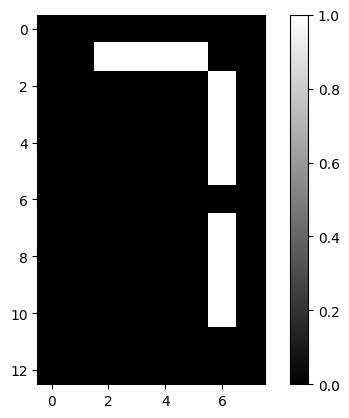

In [48]:
# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

### NMF learns the parts of images

Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array `samples`. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array.

After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

In [49]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

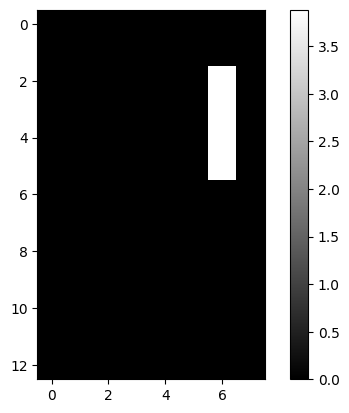

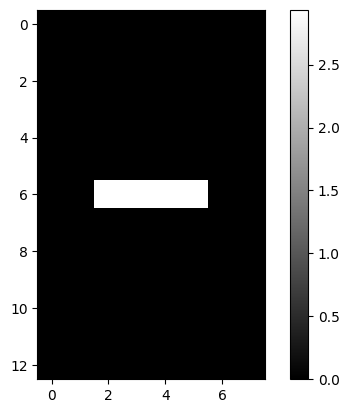

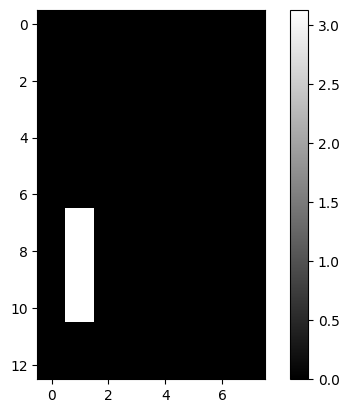

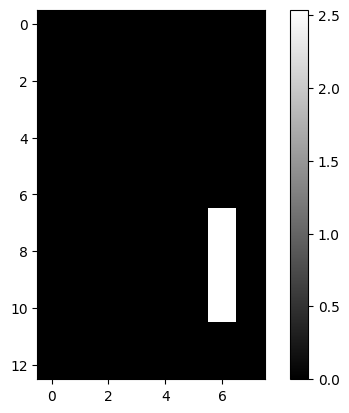

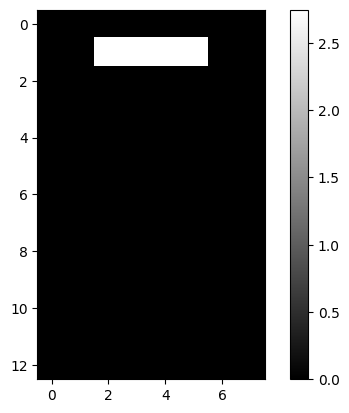

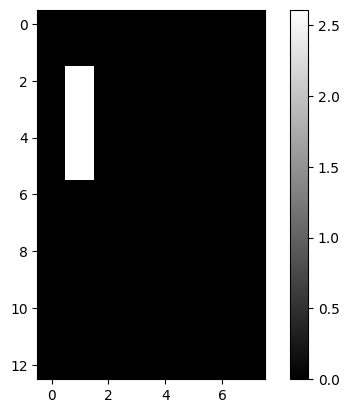

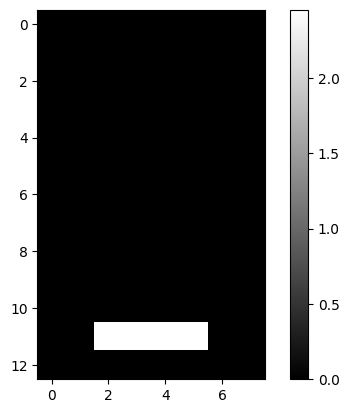

[2.57347960e-01 0.00000000e+00 0.00000000e+00 3.94333376e-01
 3.64045642e-01 0.00000000e+00 3.51281663e-14]


In [50]:
# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

### PCA doesn't learn parts

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array `samples`. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!

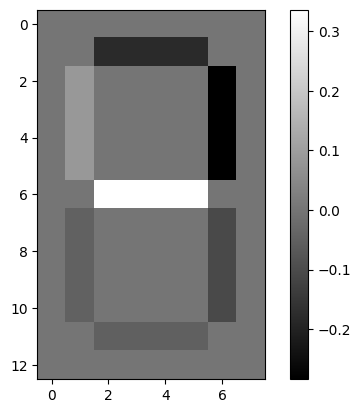

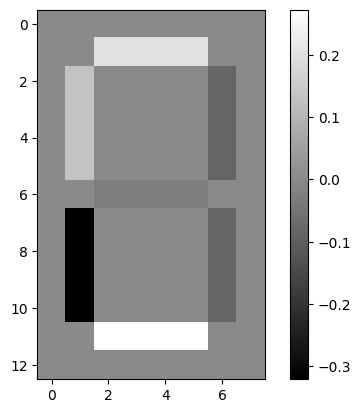

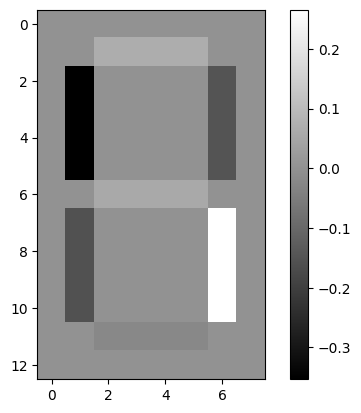

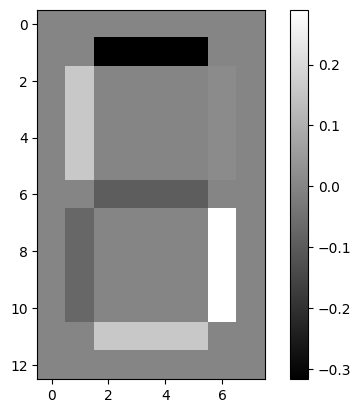

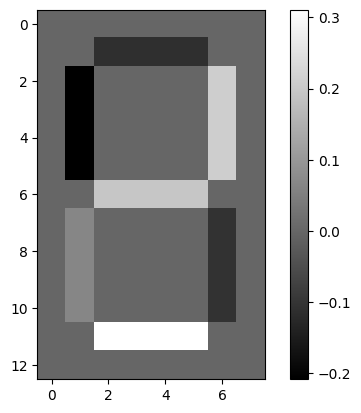

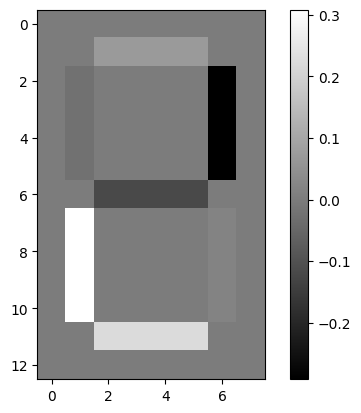

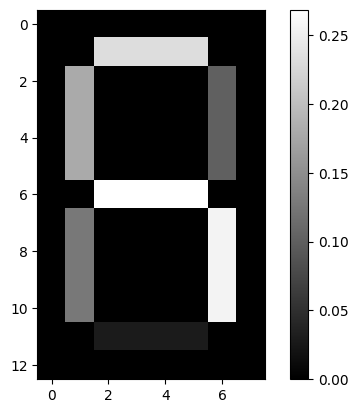

In [51]:
# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

### Which articles are similar to 'Cristiano Ronaldo'?

In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as `nmf_features`, while `titles` is a list of the article titles.

In [52]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### Recommend musical artists part I

In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array `artists` whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

In [53]:
artists = csr_matrix(np.random.rand(111, 500))

In [54]:
# Perform the necessary imports
from sklearn.preprocessing import MaxAbsScaler

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


### Recommend musical artists part II

Suppose you were a big fan of Bruce Springsteen - which other musical artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so `norm_features` is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list `artist_names`.

In [55]:
artist_names = ['Massive Attack', 'Sublime', 'Beastie Boys', 'Neil Young', 'Dead Kennedys', 'Orbital', 'Miles Davis', 'Leonard Cohen', 'Van Morrison', 'NOFX', 'Rancid', 'Lamb', 'Korn', 'Dropkick Murphys', 'Bob Dylan', 'Eminem', 'Nirvana', 'Van Halen', 'Damien Rice', 'Elvis Costello', 'Everclear', 'Jimi Hendrix', 'PJ Harvey', 'Red Hot Chili Peppers', 'Ryan Adams', 'Soundgarden', 'The White Stripes', 'Madonna', 'Eric Clapton', 'Bob Marley', 'Dr. Dre', 'The Flaming Lips', 'Tom Waits', 'Moby', 'Cypress Hill', 'Garbage', 'Fear Factory', '50 Cent', 'Ani DiFranco', 'Matchbox Twenty', 'The Police', 'Eagles', 'Phish', 'Stone Temple Pilots', 'Black Sabbath', 'Britney Spears', 'Fatboy Slim', 'System of a Down', 'Simon & Garfunkel', 'Snoop Dogg', 'Aimee Mann', 'Less Than Jake', 'Rammstein', 'Reel Big Fish', 'The Prodigy', 'Pantera', 'Foo Fighters', 'The Beatles', 'Incubus', 'Audioslave', 'Bright Eyes', 'Machine Head', 'AC/DC', 'Dire Straits', 'MotÃ¶rhead', 'Ramones', 'Slipknot', 'Me First and the Gimme Gimmes', 'Bruce Springsteen', 'Queens of the Stone Age', 'The Chemical Brothers', 'Bon Jovi', 'Goo Goo Dolls', 'Alice in Chains', 'Howard Shore', 'Barenaked Ladies', 'Anti-Flag', 'Nick Cave and the Bad Seeds', 'Static-X', 'Misfits', '2Pac', 'Sparta', 'Interpol', 'The Crystal Method', 'The Beach Boys', 'Goldfrapp', 'Bob Marley & the Wailers', 'Kylie Minogue', 'The Blood Brothers', 'Mirah', 'Ludacris', 'Snow Patrol', 'The Mars Volta', 'Yeah Yeah Yeahs', 'Iced Earth', 'Fiona Apple', 'Rilo Kiley', 'Rufus Wainwright', 'Flogging Molly', 'Hot Hot Heat', 'Dredg', 'Switchfoot', 'Tegan and Sara', 'Rage Against the Machine', 'Keane', 'Jet', 'Franz Ferdinand', 'The Postal Service', 'The Dresden Dolls', 'The Killers', 'Death From Above 1979']

In [56]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen           1.000000
Rage Against the Machine    0.857045
Tom Waits                   0.836843
Foo Fighters                0.810324
Switchfoot                  0.806797
dtype: float64
